In [4]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('B://workspace/tensorflow')

import numpy as np

from src.config.params import BASE_BOA_ARGO_DATA_PATH
from src.models.model import train_parameter_model_for_random_forest
from src.utils.log import Log
from src.utils.util import import_argo_ocean_variables, construct_argo_training_set, resource_argo_monthly_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
year = 2023
month = 11

# --------------------------- 读取单月数据 ------------------------
month_file = BASE_BOA_ARGO_DATA_PATH + "/BOA_Argo_{year}_{month}.nc".format(year=year, month=month)
Log.i("开始读取Argo数据 ...")
temperature, lon, lat, ild, mld, cmld = import_argo_ocean_variables(month_file)
# N月海表温度
march_sst = temperature[160:180, 60:80, 0]
# N月剖面温度
march_profile = temperature[160:180, 60:80, :]

In [6]:
# --------------------------- 读取所有数据，生成训练集 ------------------------
datas = resource_argo_monthly_data(BASE_BOA_ARGO_DATA_PATH)
Log.d("数据读取完成: ")

# 生成训练集
input_data, output_data = construct_argo_training_set(datas)
Log.w("训练集生成完成: ", len(input_data), output_data.shape)

# 训练模型
model, x_test, y_test = train_parameter_model_for_random_forest(input_data, output_data)
# model_lstm, x_test_lstm, y_test_lstm = train_parameter_model_for_lstm(input_data, output_data)

训练集生成完成:  2 (96800, 58)
input_set shape: (96800, 3)
X_train shape: (77440, 3)
y_train shape: (77440, 58)
X_test shape: (19360, 3)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   51.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  3.5min


In [5]:
# ------------------------------------ 预测海温数据 ------------------------
Log.i("开始读取预测Argo 海表数据 ...")

pre_stations = np.array([tuple([i, j]) for i in np.arange(160, 180) for j in np.arange(-19, 1)])
pre_years = np.array([year] * len(pre_stations))
pre_months = np.array([month] * len(pre_stations))
pres_input = np.column_stack((march_sst.reshape(400, -1).reshape(-1), pre_stations ))
Log.w("预测的输入：", pres_input)

预测的输入： [[ 25.02199936 160.         -19.        ]
 [ 25.75819969 160.         -18.        ]
 [ 26.69720078 160.         -17.        ]
 ...
 [ 30.67970085 179.          -2.        ]
 [ 30.56769943 179.          -1.        ]
 [ 30.45059967 179.           0.        ]]


In [6]:
pres_result = np.empty((len(pres_input), 58), dtype=float)

for i in range(len(pres_input)):
    pre_y = model.predict(pres_input[i].reshape(1, -1))
    pres_result[i] = np.array(pre_y[0])

# 去除异常数据
pres_result[pres_result > 50] = np.nan
Log.d("pres result shape: ", pres_result.shape)
pres_sst = pres_result[:, 10].reshape(20, 20)

pres_profile = pres_result[:, :].reshape(20, 20, 58)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

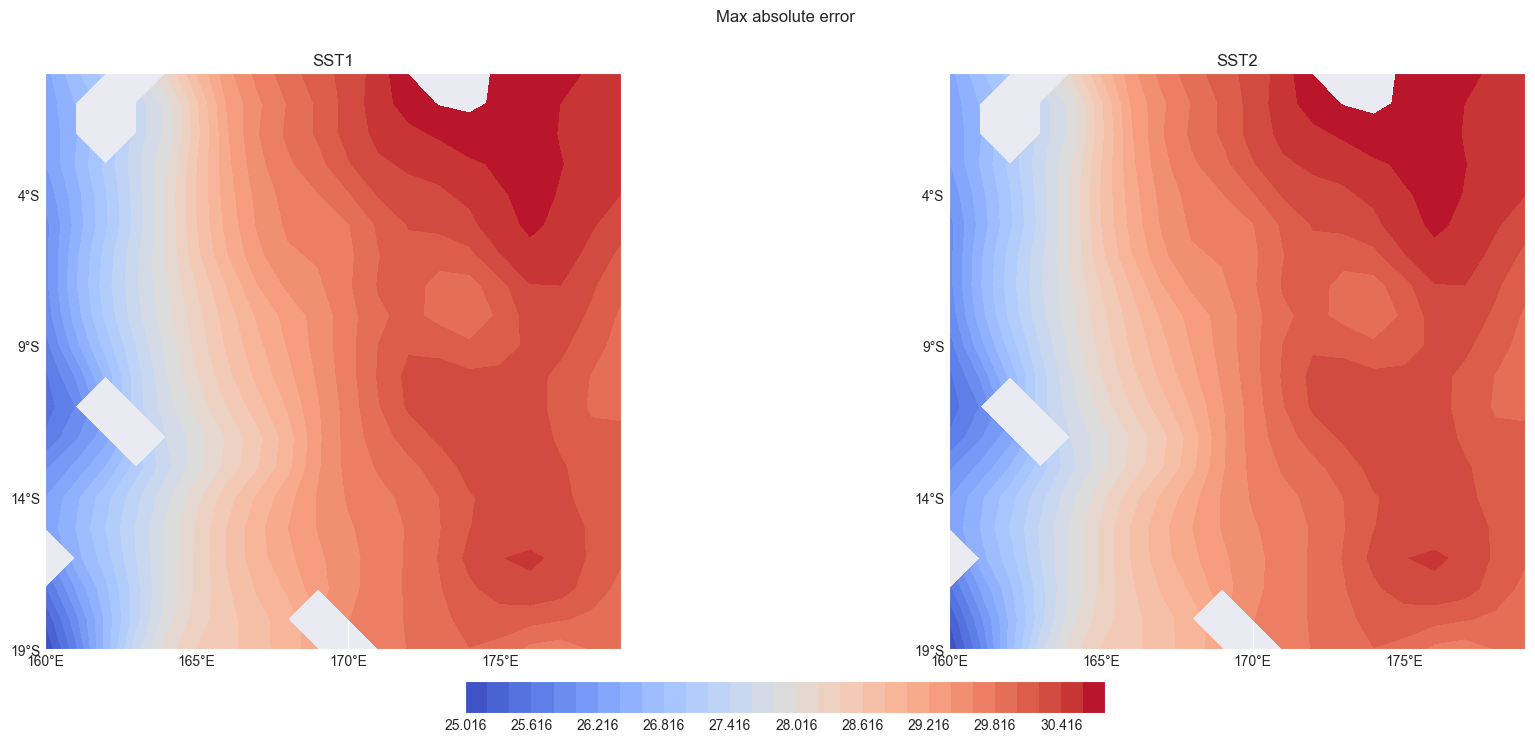

第 0 层的 RMSE:  0.003387651644584521


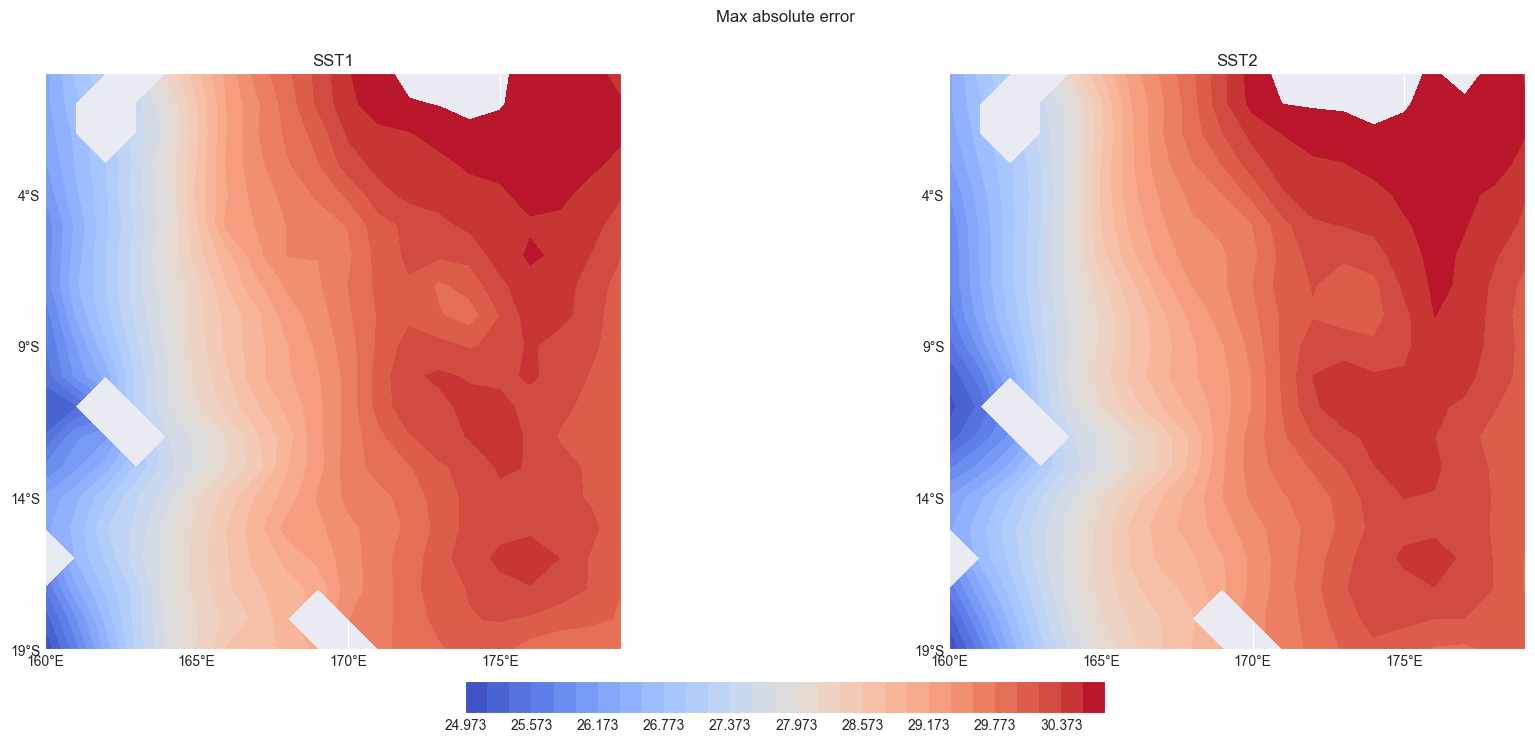

第 1 层的 RMSE:  0.06790024441470649


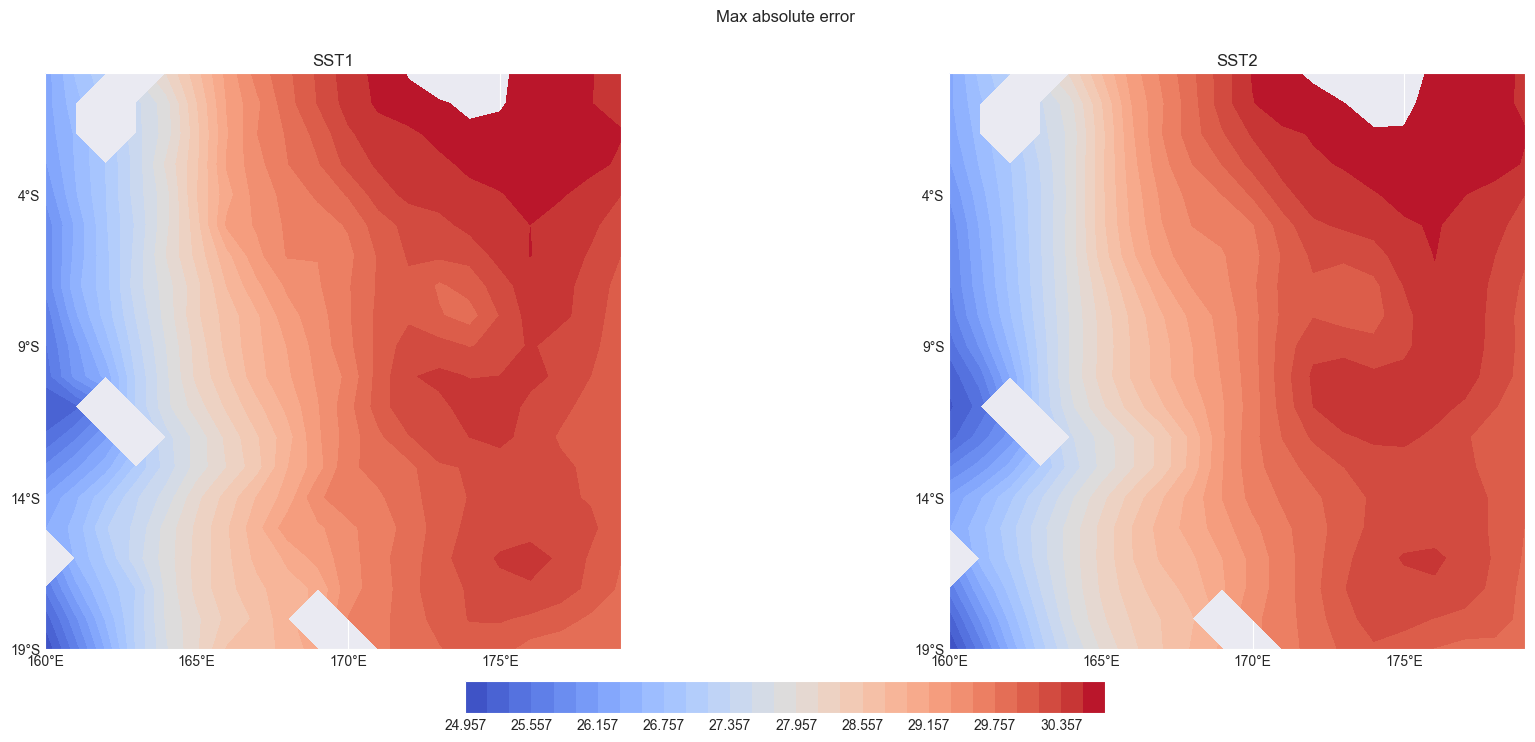

第 2 层的 RMSE:  0.06690254672689272


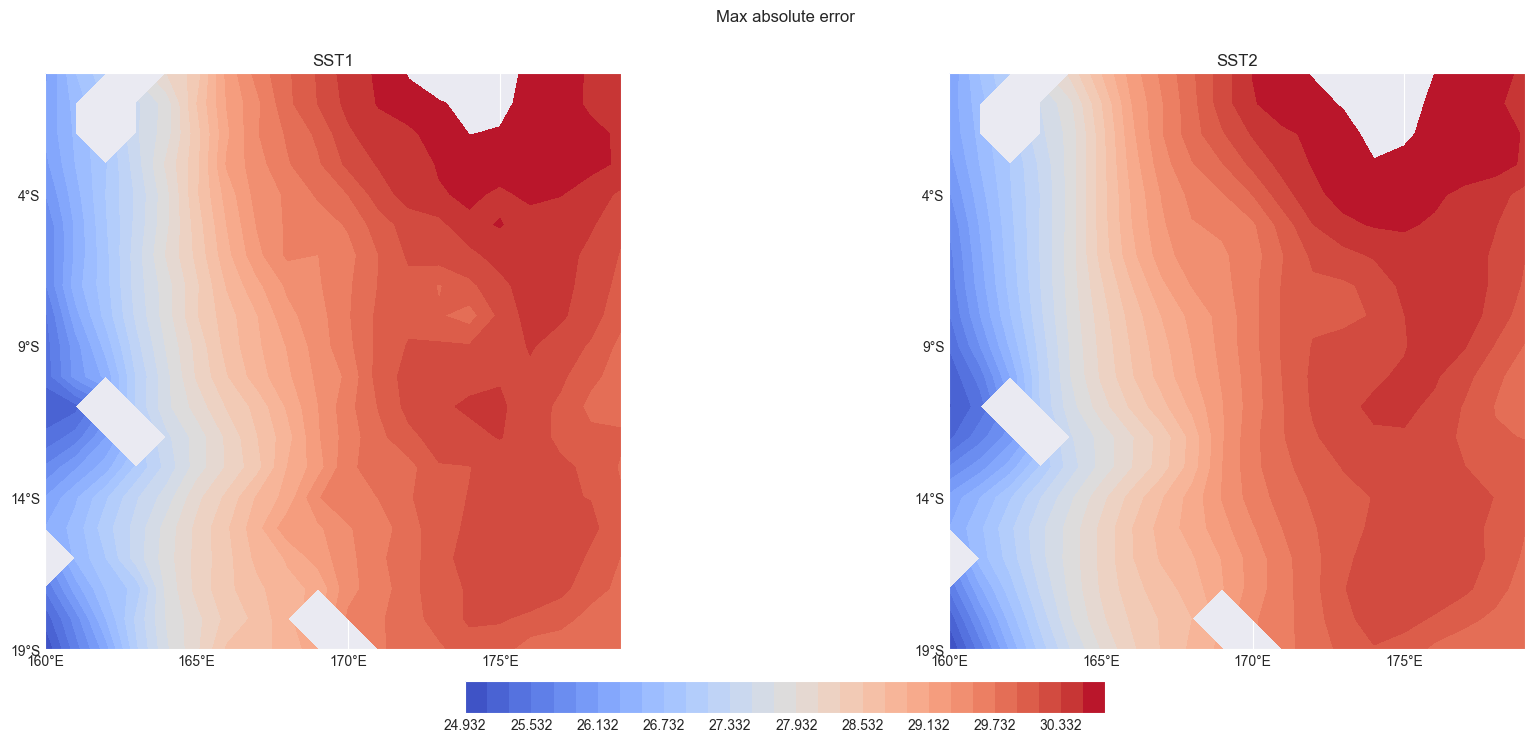

第 3 层的 RMSE:  0.0725665287290529


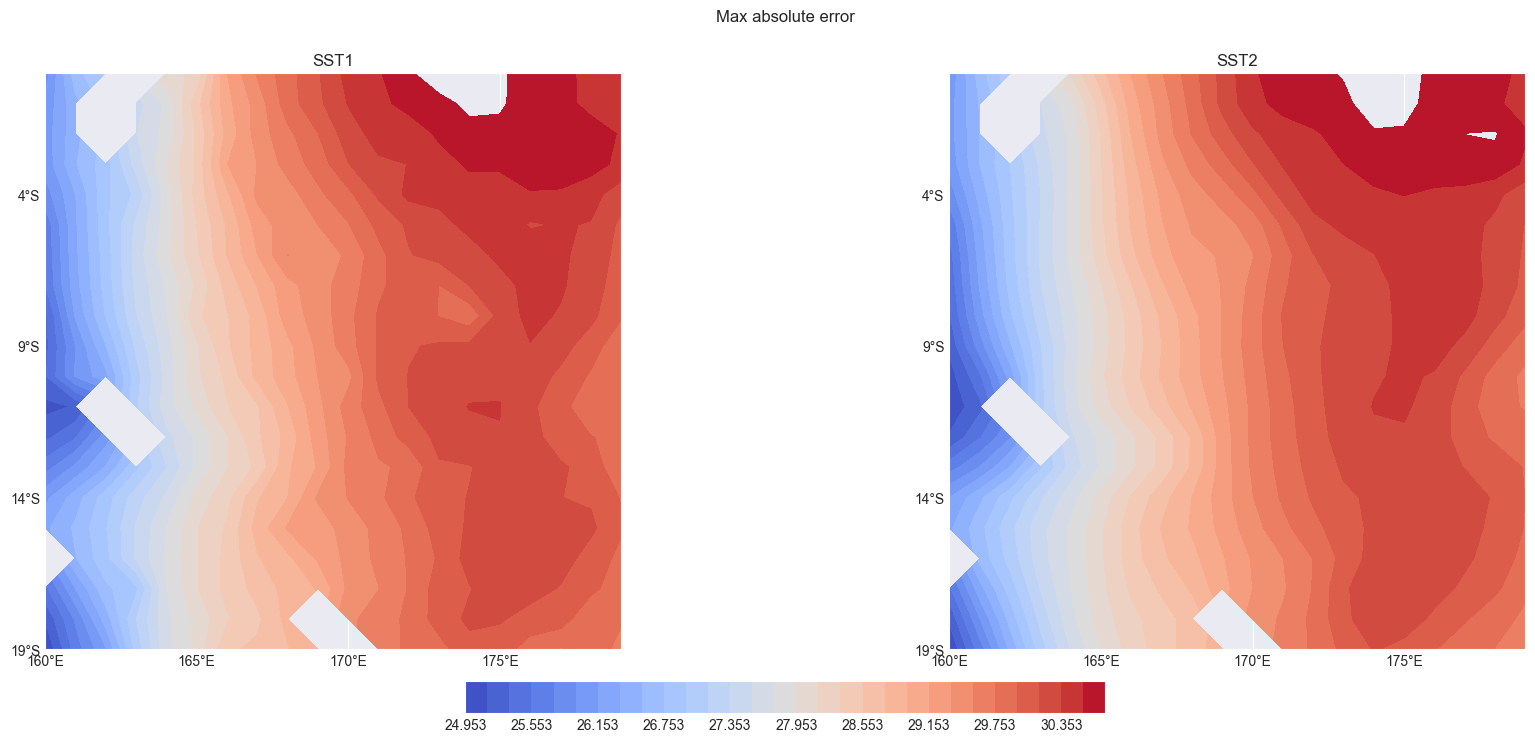

第 4 层的 RMSE:  0.09107257306709447


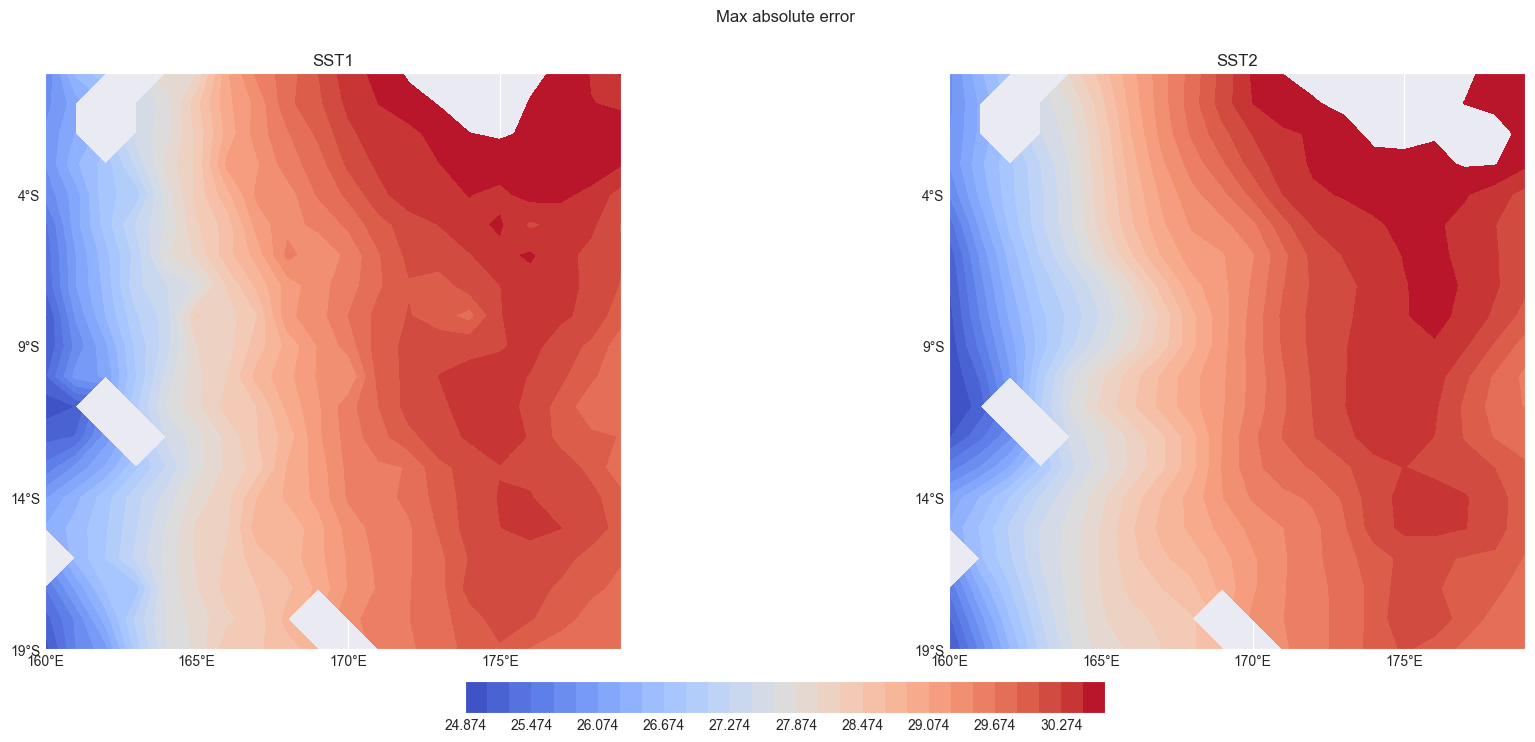

第 5 层的 RMSE:  0.1355815312837606


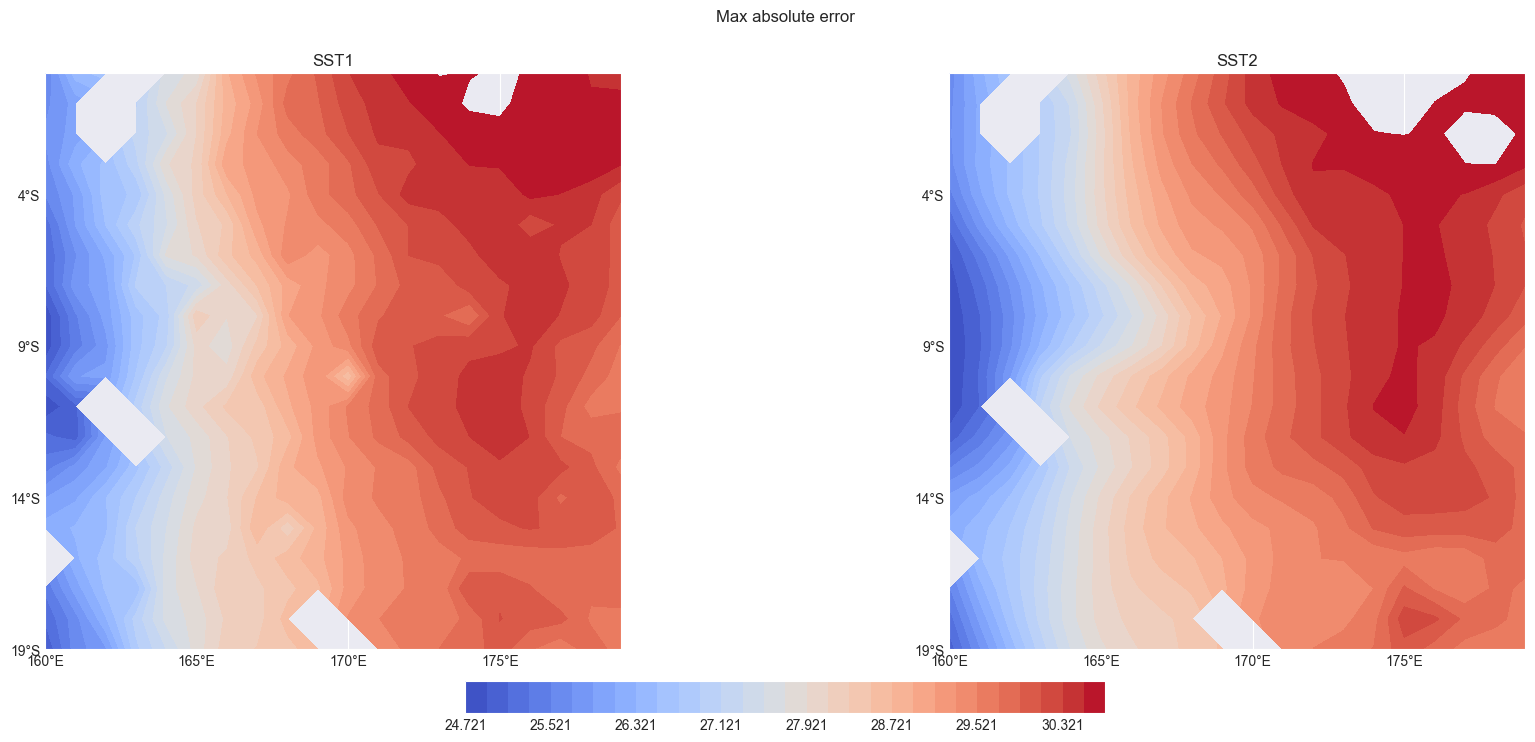

第 6 层的 RMSE:  0.19953120951028405


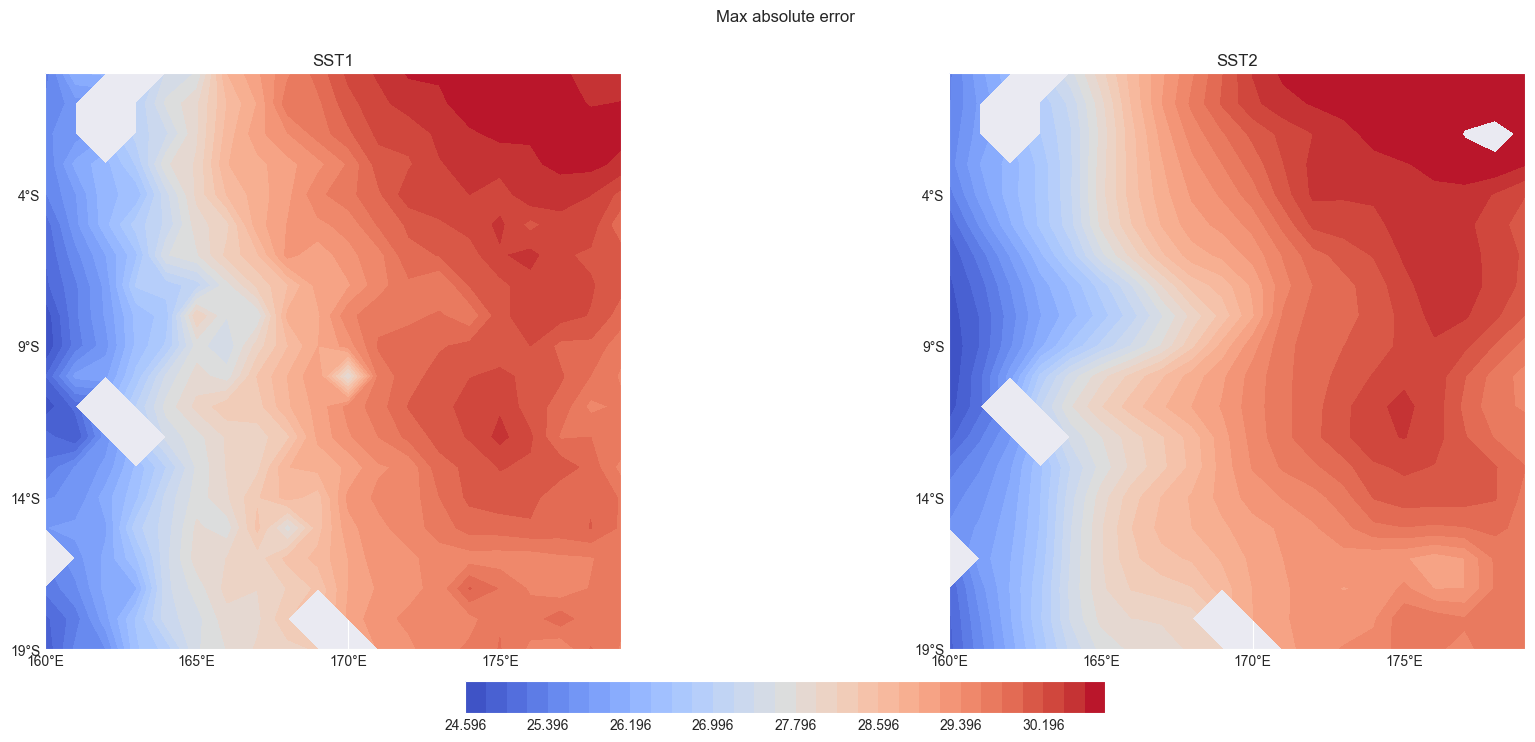

第 7 层的 RMSE:  0.2452740153498088


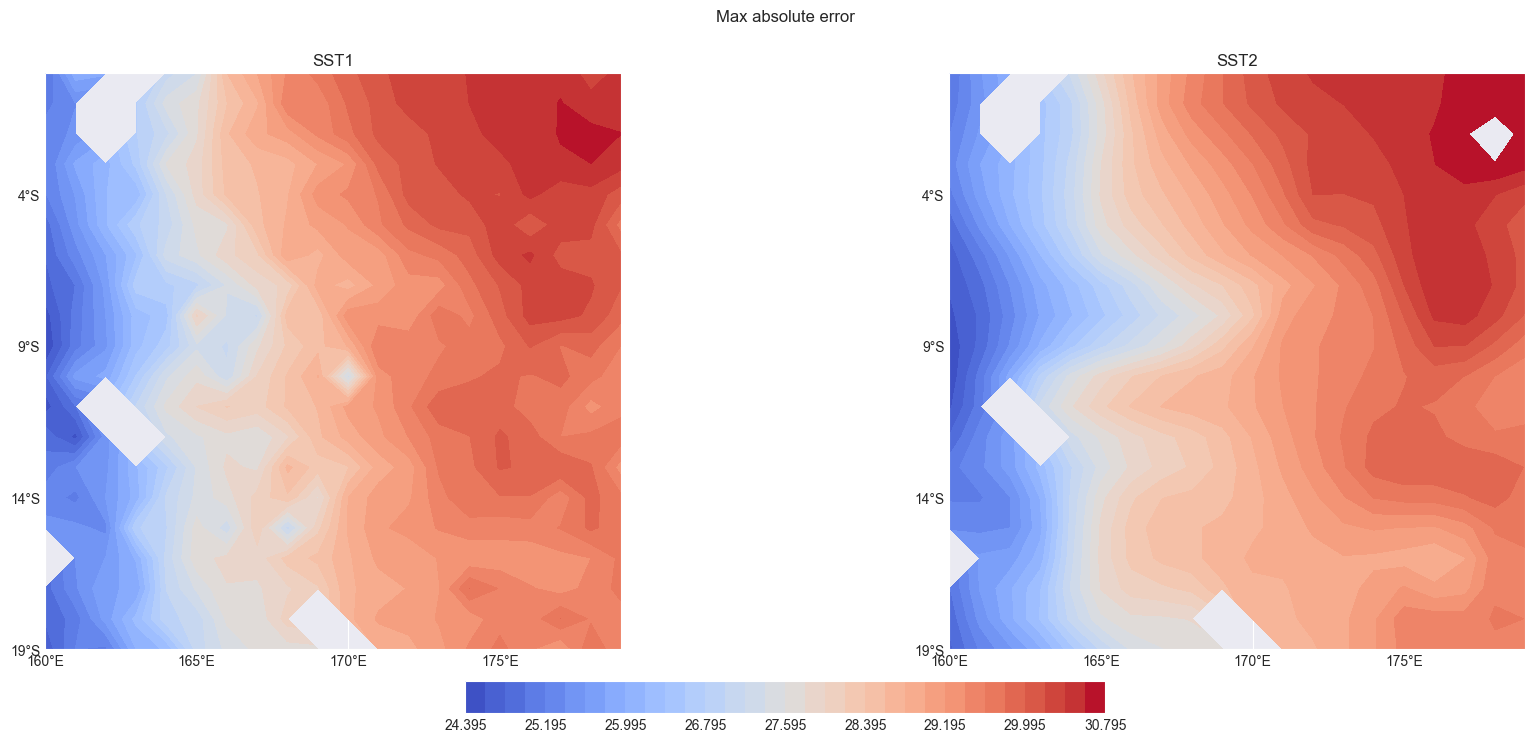

第 8 层的 RMSE:  0.2839485365626492


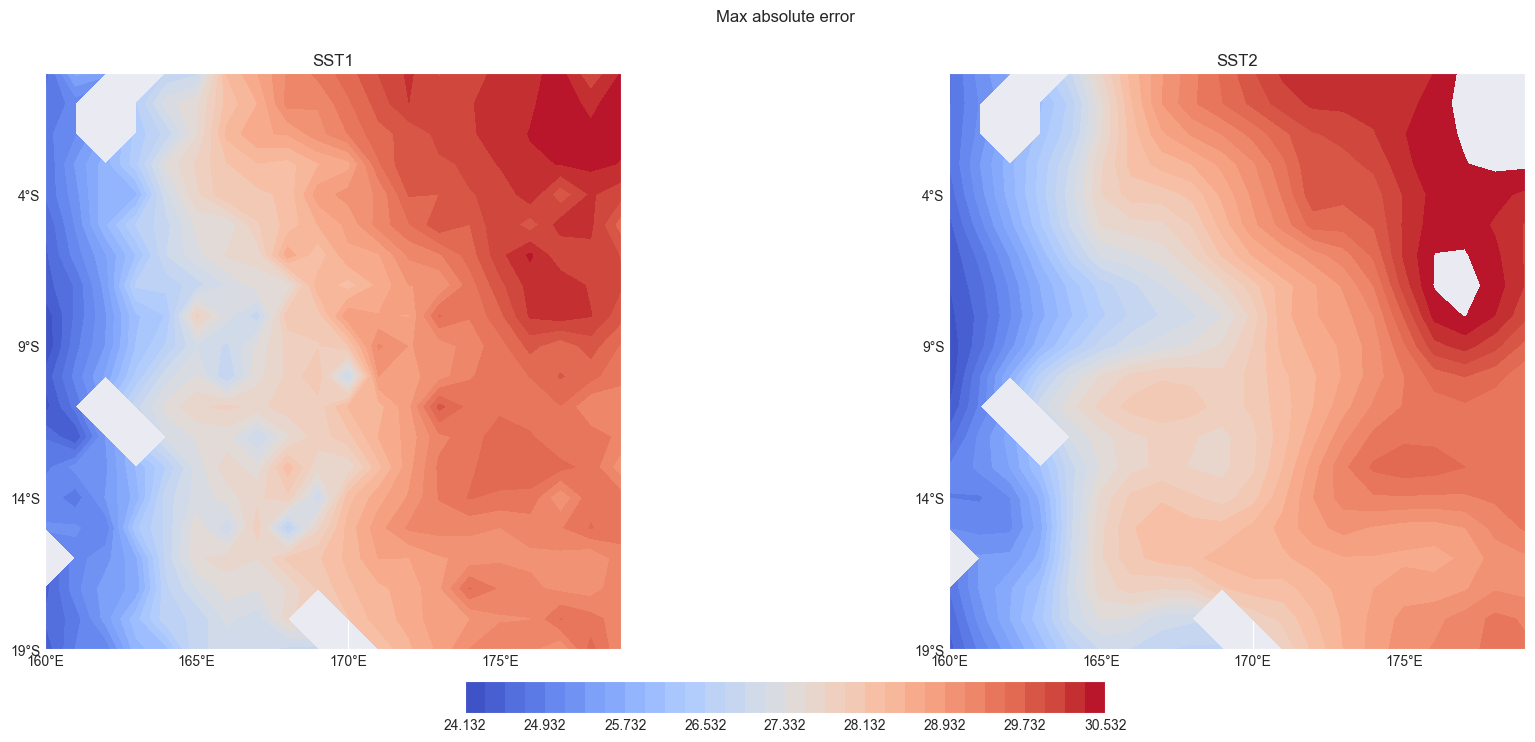

第 9 层的 RMSE:  0.3243048653006296


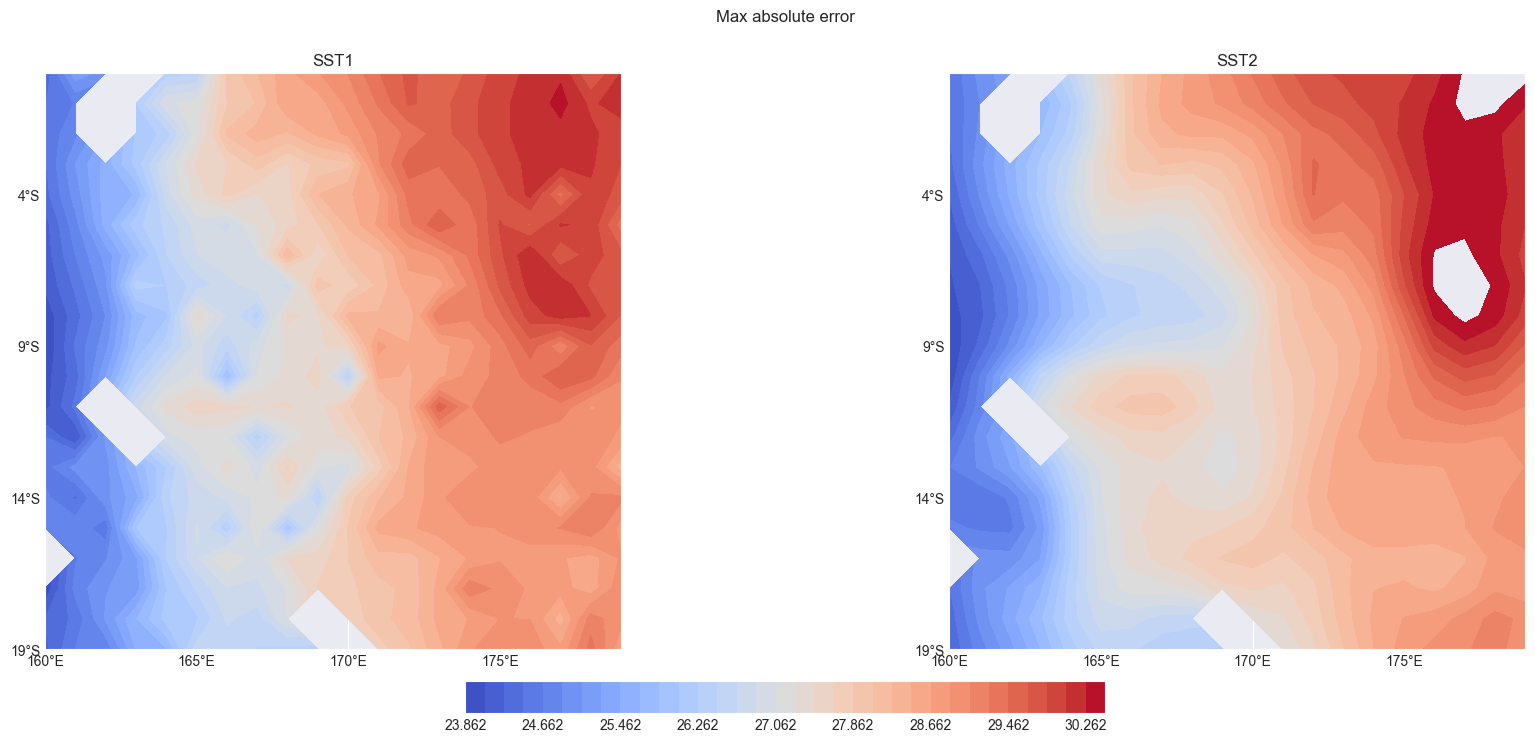

第 10 层的 RMSE:  0.37557676170172966


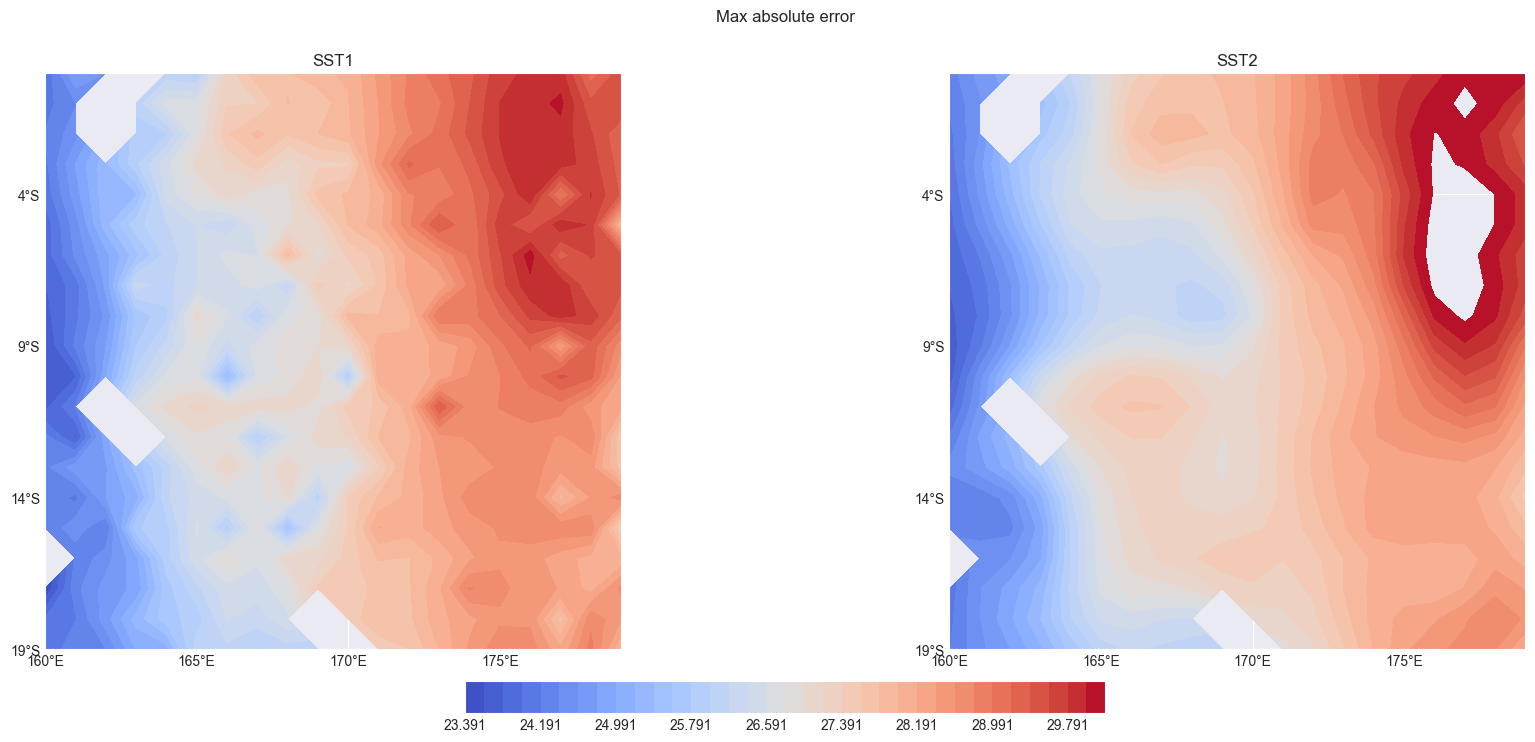

第 11 层的 RMSE:  0.4310671119783329


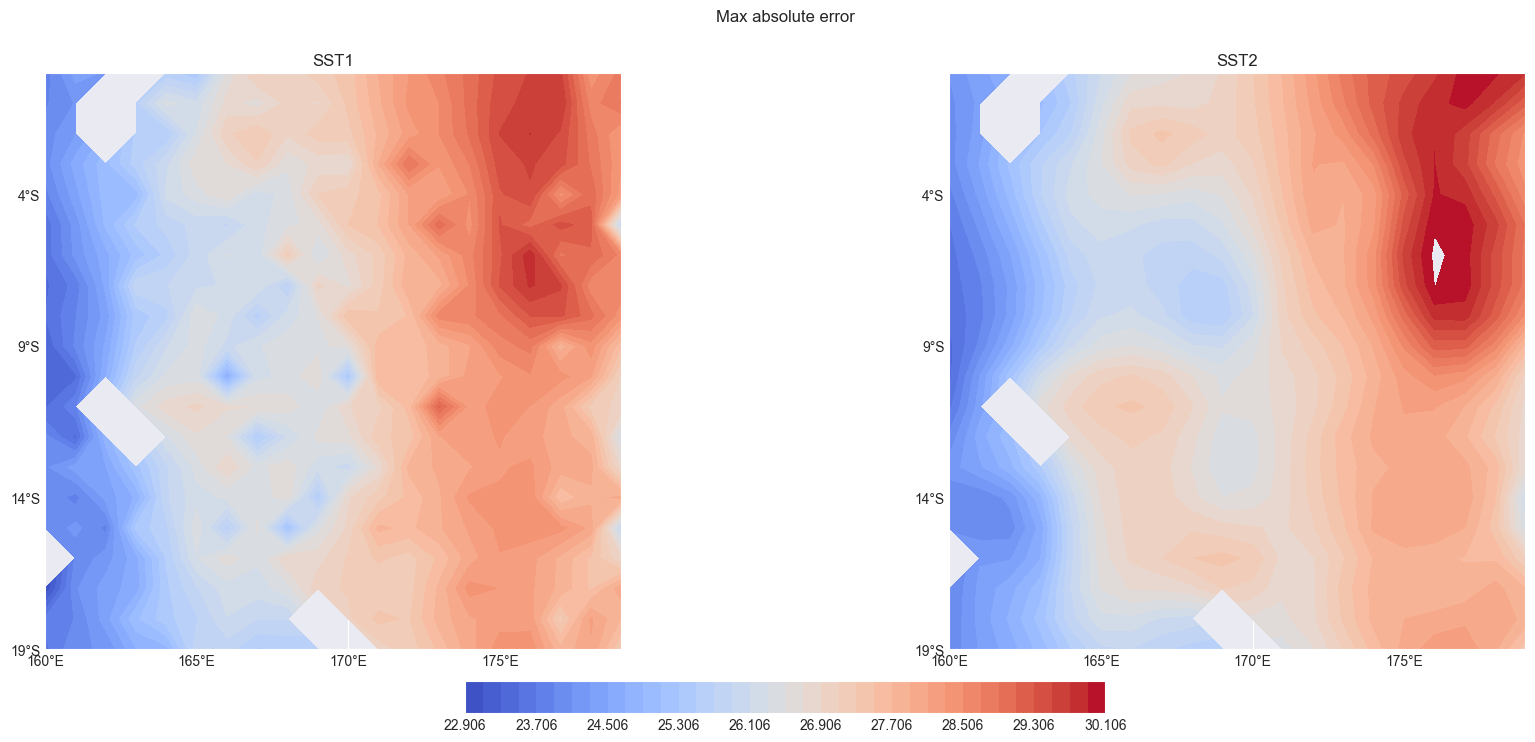

第 12 层的 RMSE:  0.49662829261790026


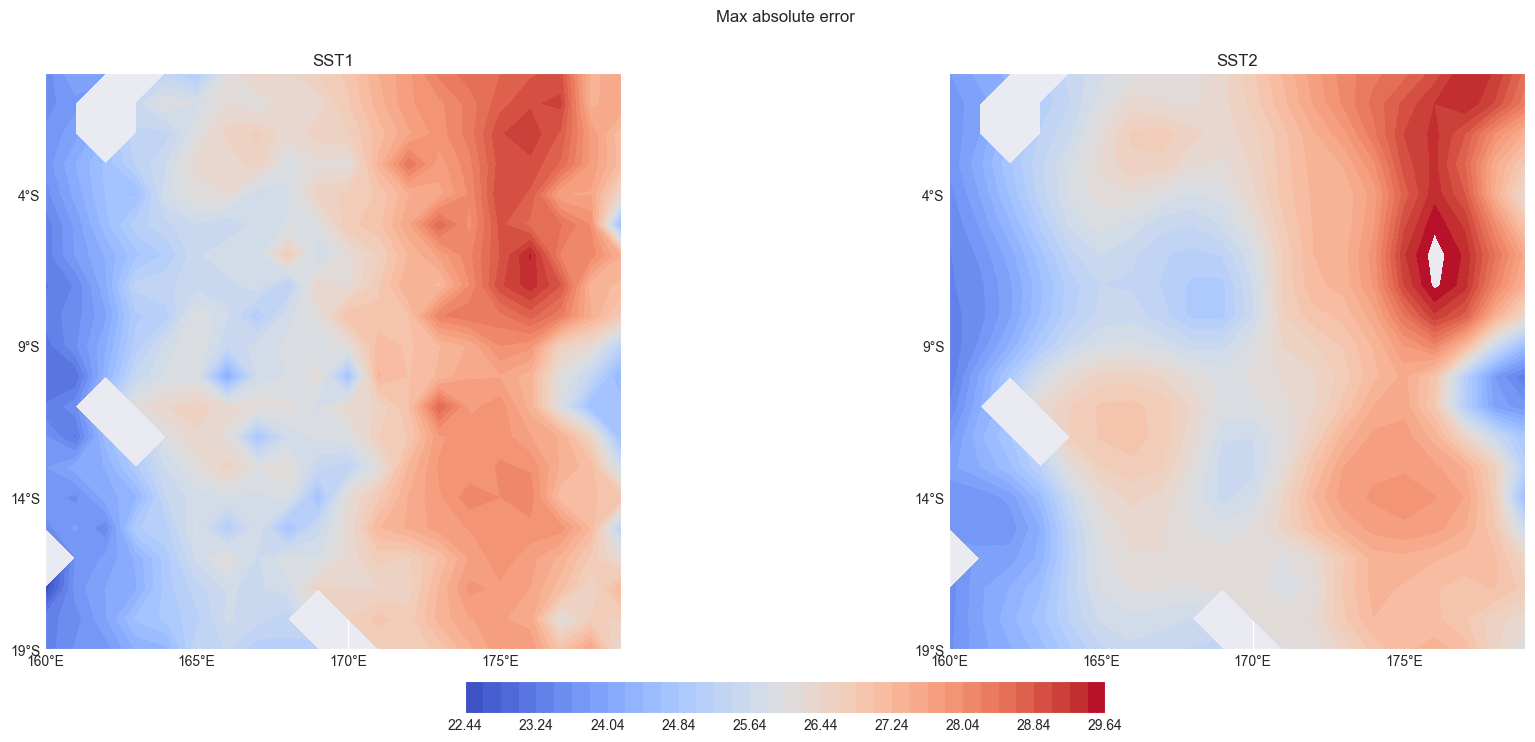

第 13 层的 RMSE:  0.5366031743899188


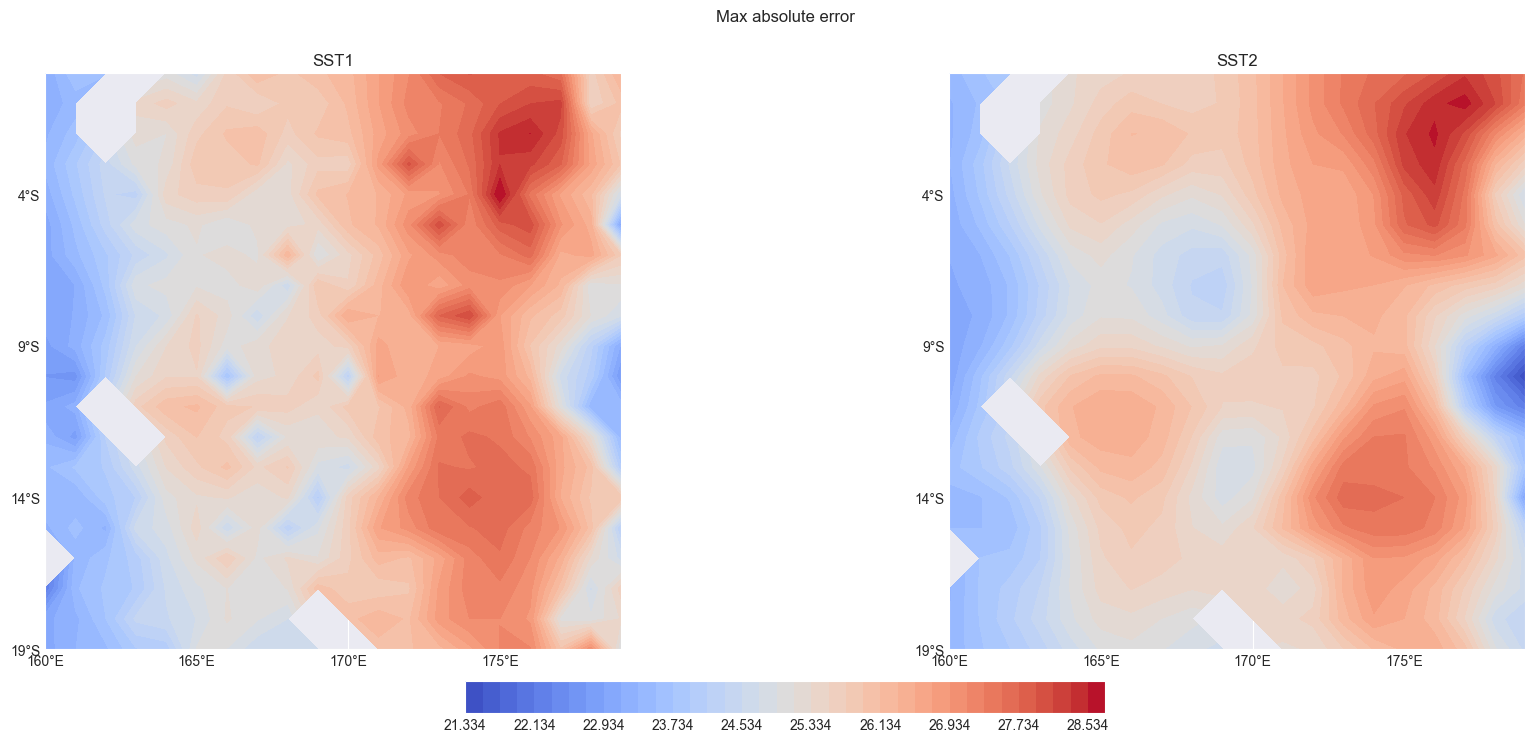

第 14 层的 RMSE:  0.6036502723719332


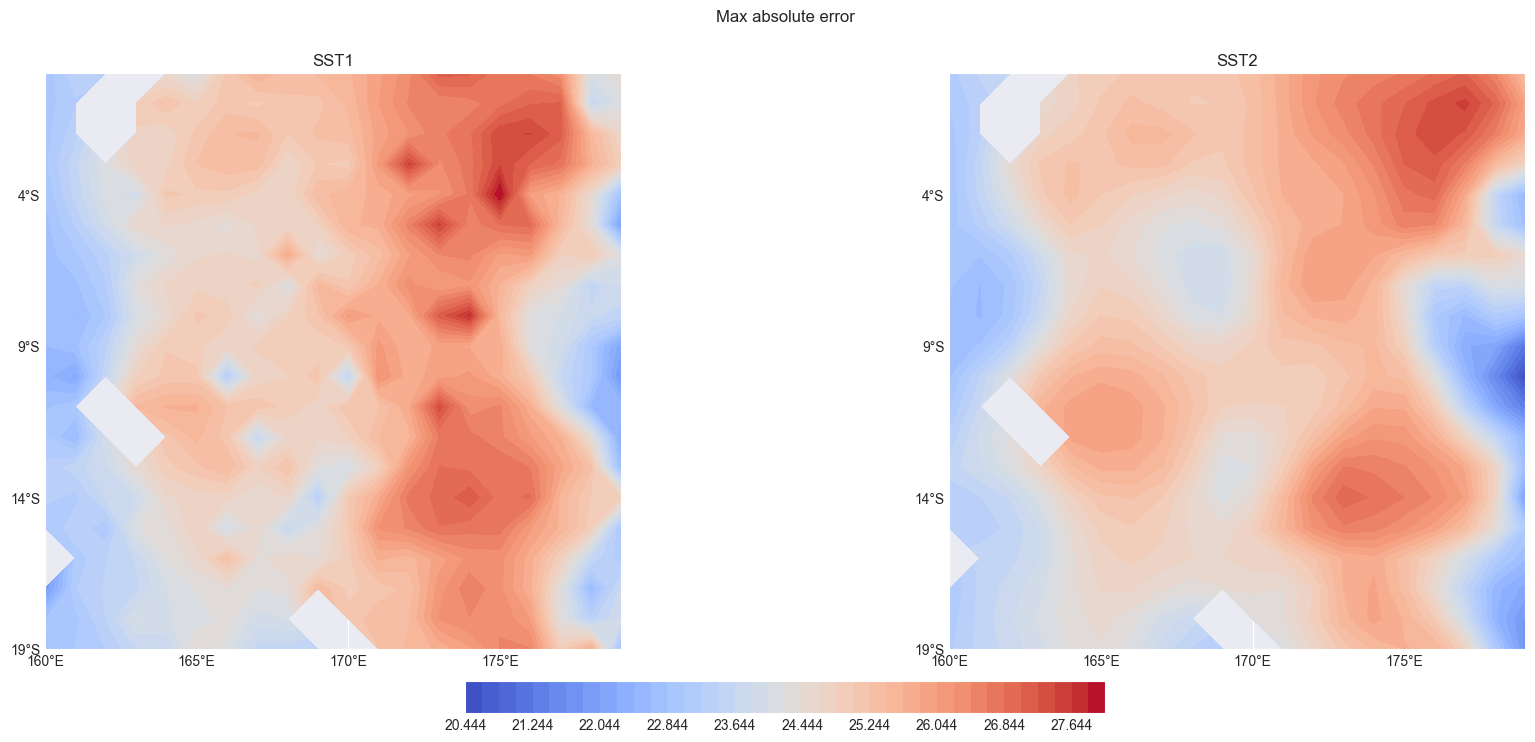

第 15 层的 RMSE:  0.6826071418590582


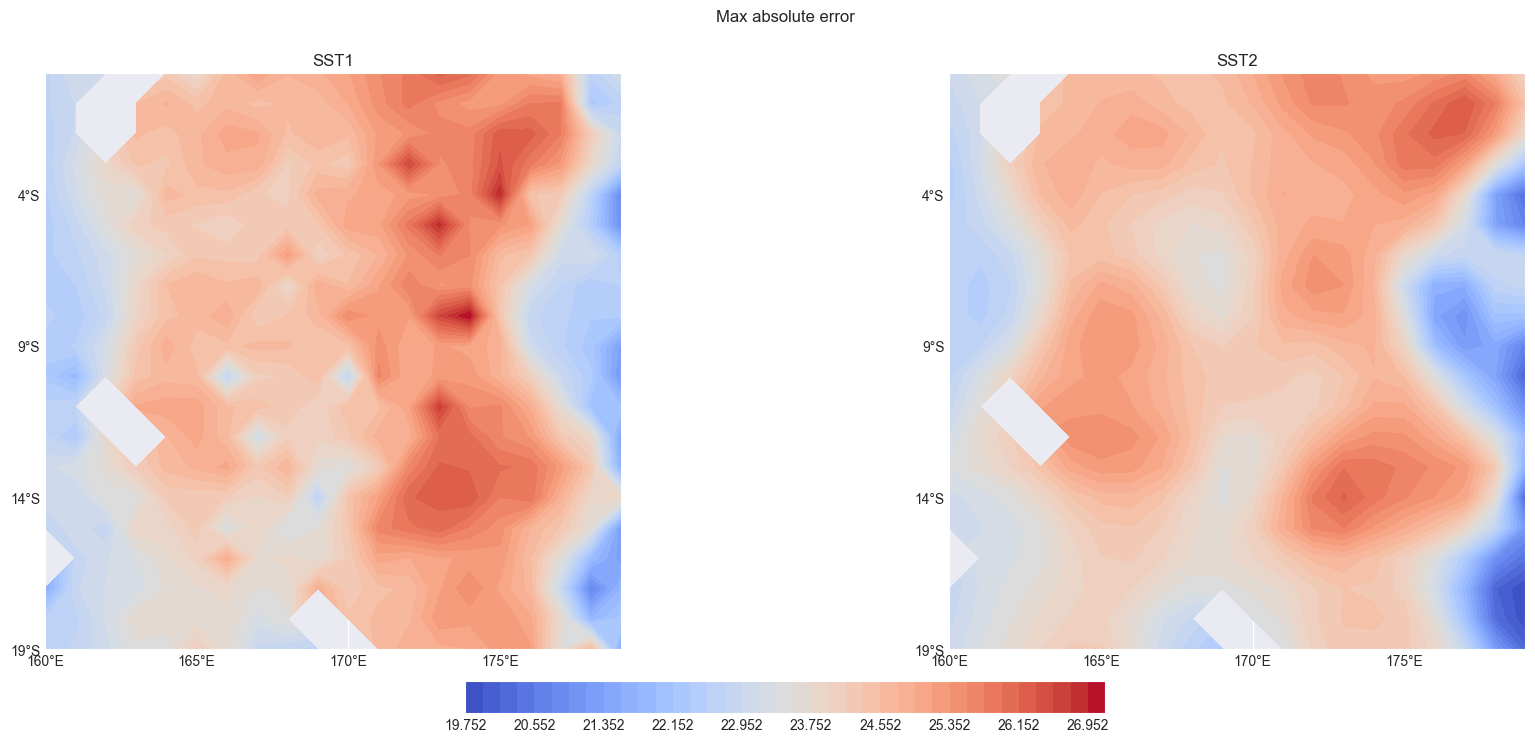

第 16 层的 RMSE:  0.7471528843216897


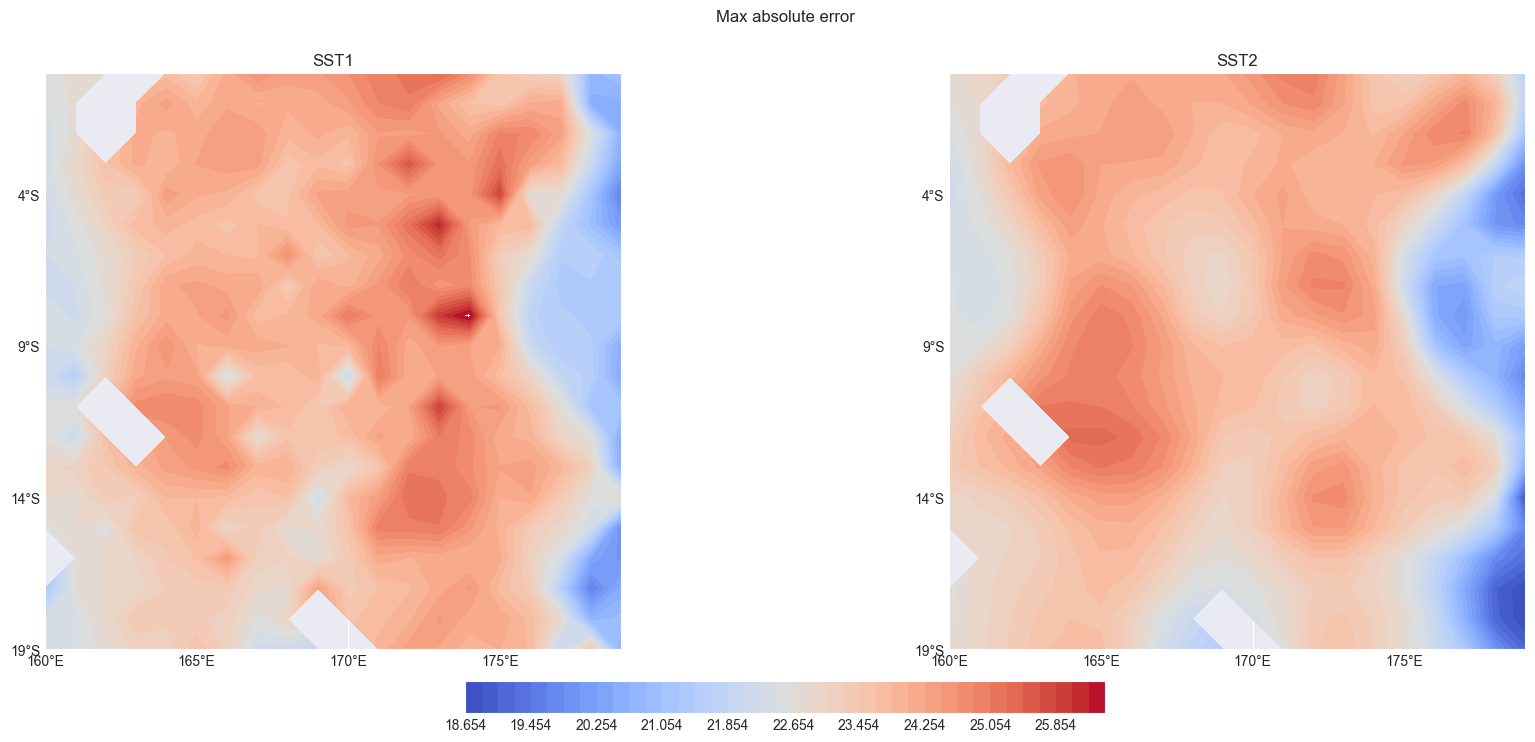

第 17 层的 RMSE:  0.8013648009579251


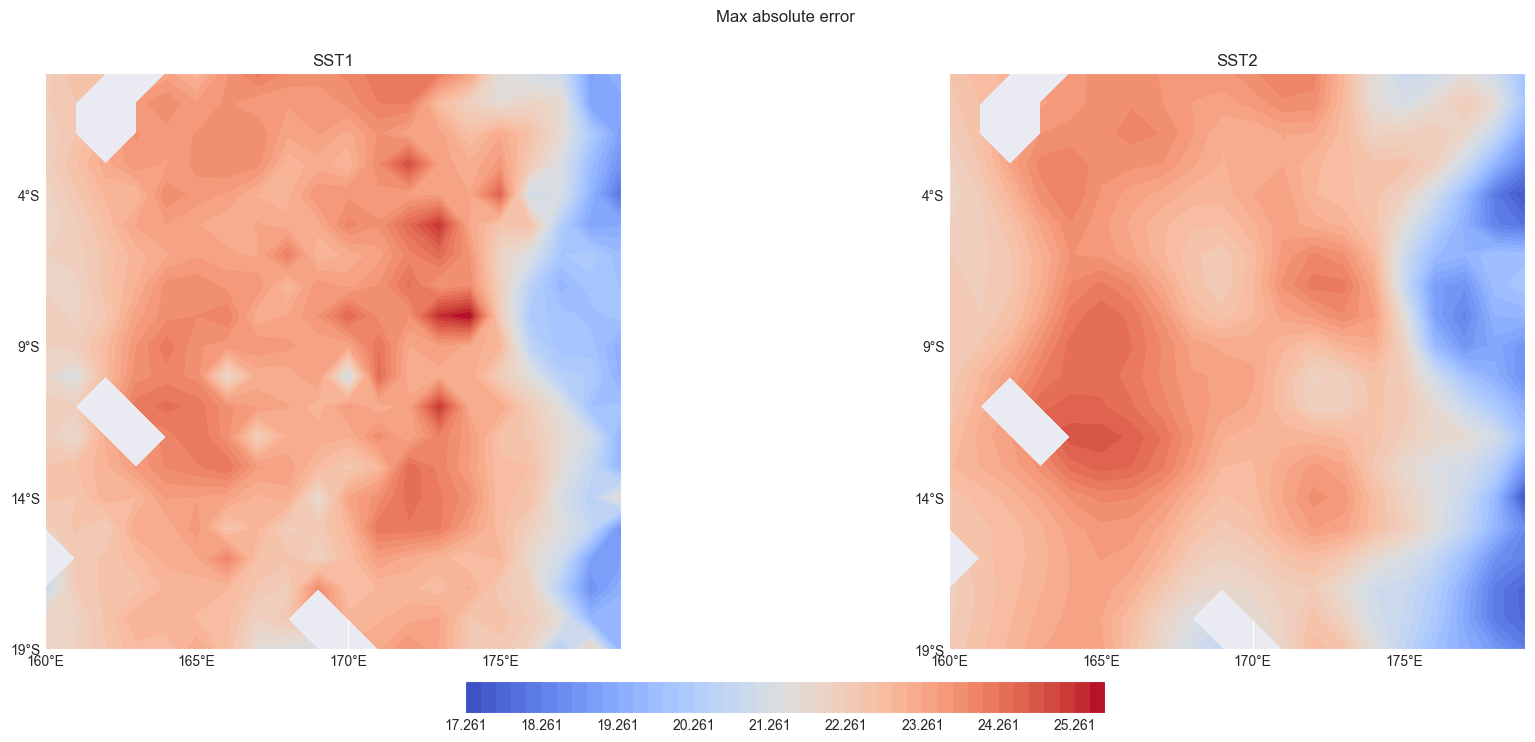

第 18 层的 RMSE:  0.8412454721756434


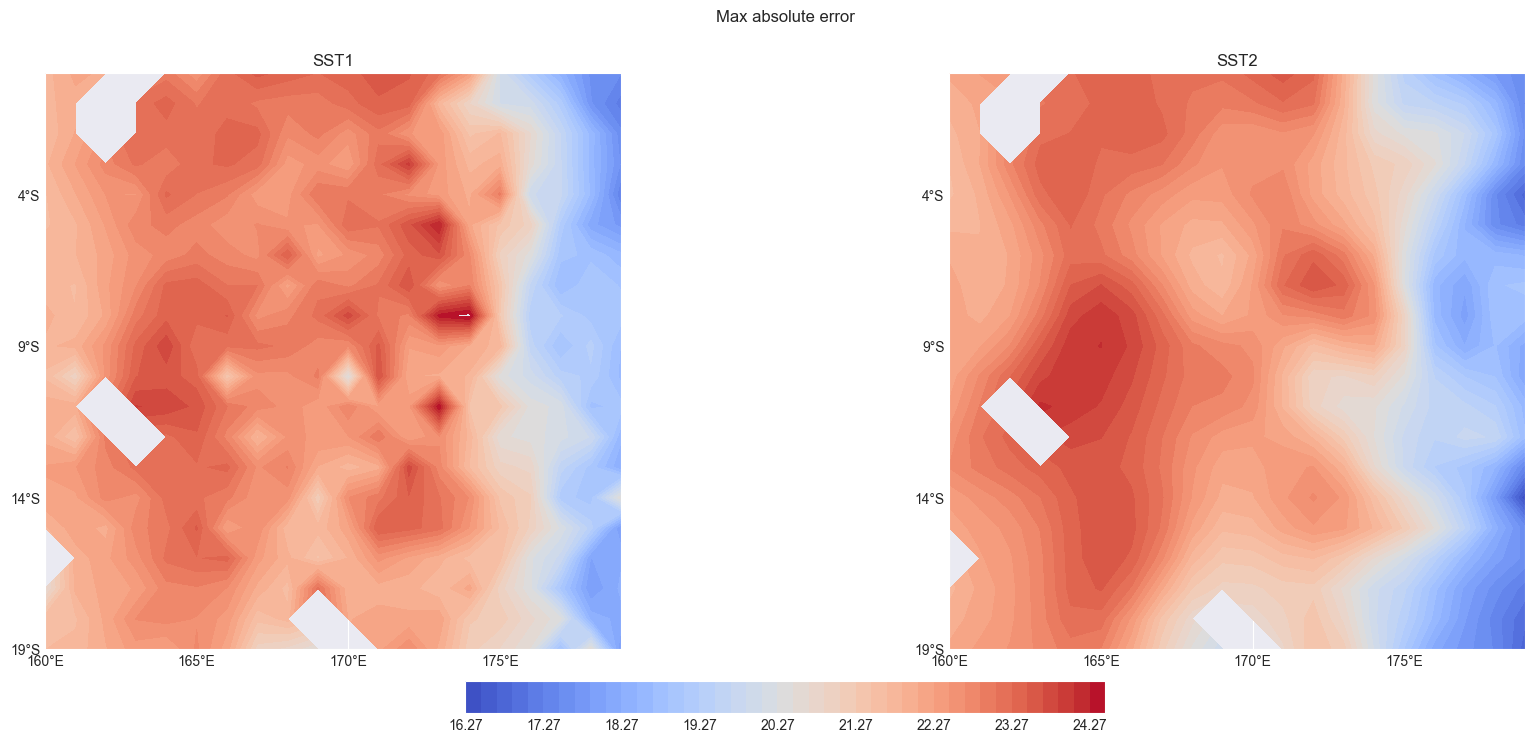

第 19 层的 RMSE:  0.8127118445712207


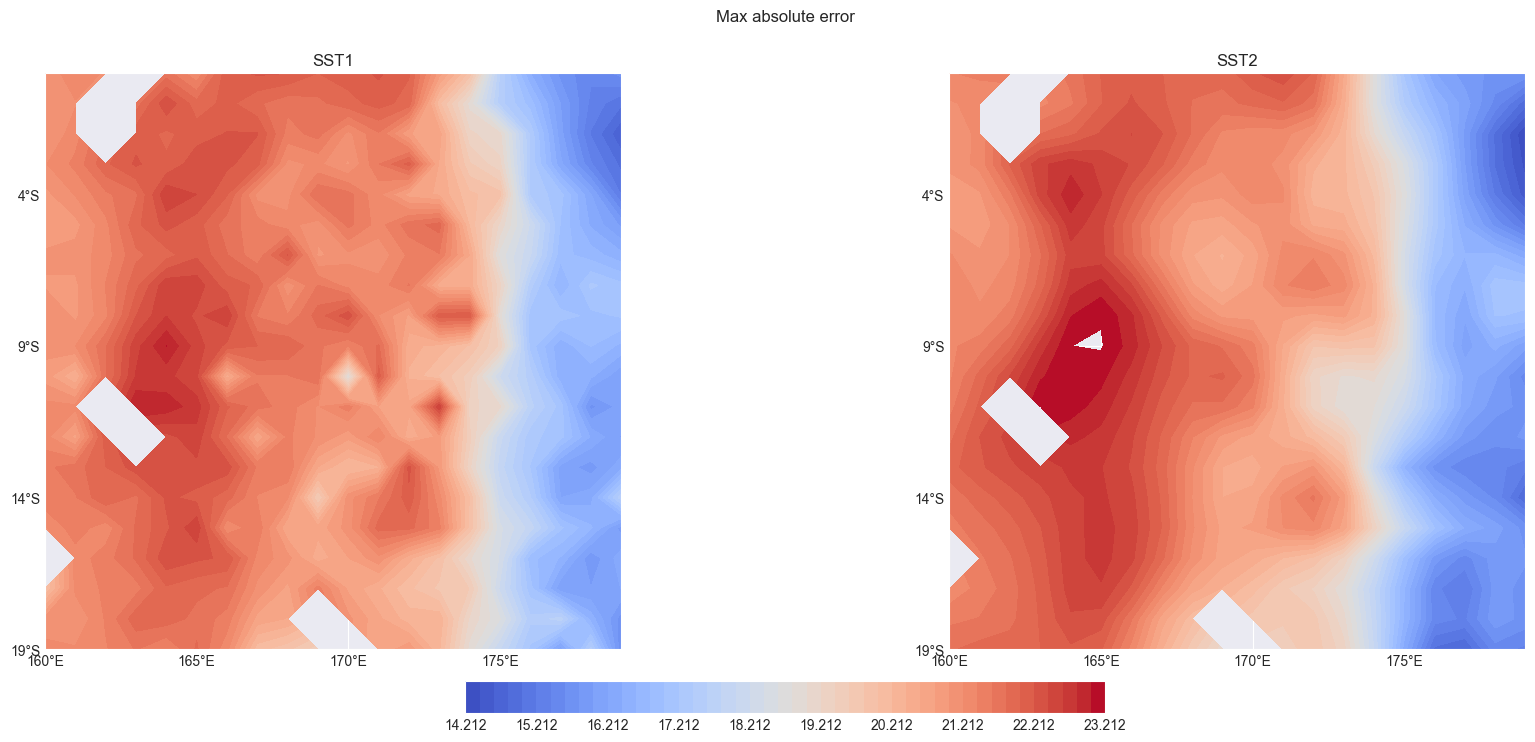

第 20 层的 RMSE:  0.713308874030784


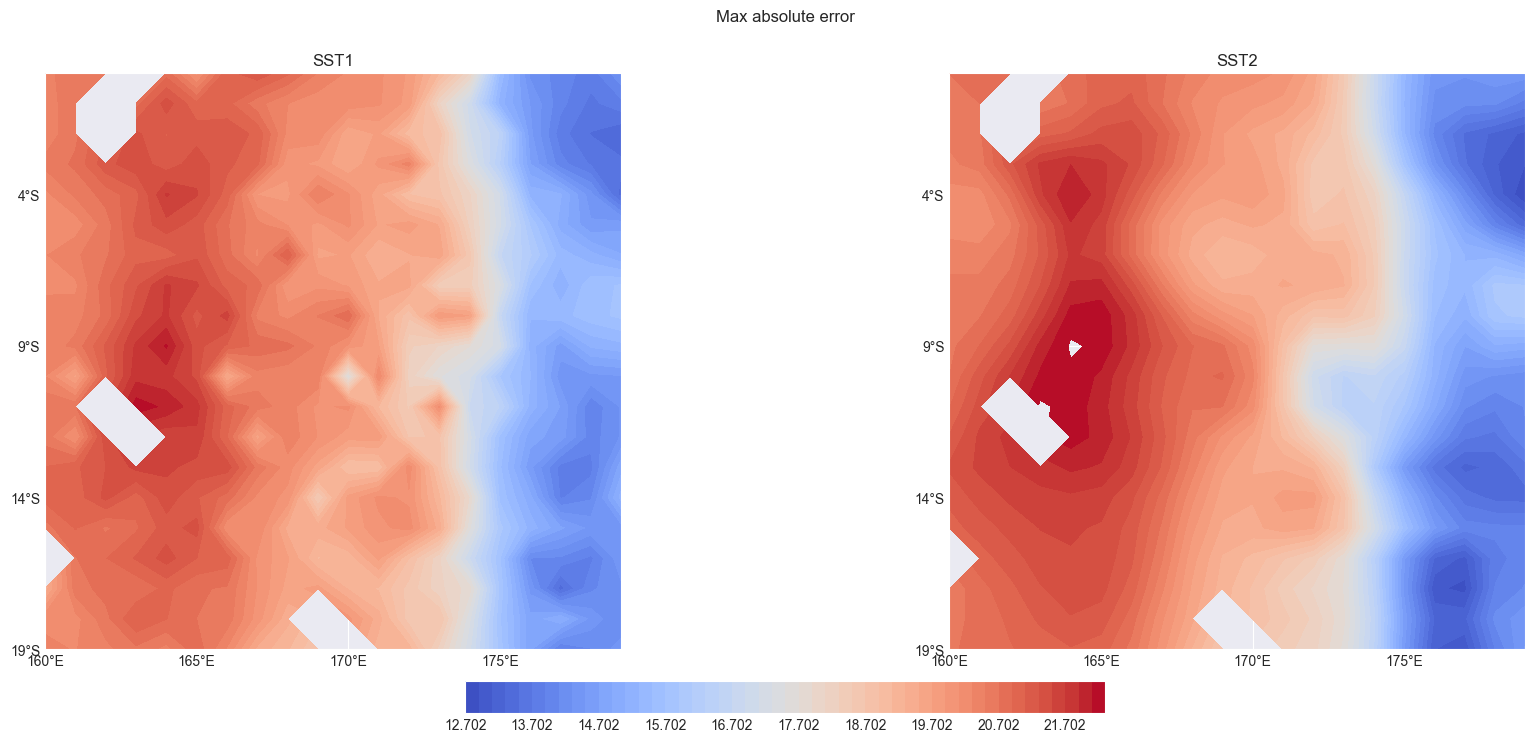

第 21 层的 RMSE:  0.6265642547191631


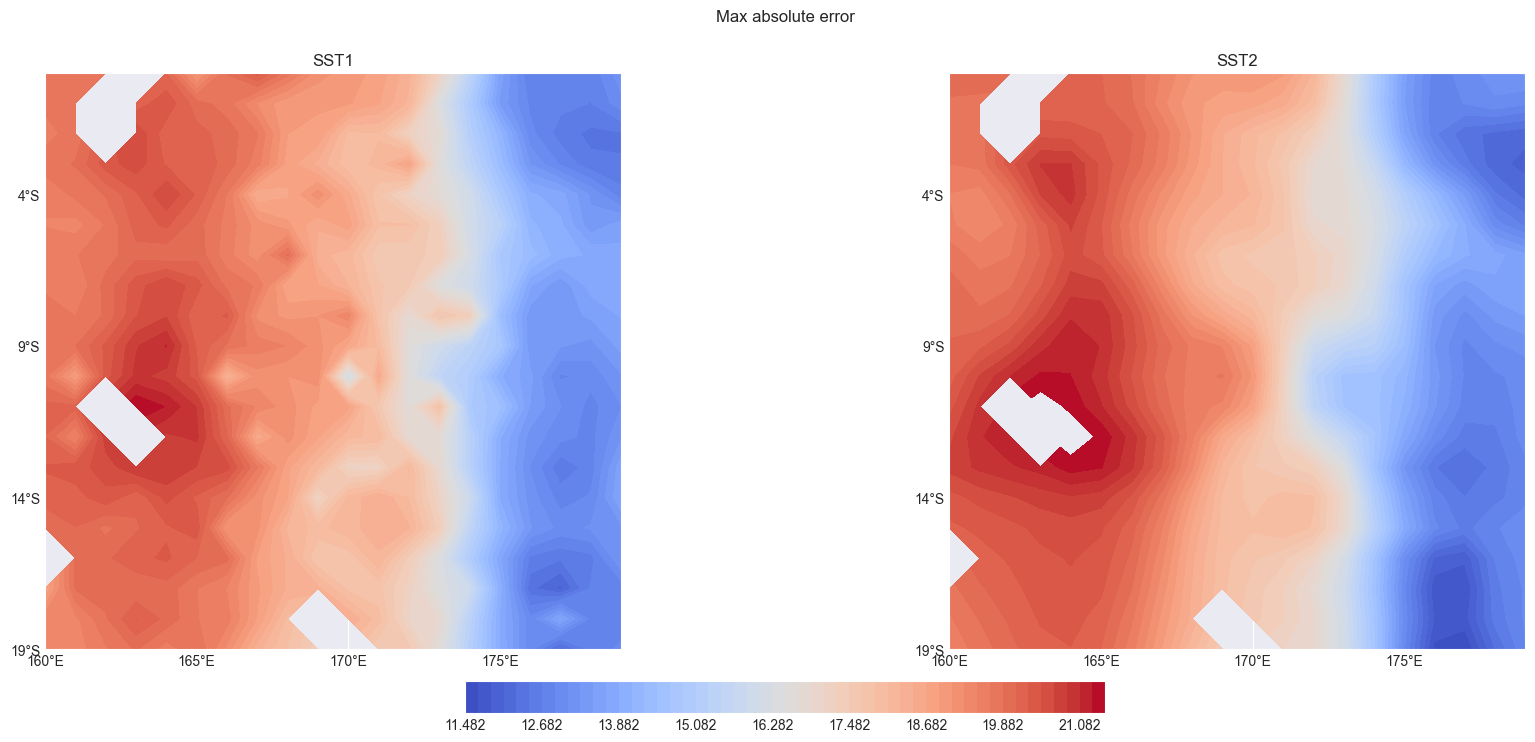

第 22 层的 RMSE:  0.5536542749123291


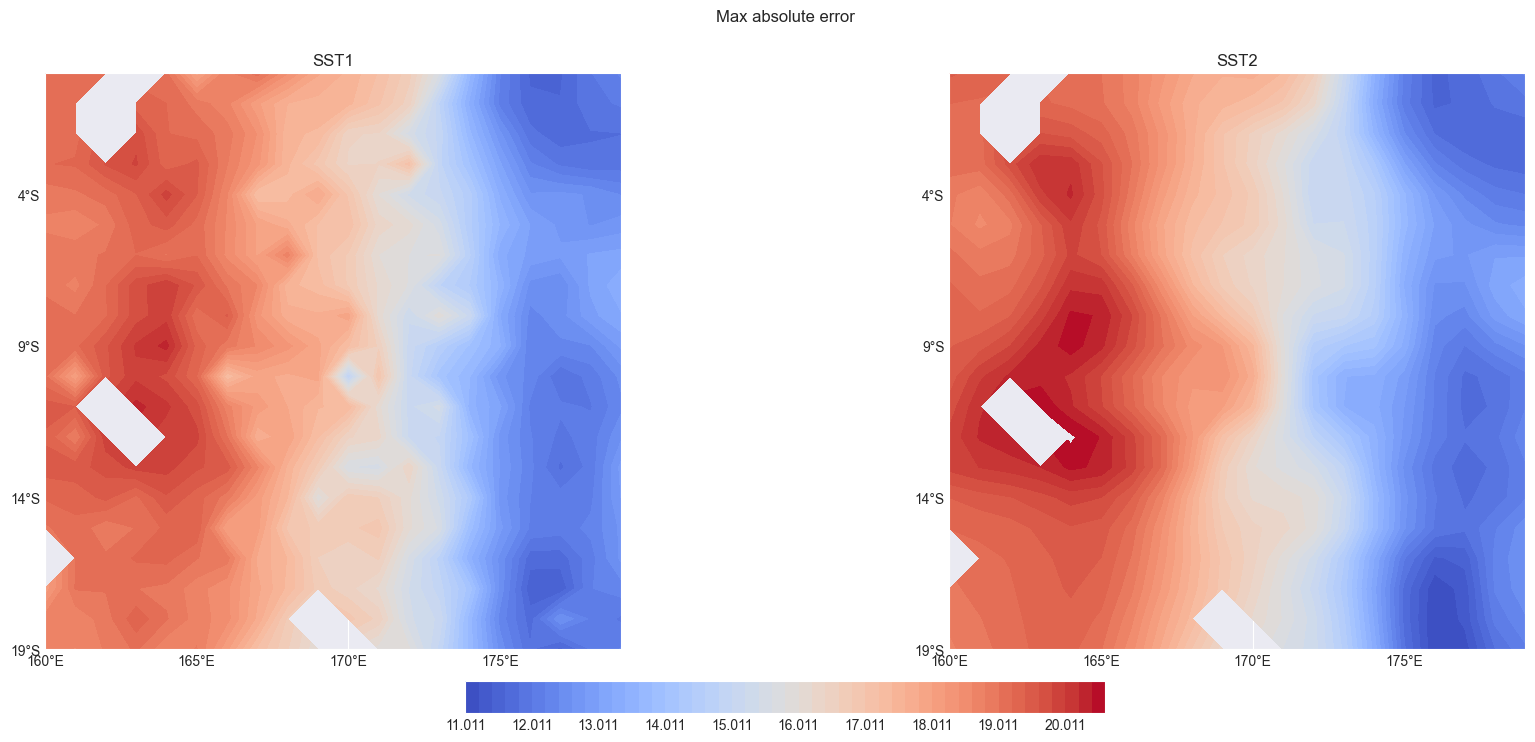

第 23 层的 RMSE:  0.4845634217414926


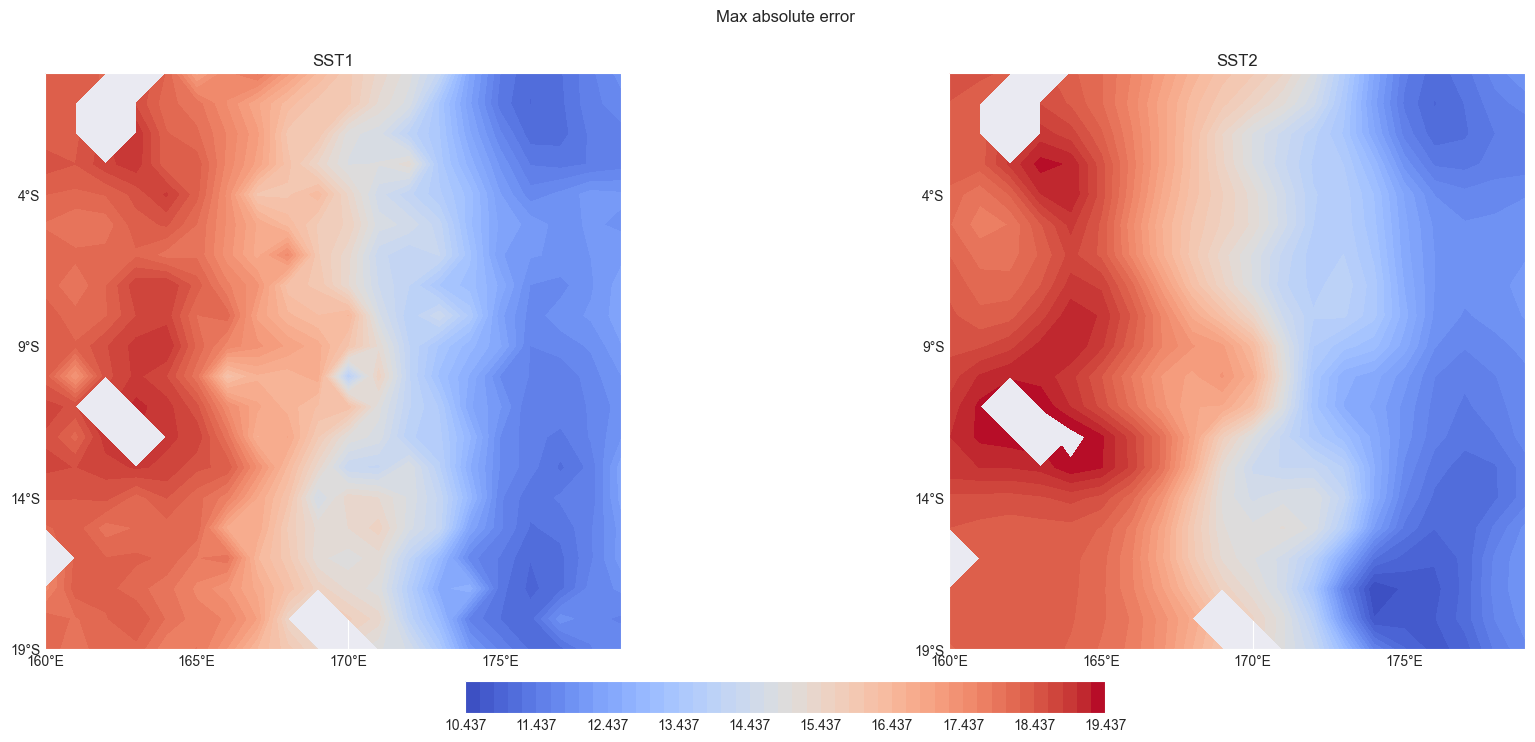

第 24 层的 RMSE:  0.4418020764570397


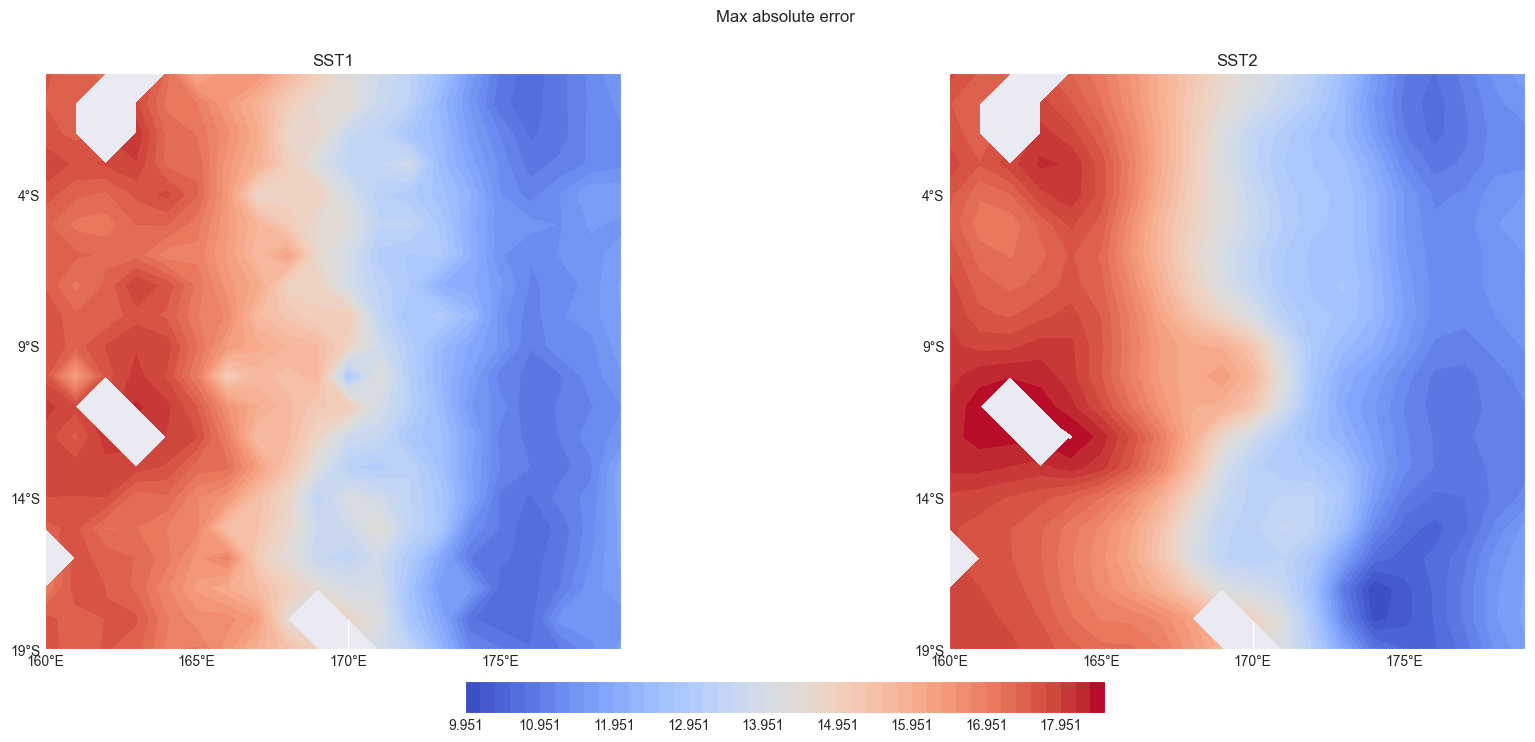

第 25 层的 RMSE:  0.4235596891418493


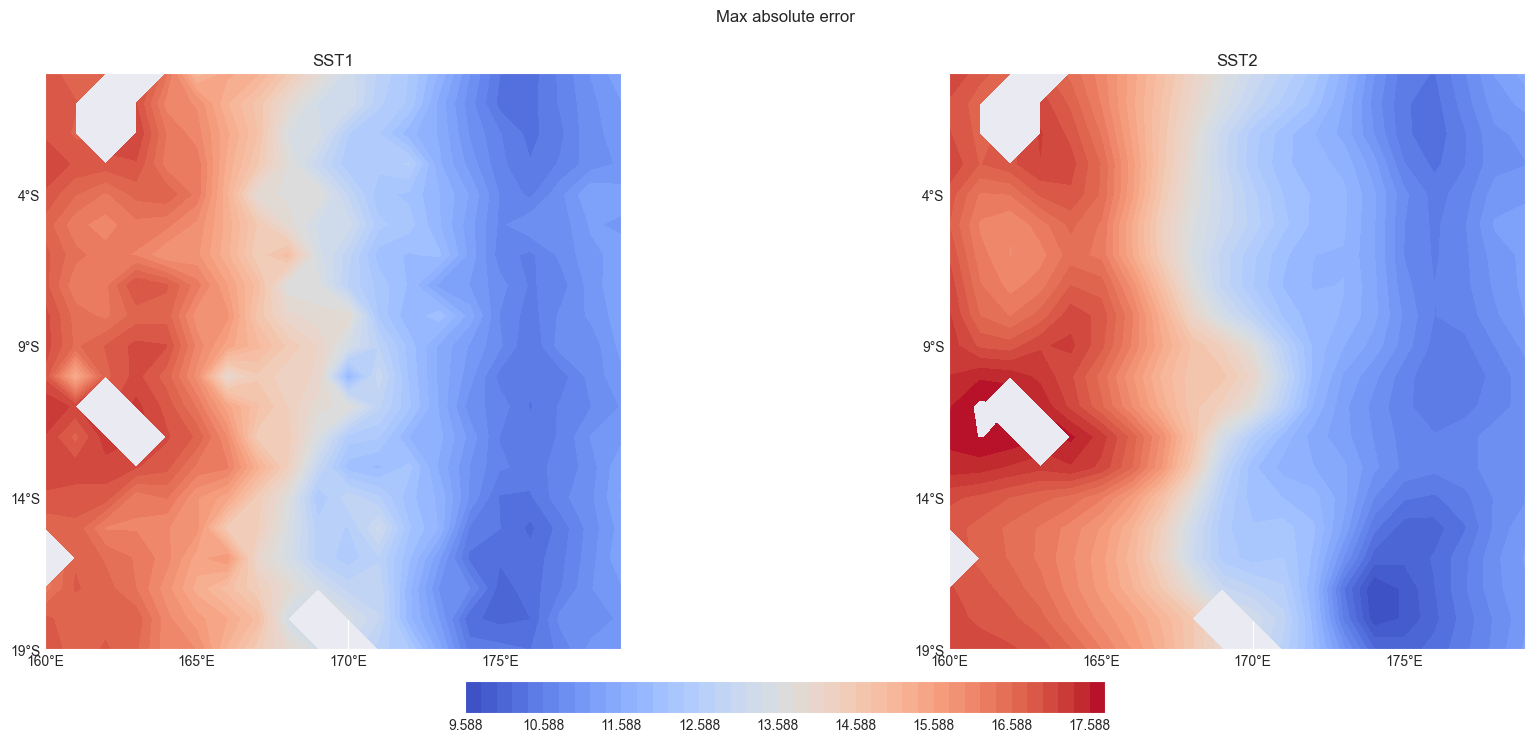

第 26 层的 RMSE:  0.3865818552595877


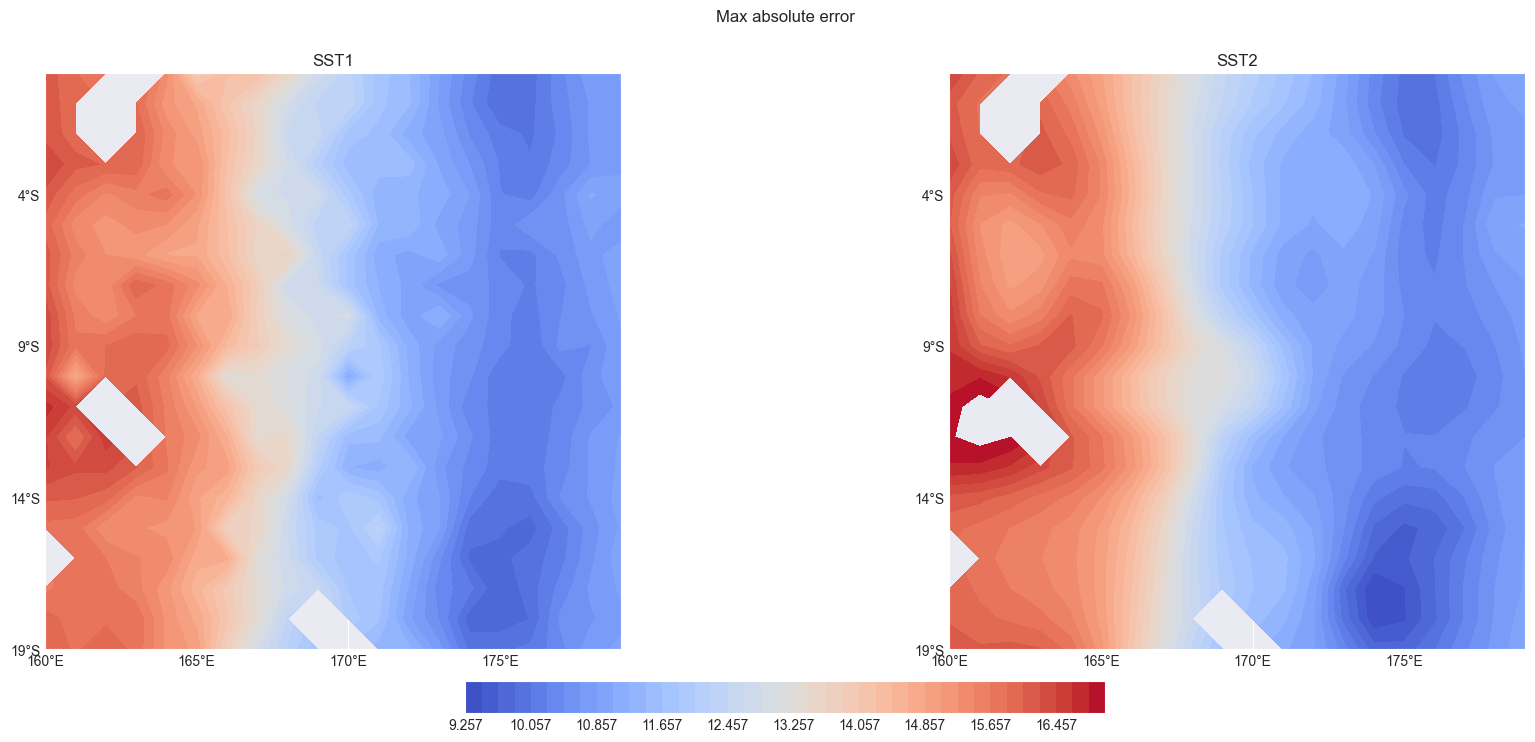

第 27 层的 RMSE:  0.3295220100846205


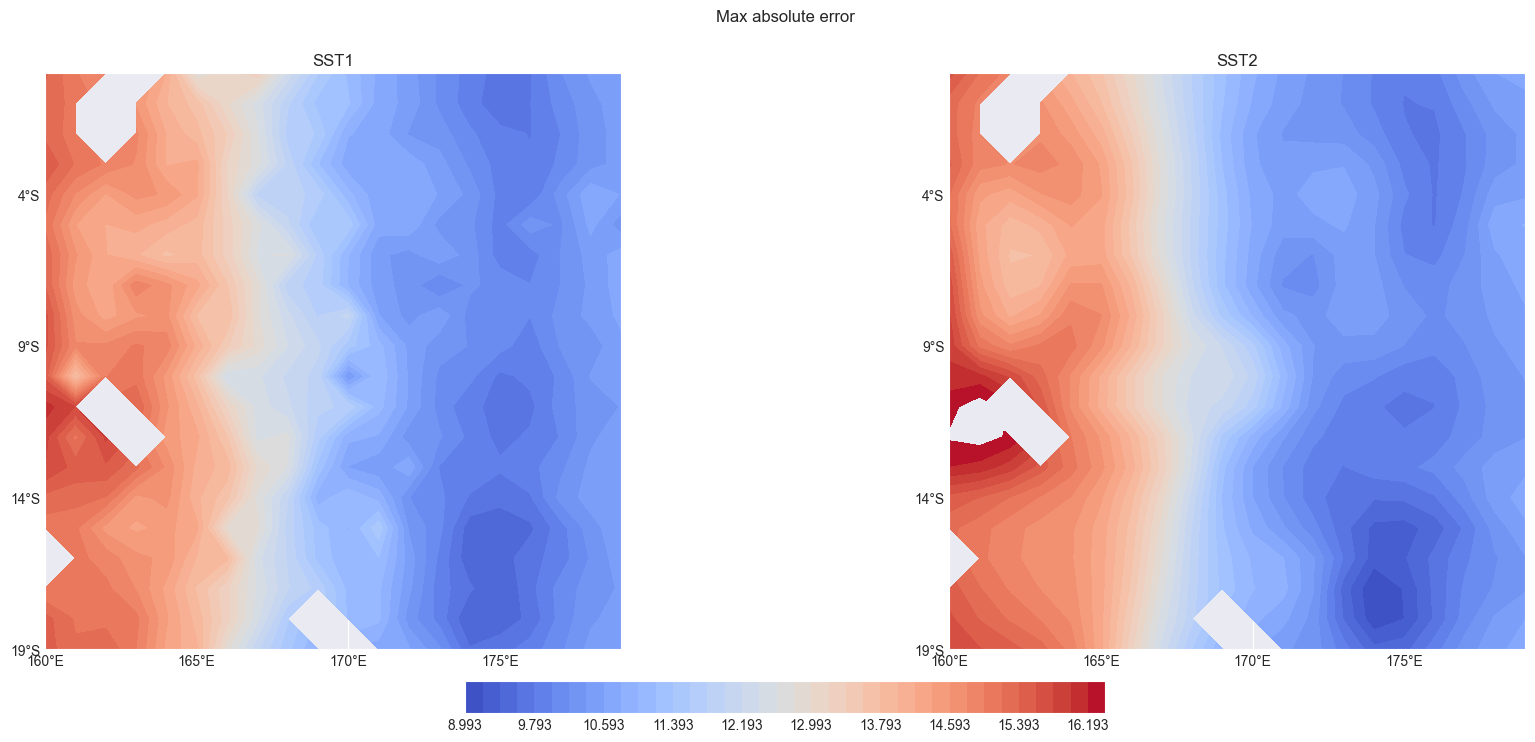

第 28 层的 RMSE:  0.3271892230766469


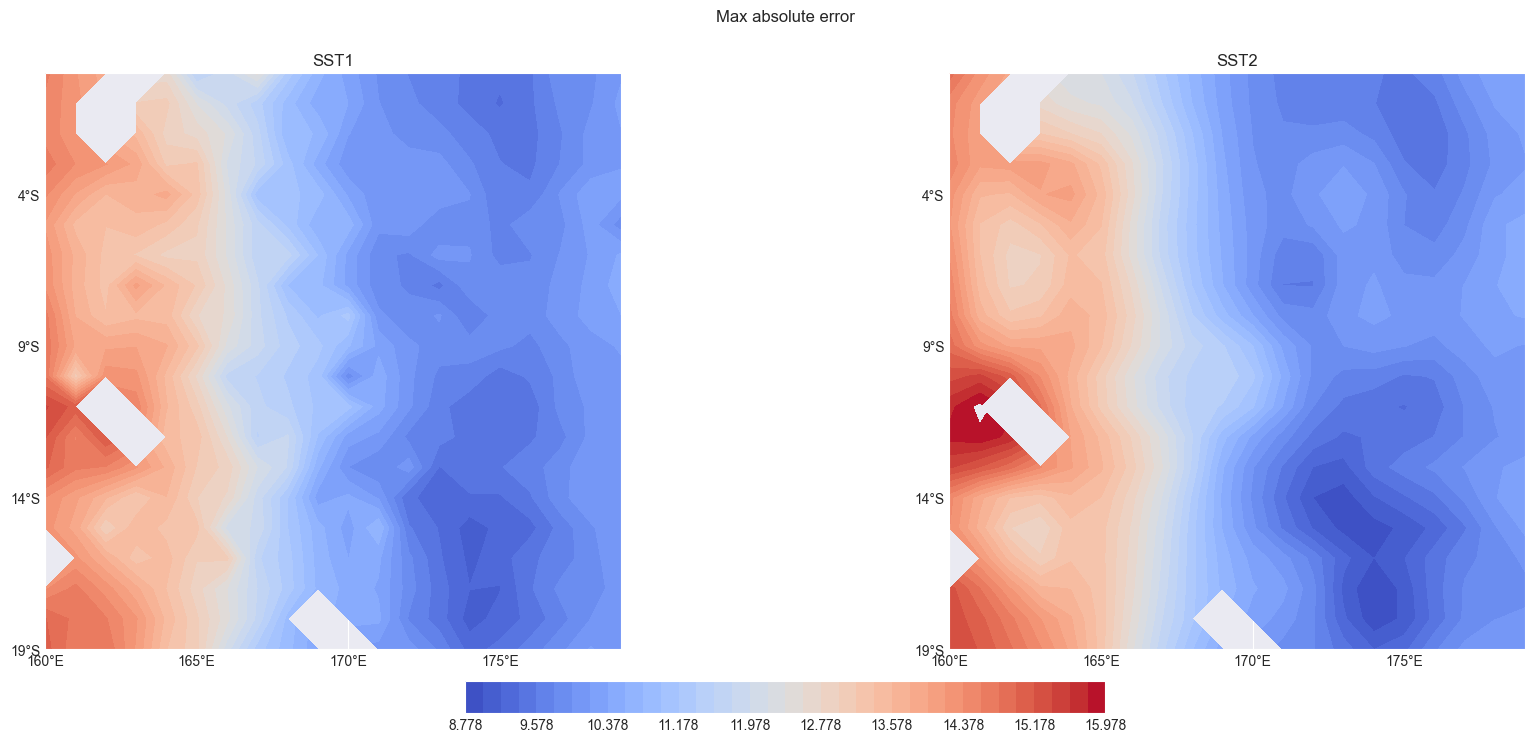

第 29 层的 RMSE:  0.32243144641930627


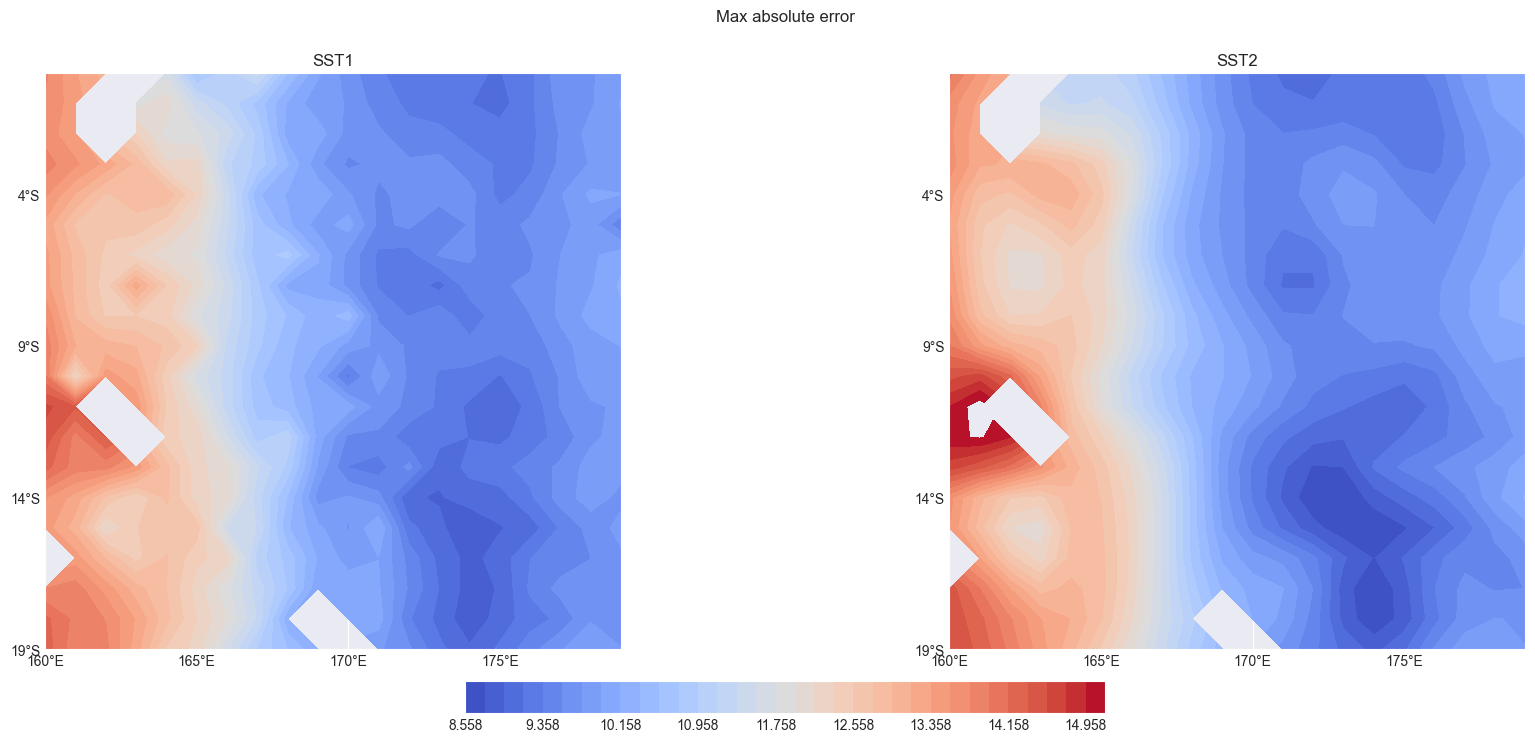

第 30 层的 RMSE:  0.30231698562621506


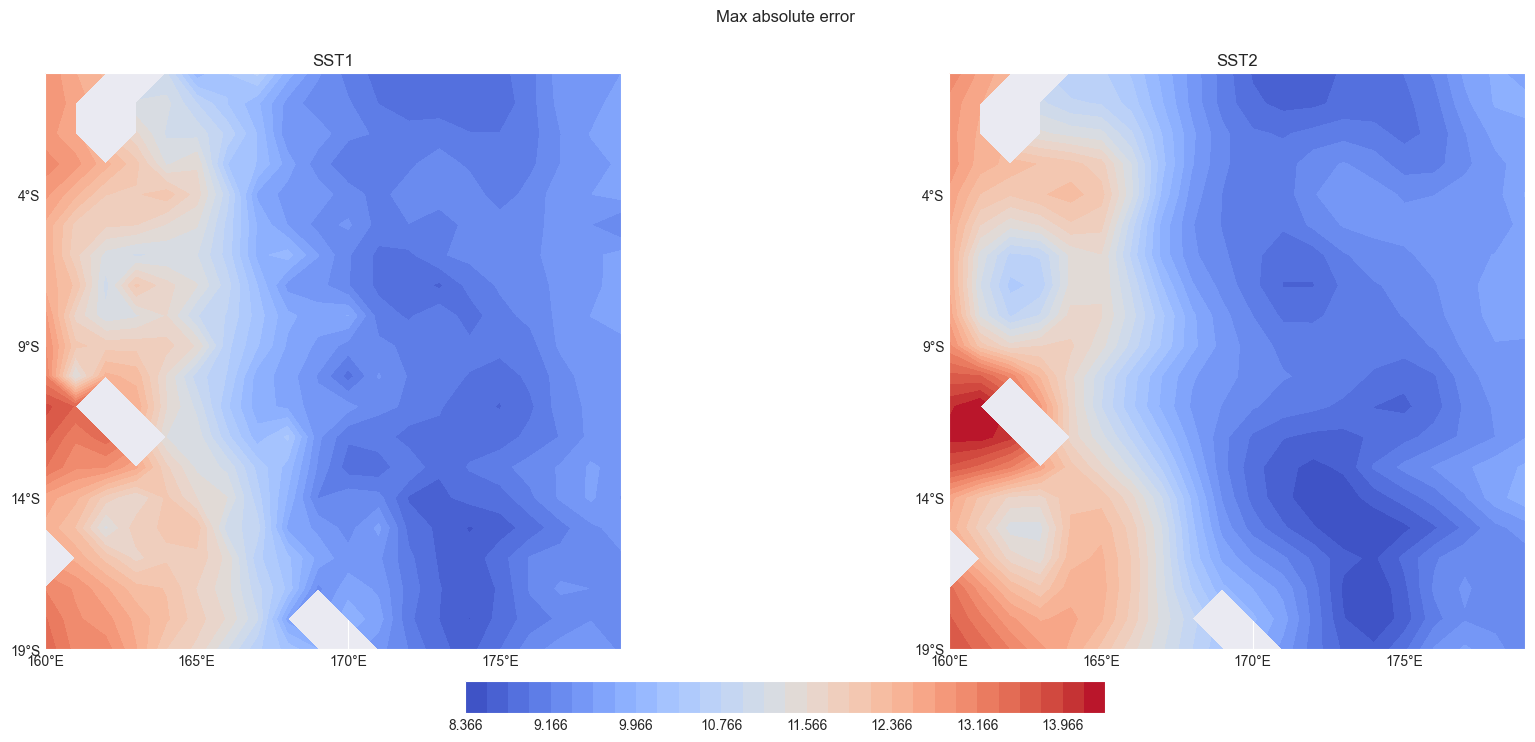

第 31 层的 RMSE:  0.30225823635544075


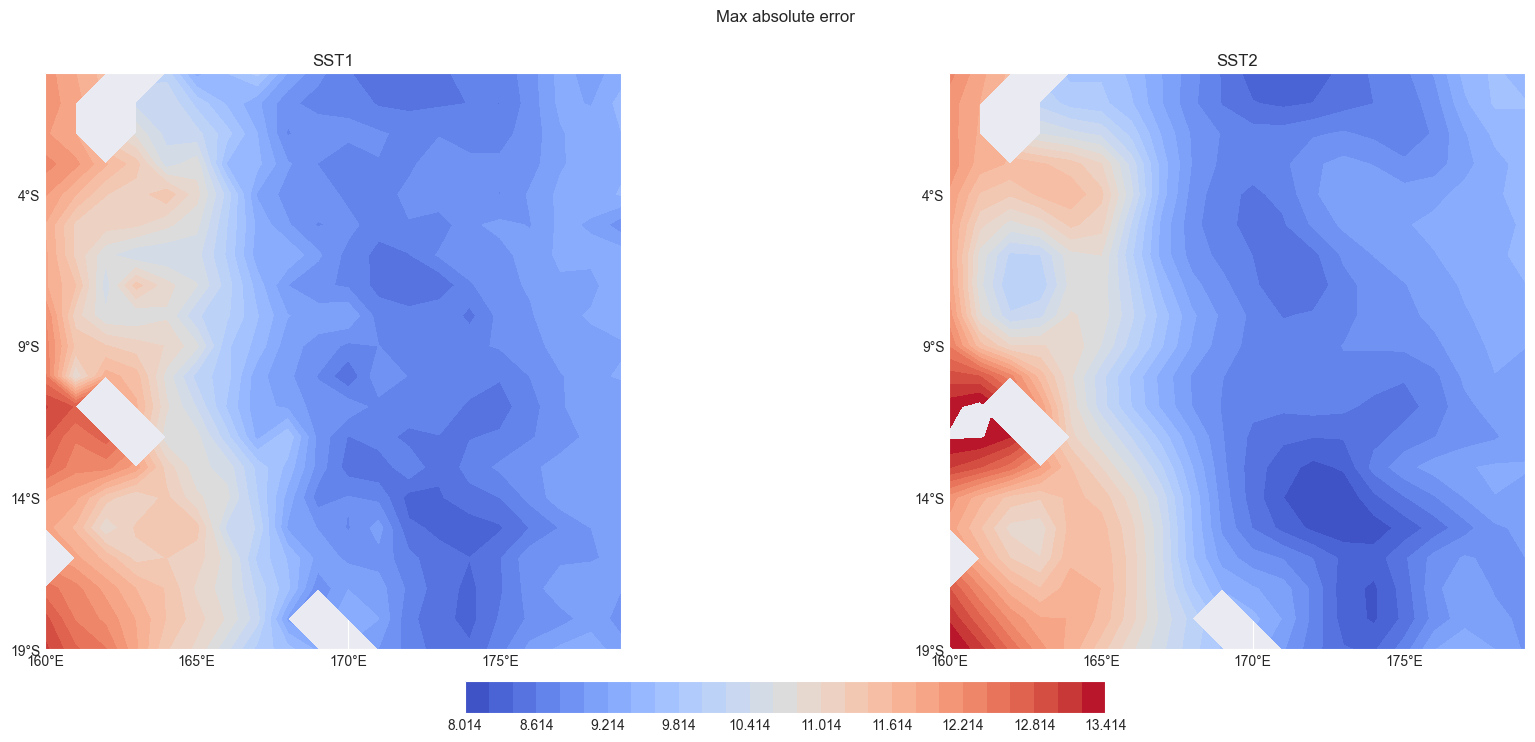

第 32 层的 RMSE:  0.27276241618777103


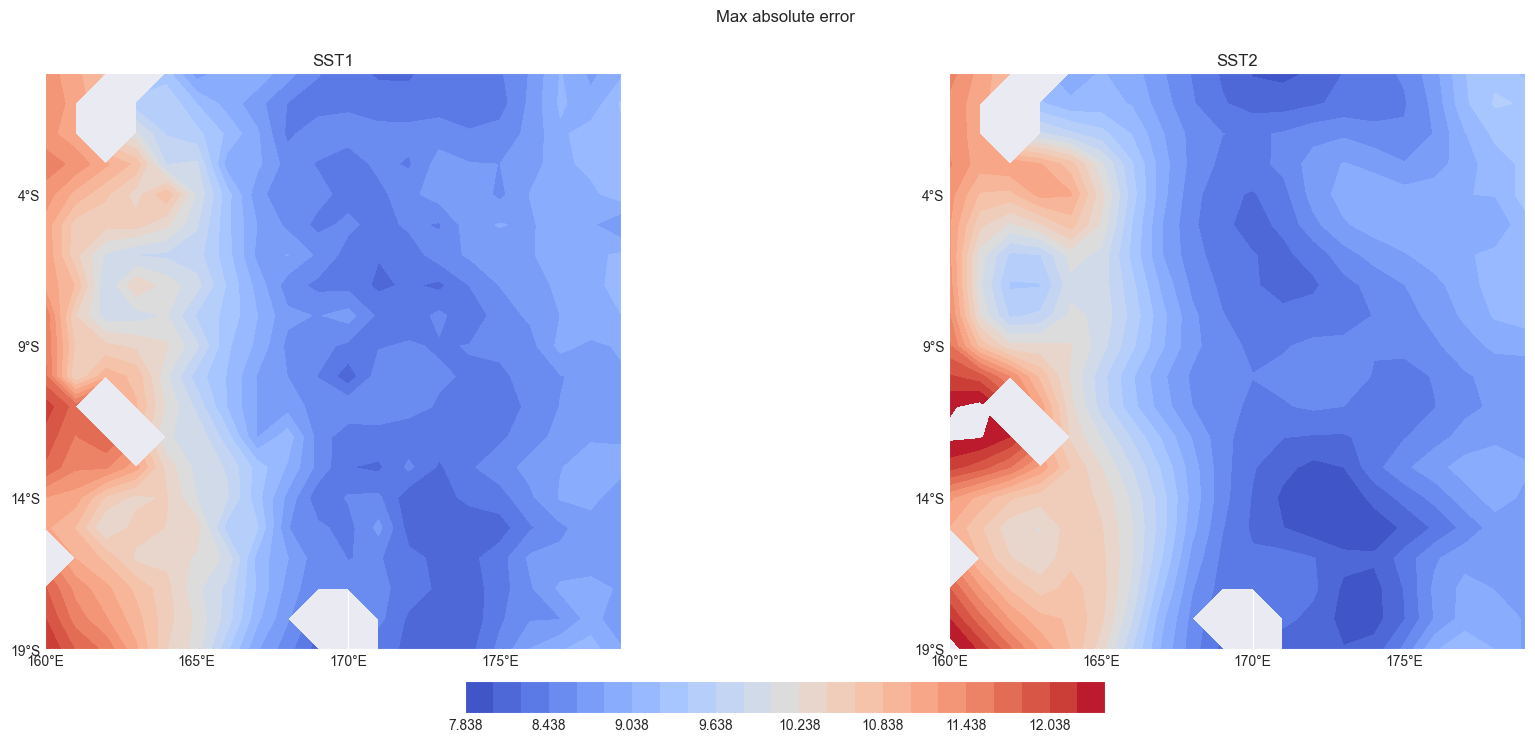

第 33 层的 RMSE:  0.22429162521249293


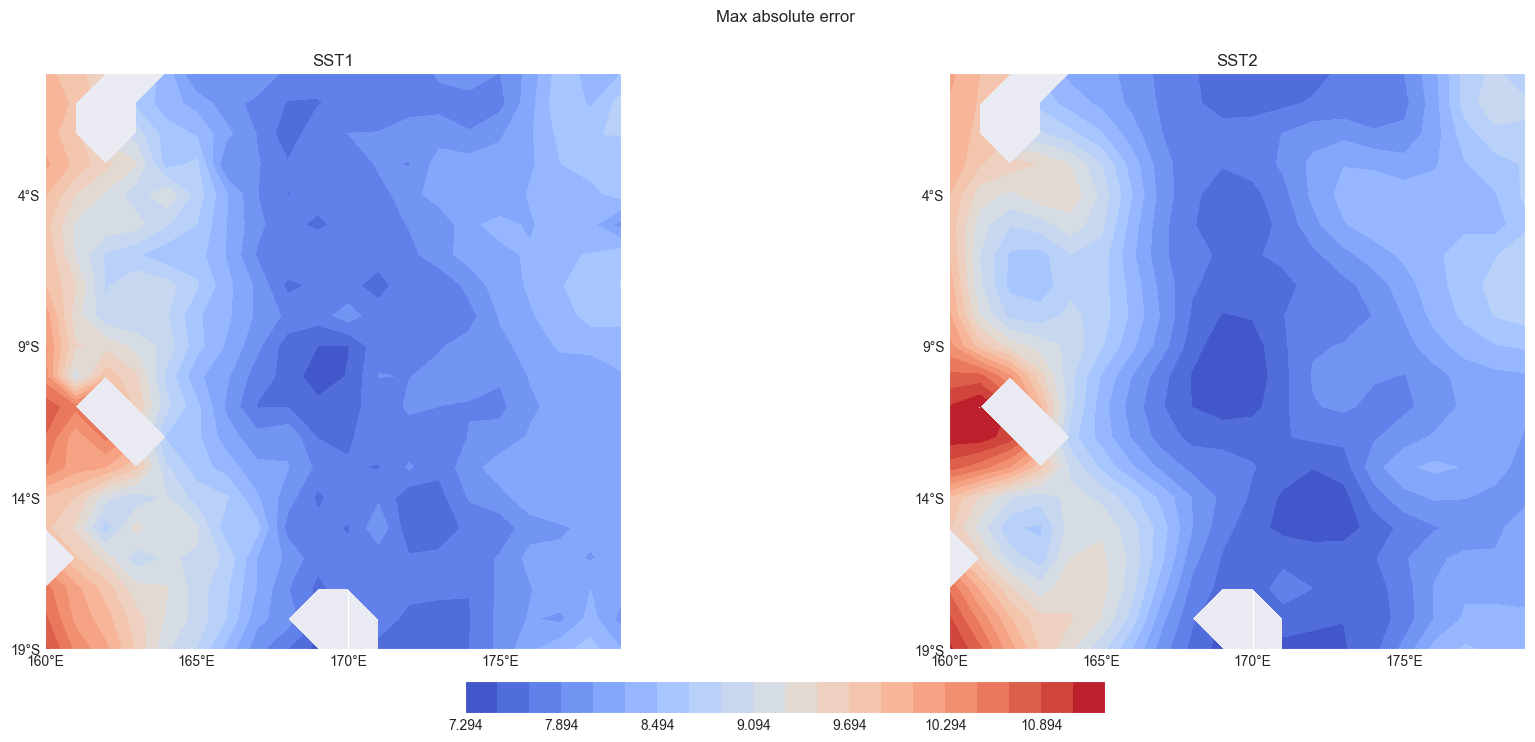

第 34 层的 RMSE:  0.20347876502967177


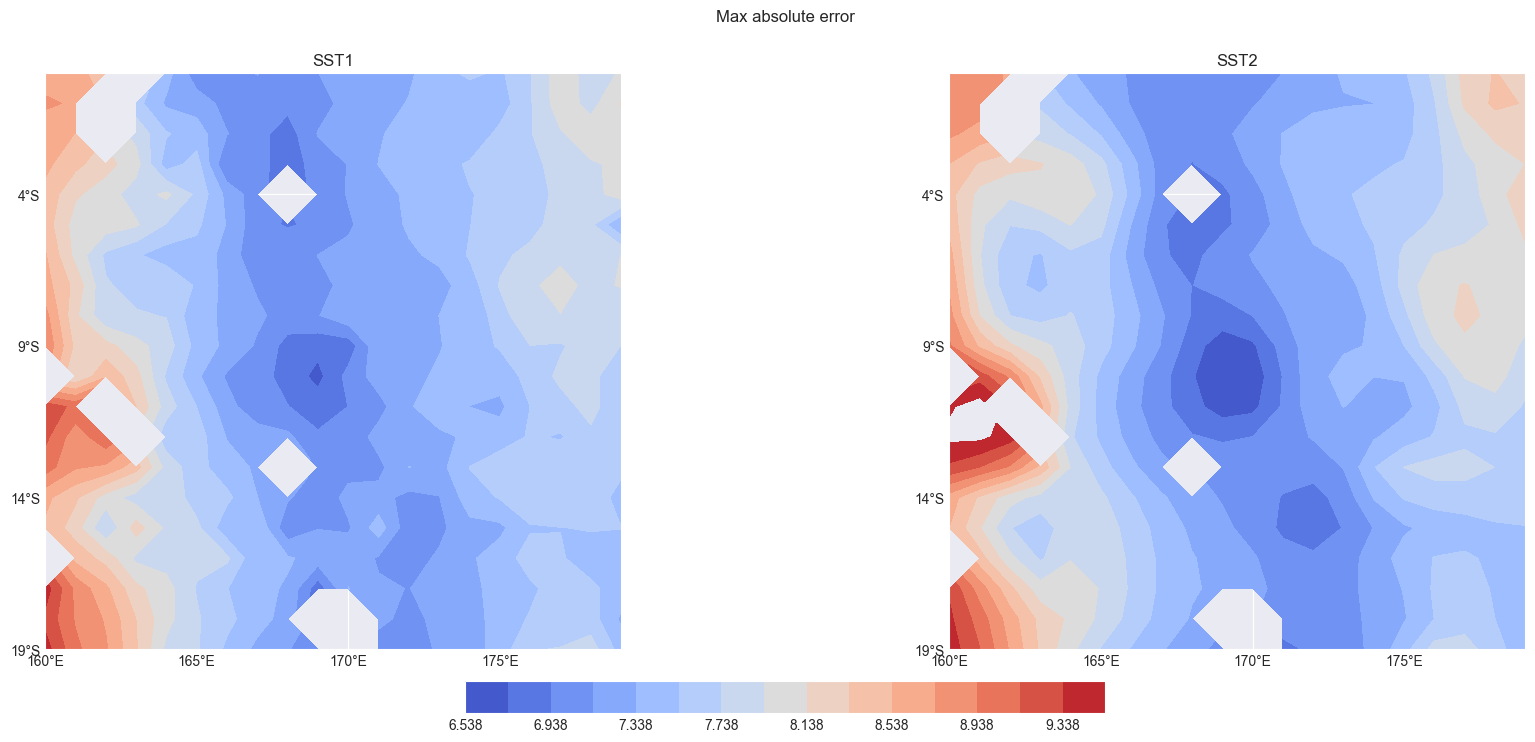

第 35 层的 RMSE:  0.16935227028361838


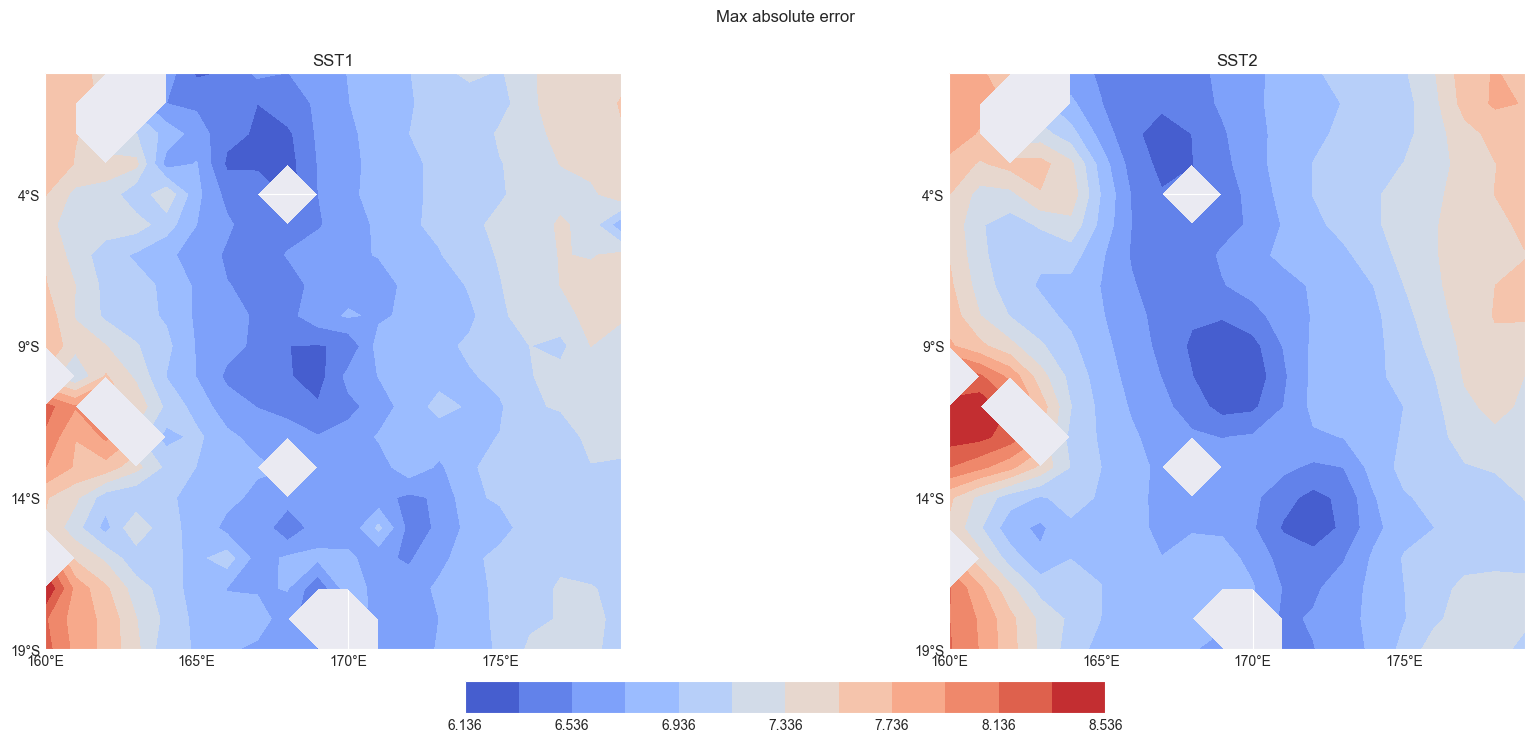

第 36 层的 RMSE:  0.15636145911821434


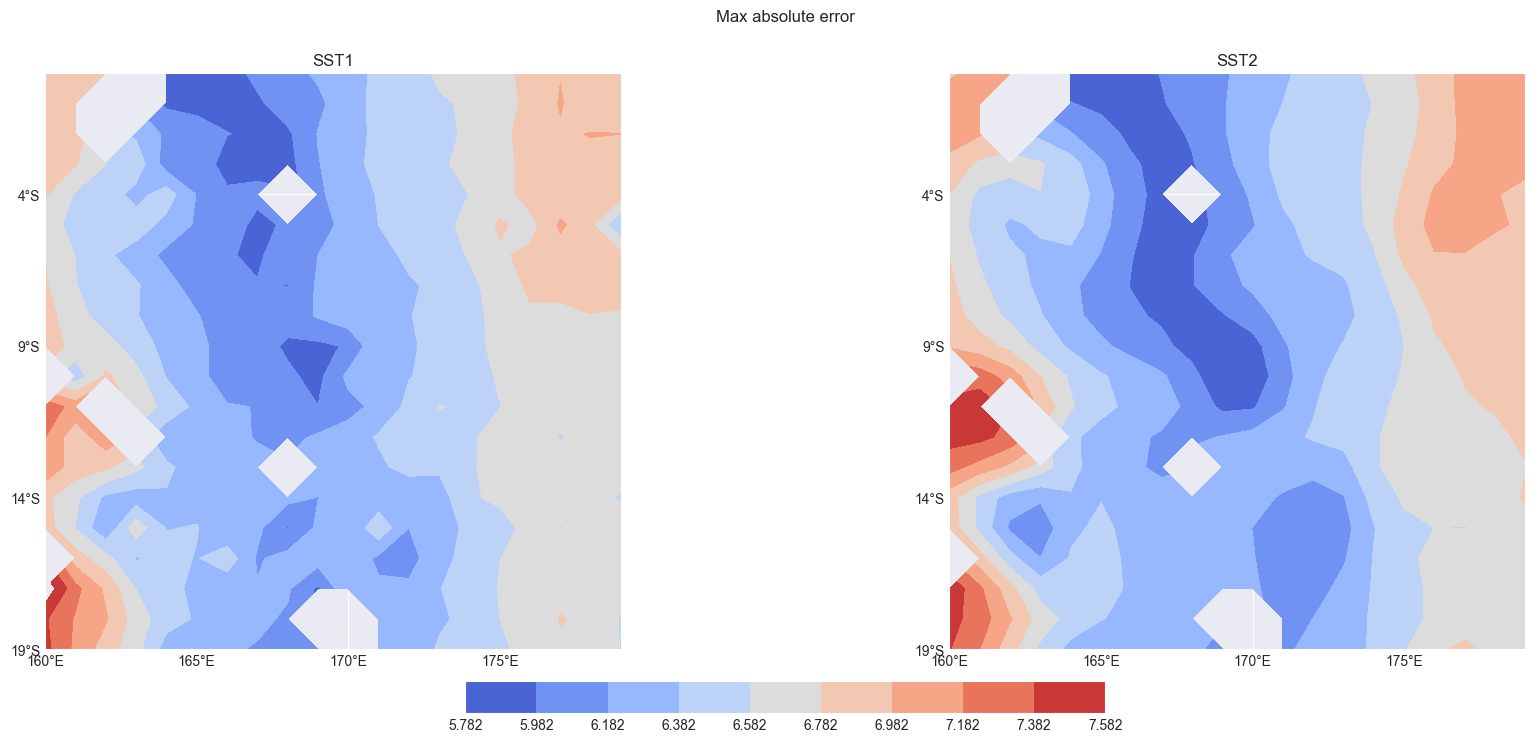

第 37 层的 RMSE:  0.12442287124738091


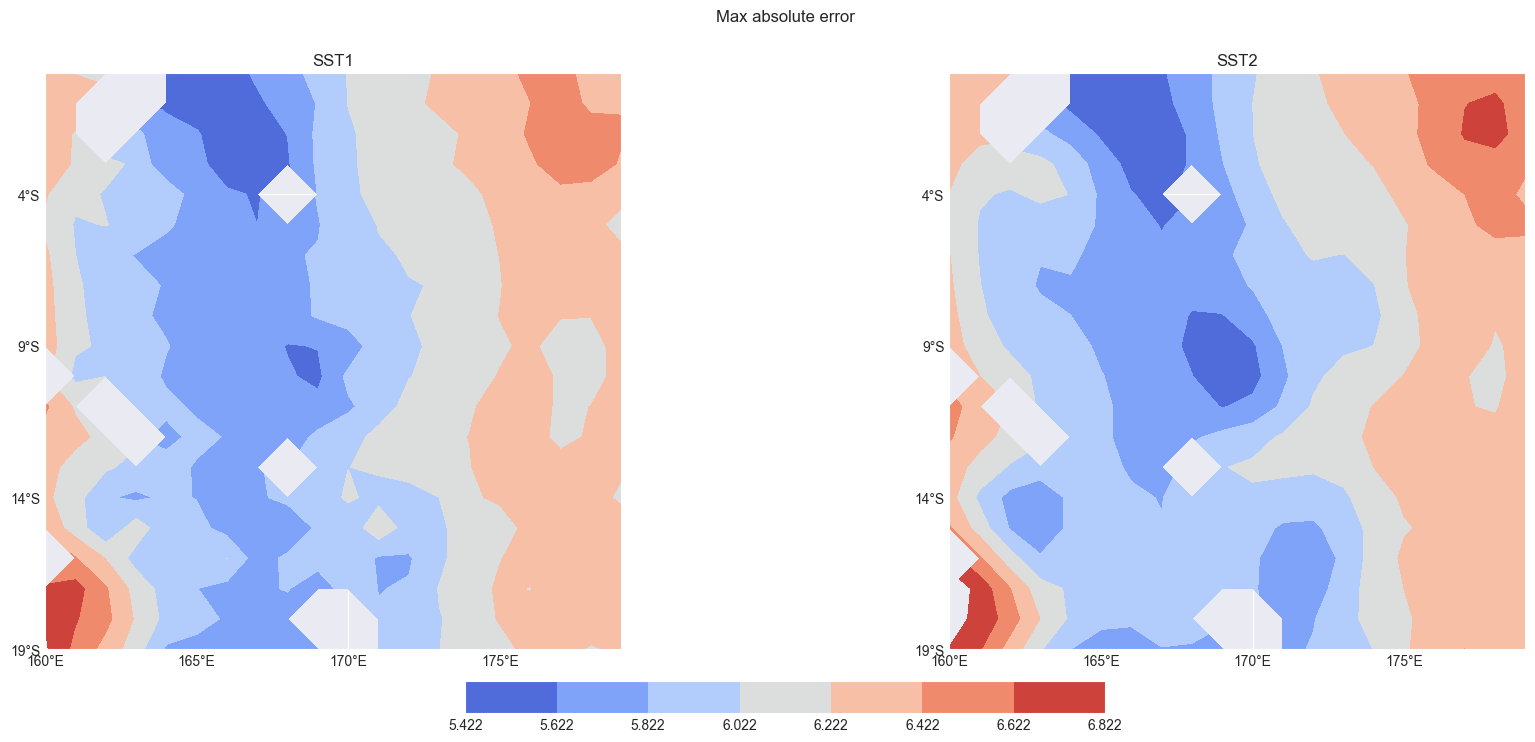

第 38 层的 RMSE:  0.08399098626790952


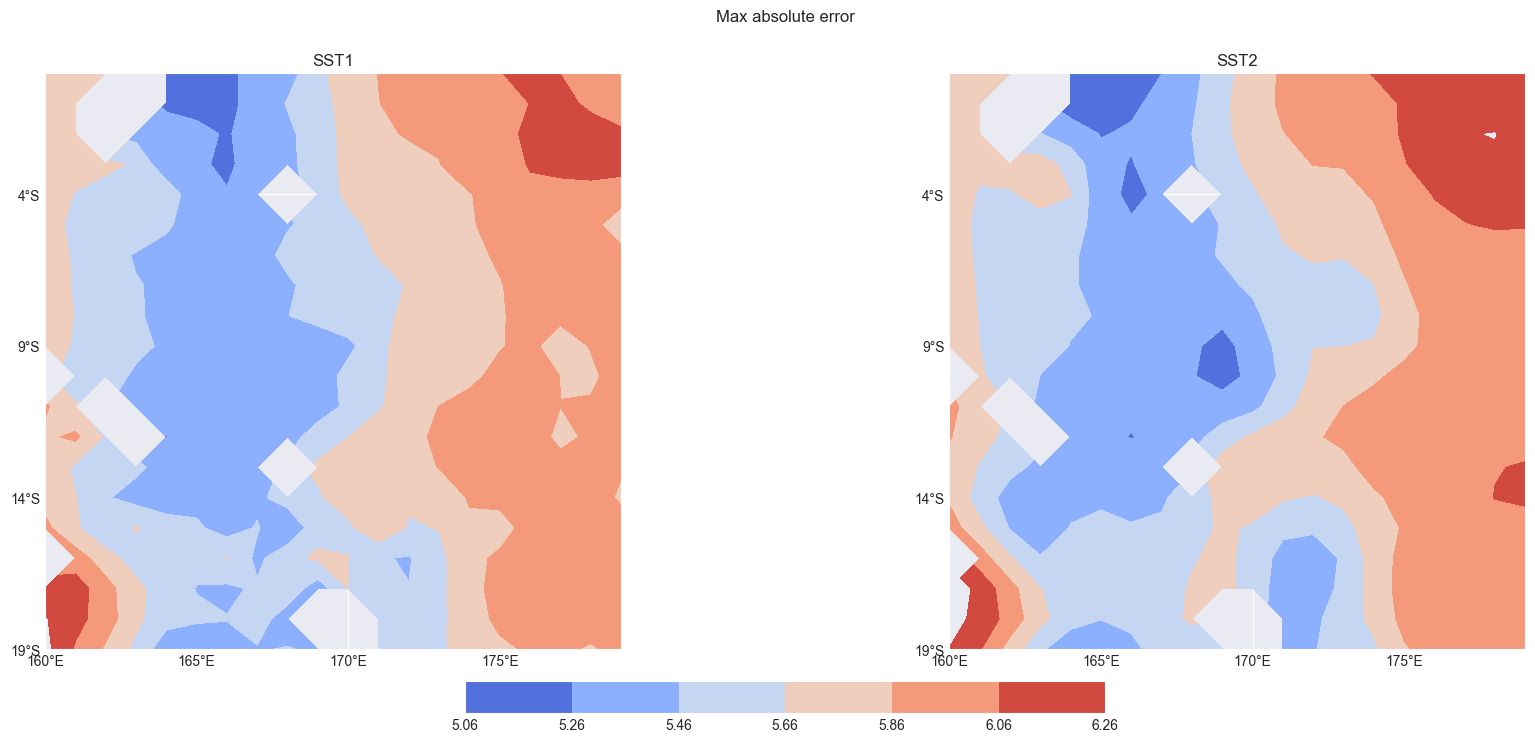

第 39 层的 RMSE:  0.08600726628176568


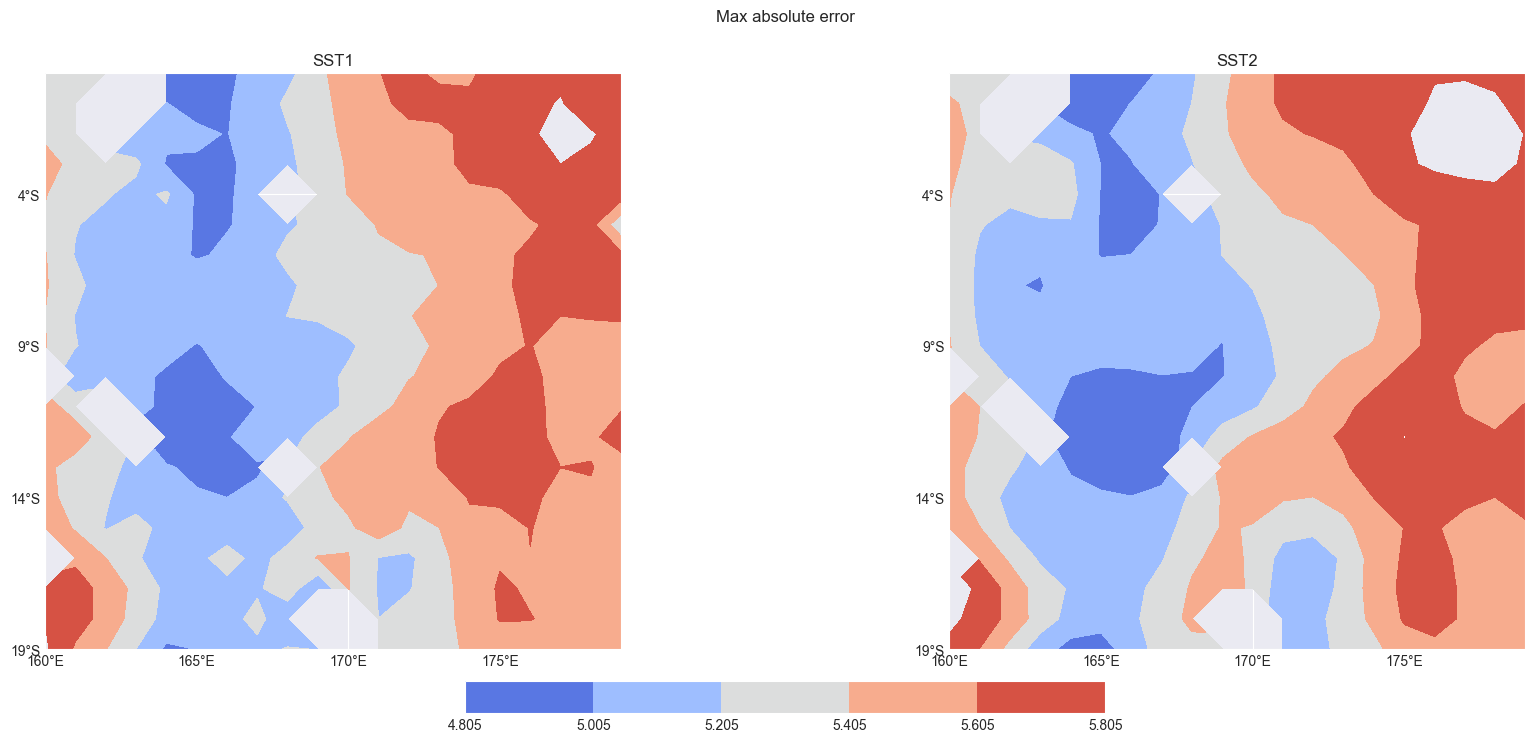

第 40 层的 RMSE:  0.08096460260791584


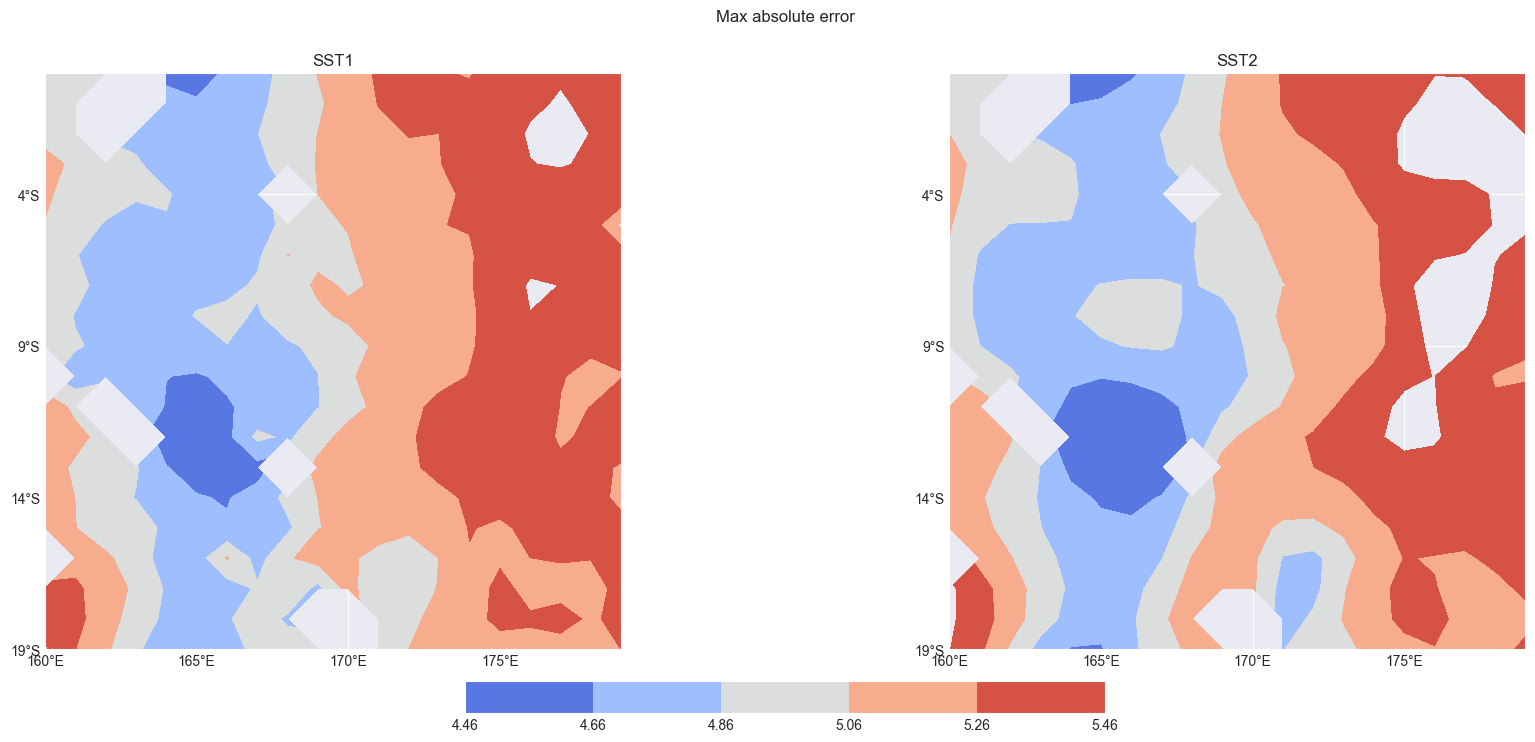

第 41 层的 RMSE:  0.07936549390259669


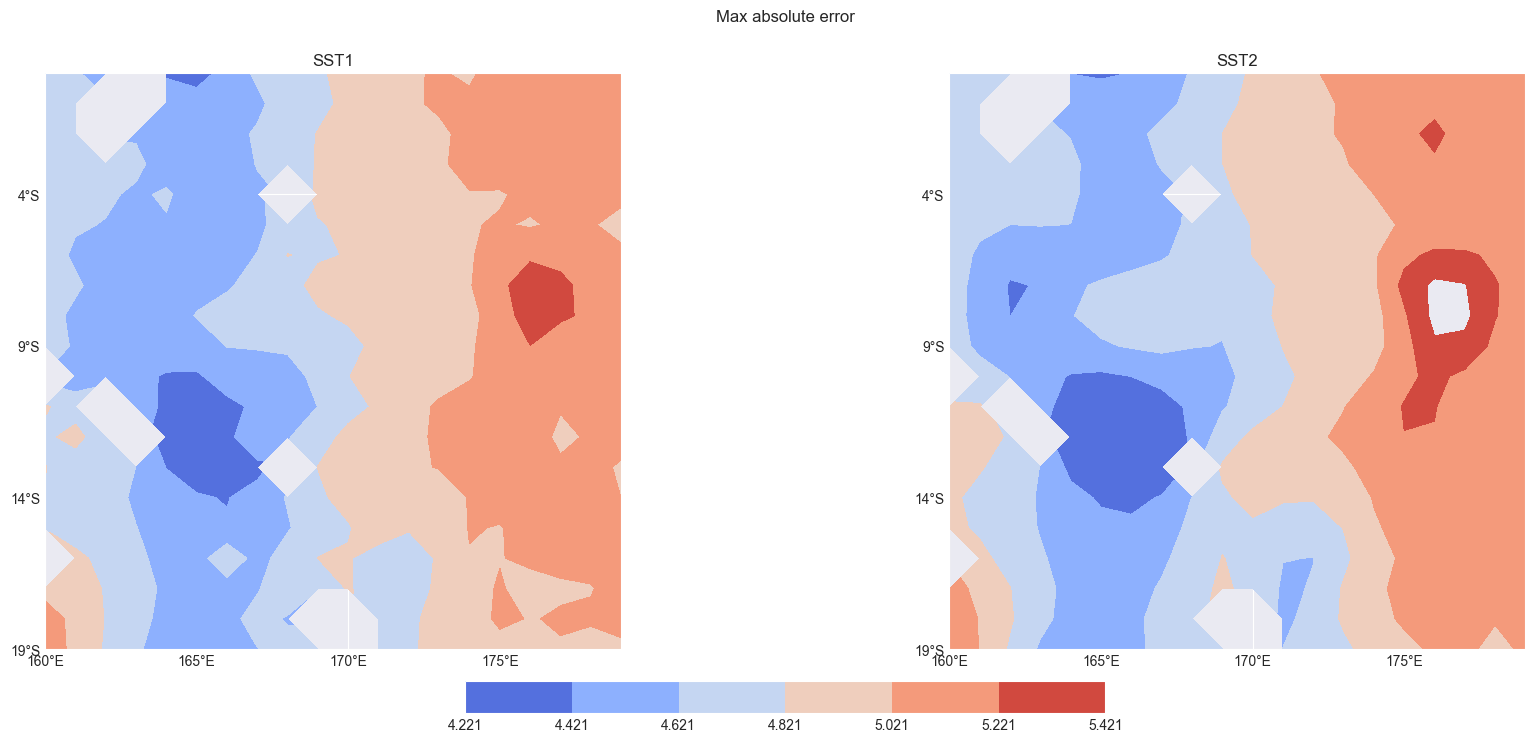

第 42 层的 RMSE:  0.07101685414149345


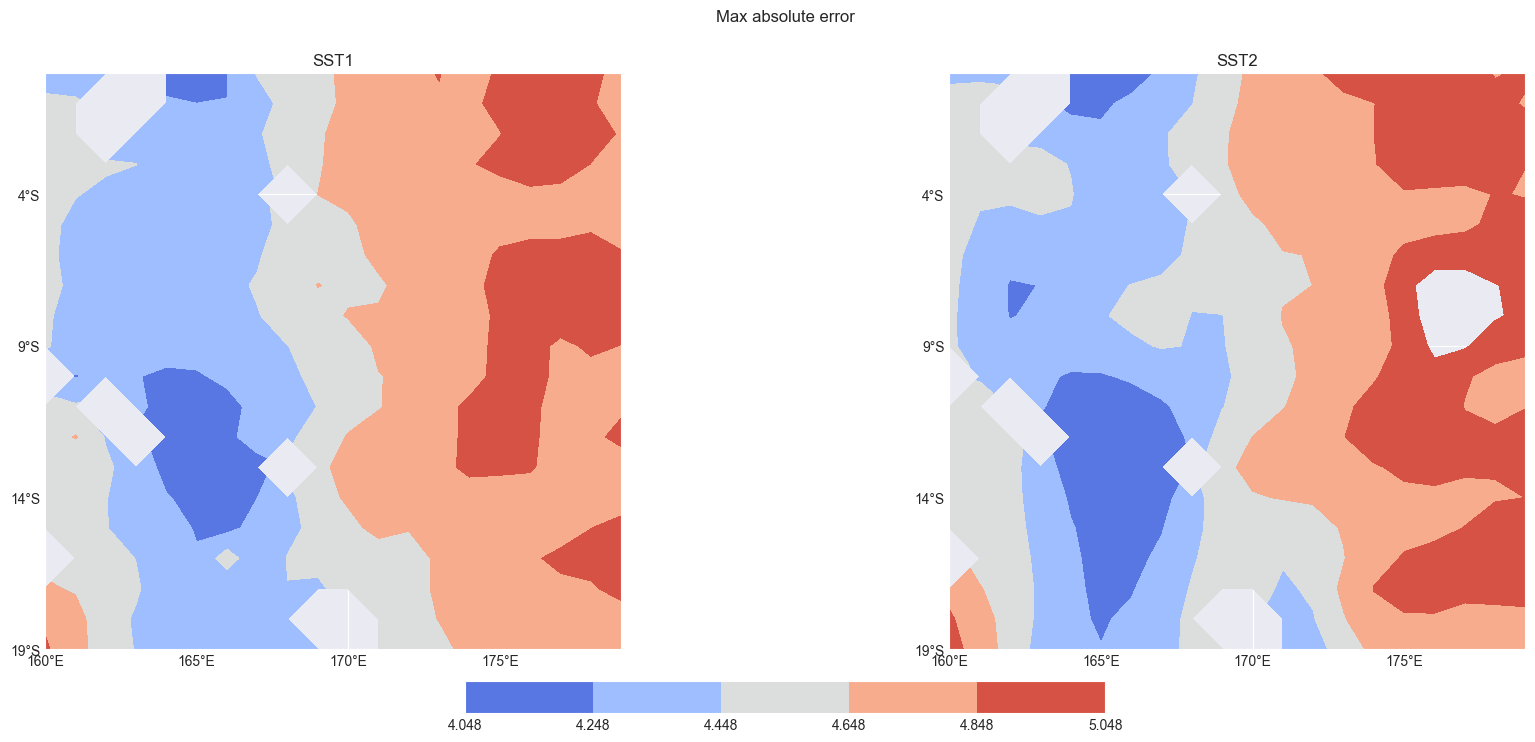

第 43 层的 RMSE:  0.06180403979605463


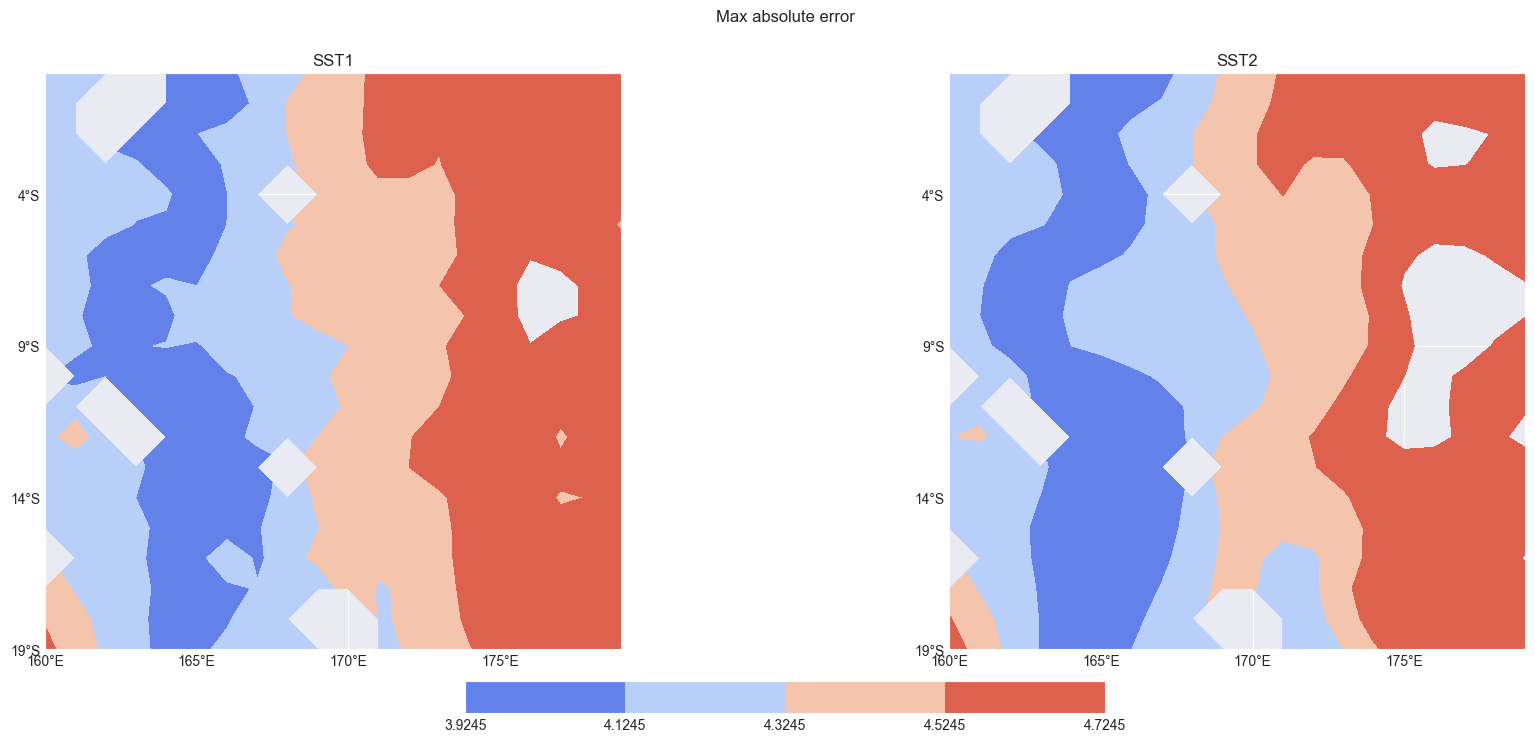

第 44 层的 RMSE:  0.05446580815307041


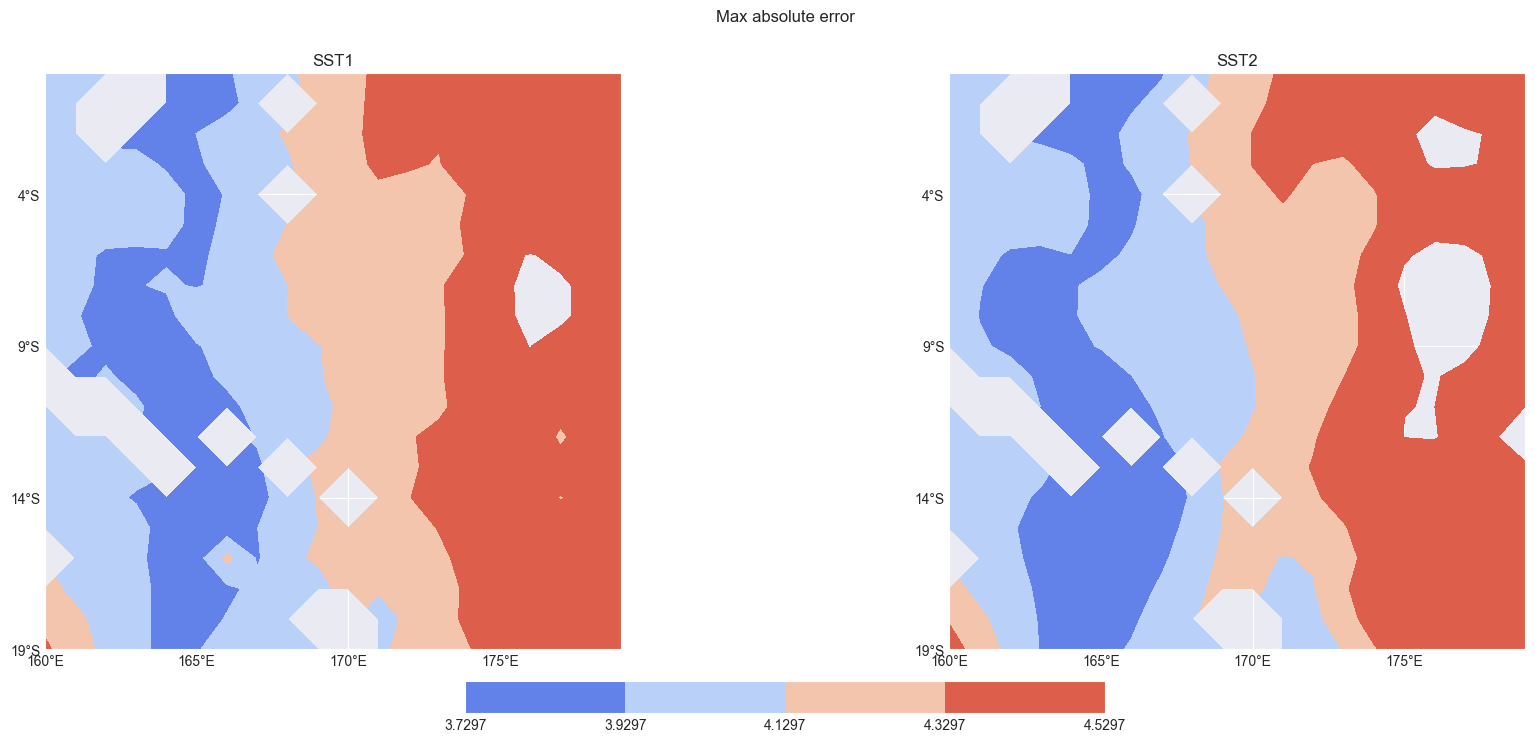

第 45 层的 RMSE:  0.051877172091010684


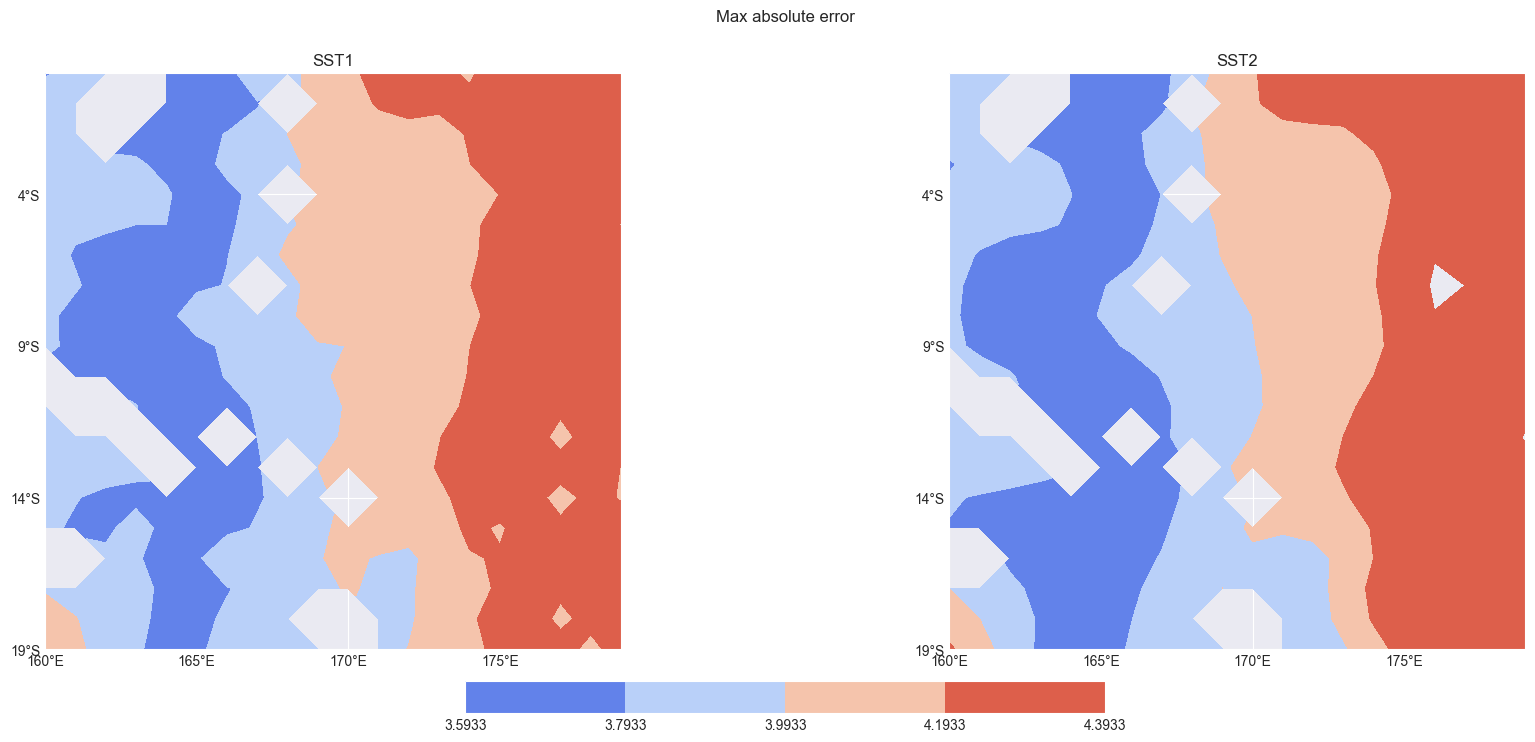

第 46 层的 RMSE:  0.05050940905267063


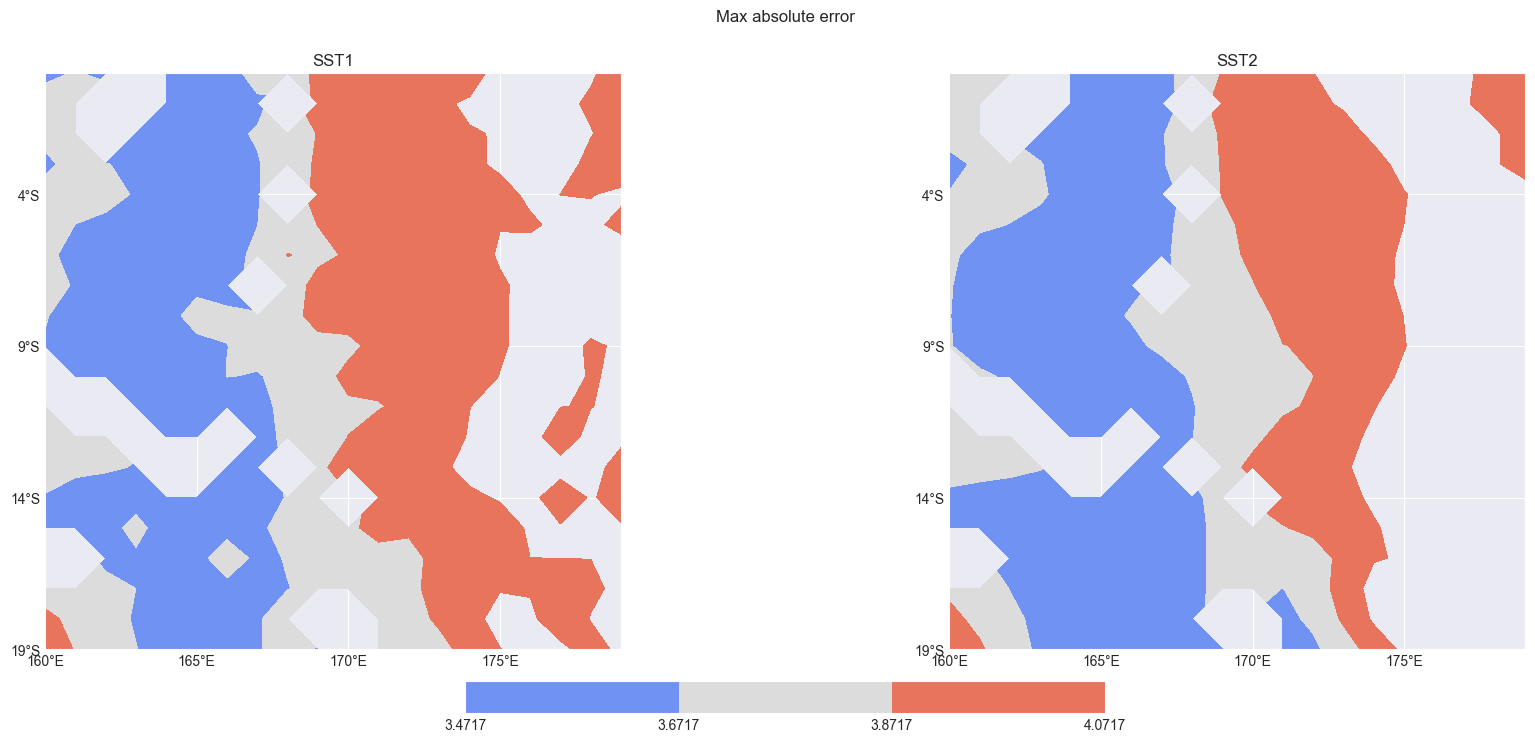

第 47 层的 RMSE:  0.05507676393378673


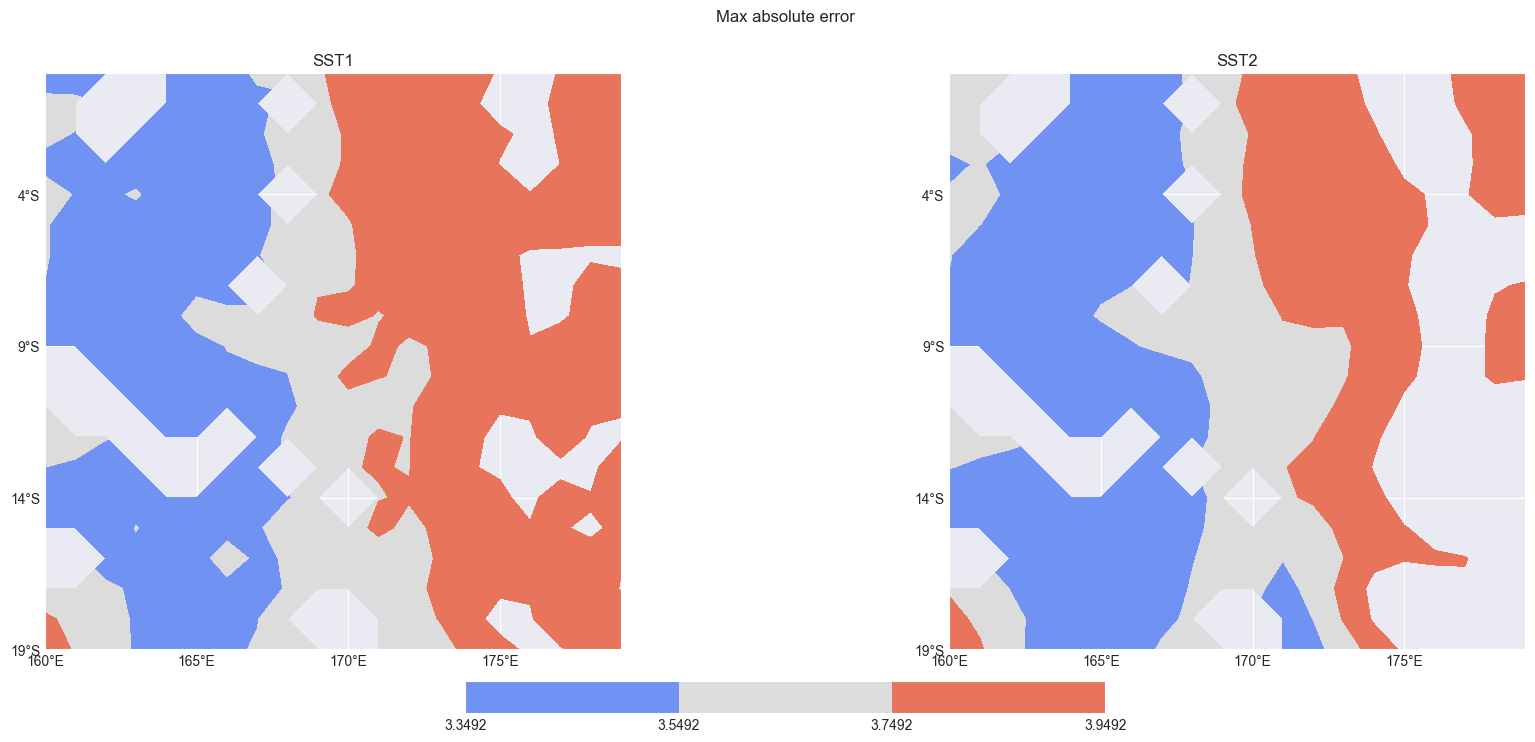

第 48 层的 RMSE:  0.05362475008843457


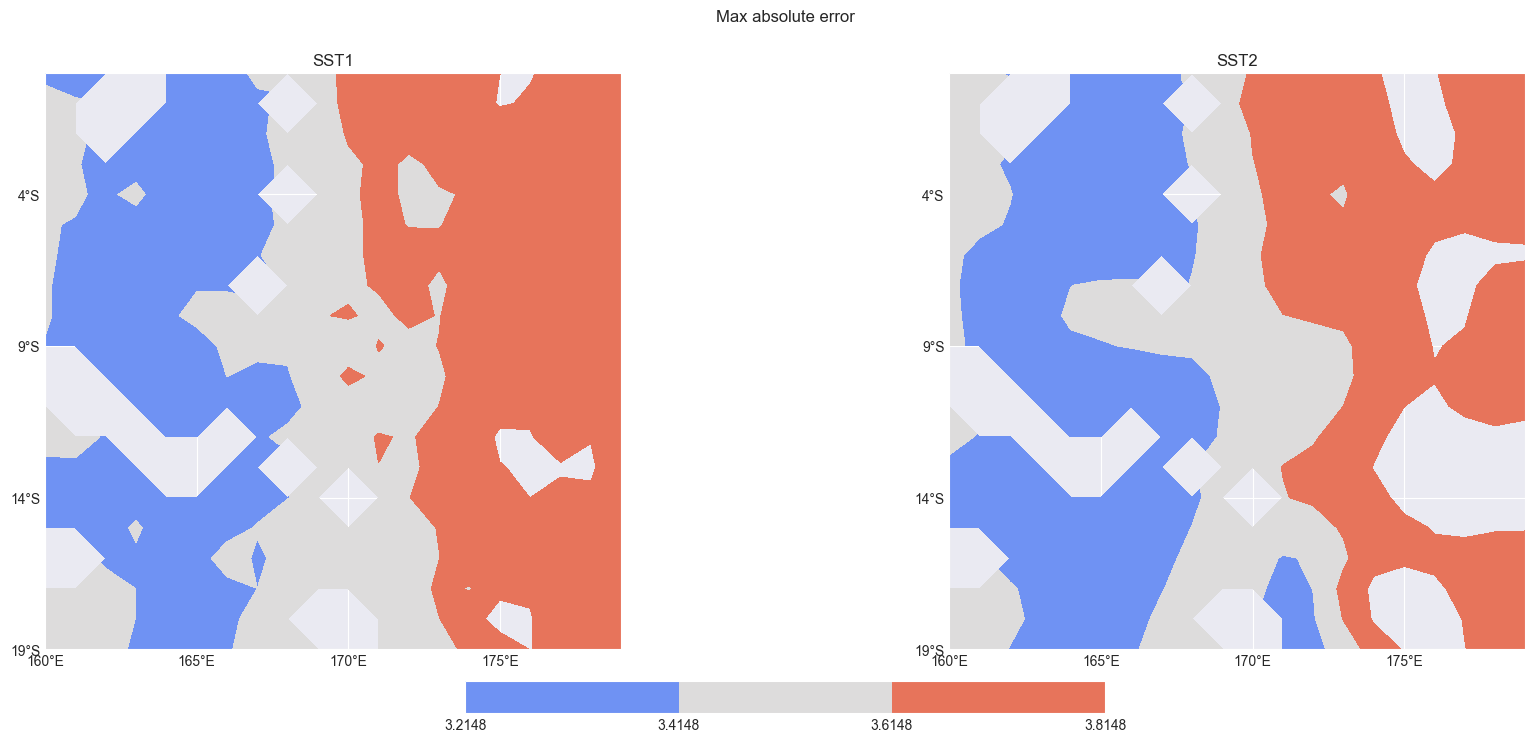

第 49 层的 RMSE:  0.05041158189011504


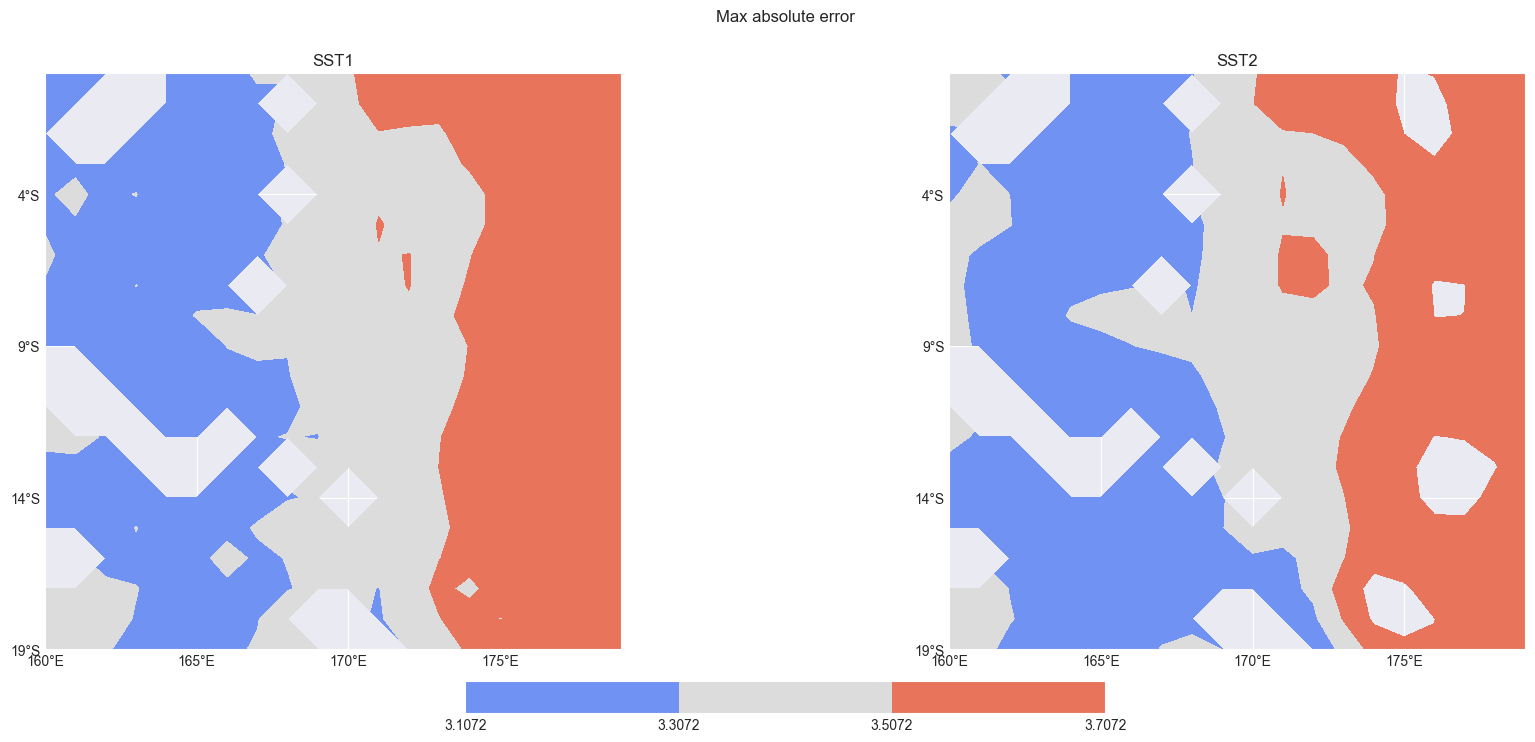

第 50 层的 RMSE:  0.04644325082563639


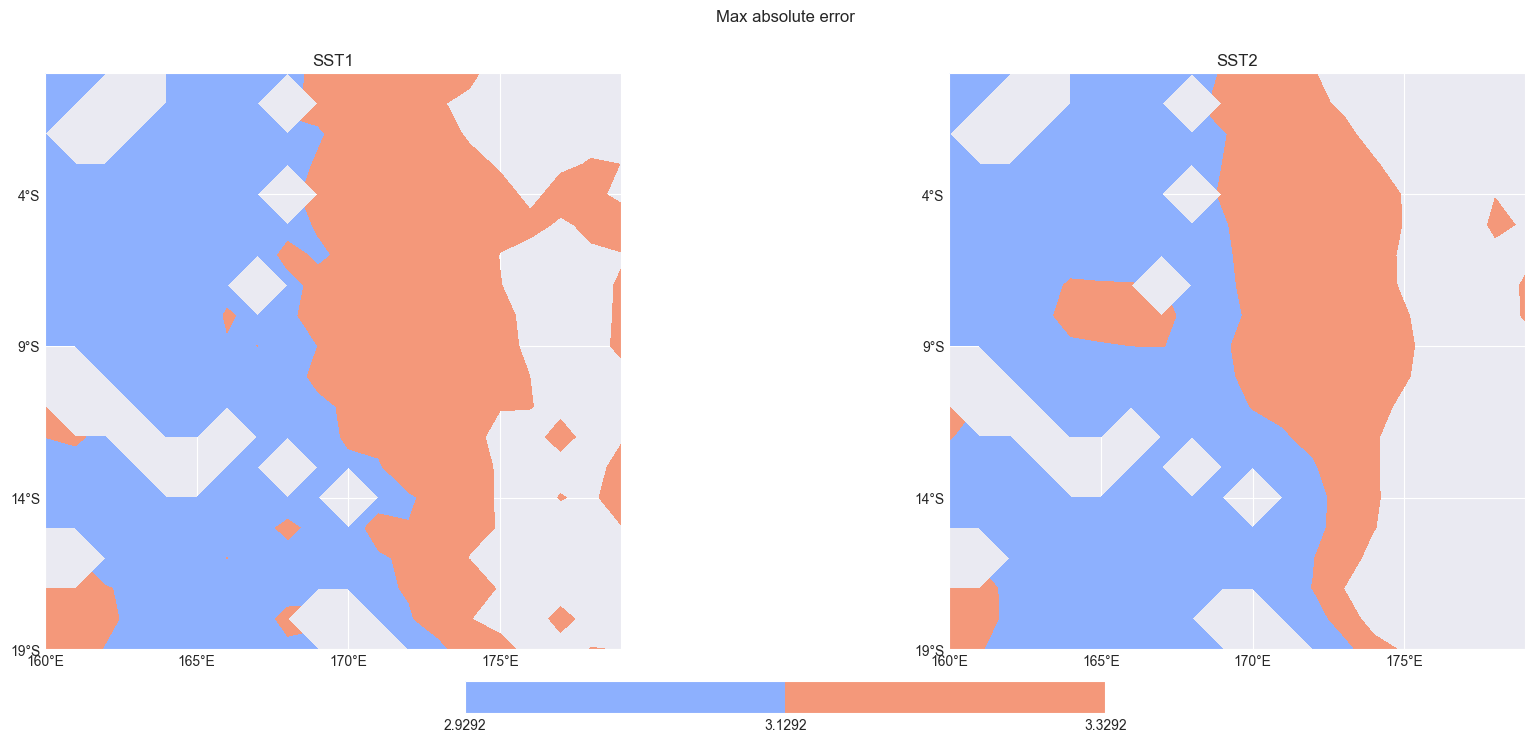

第 51 层的 RMSE:  0.04408444783897761


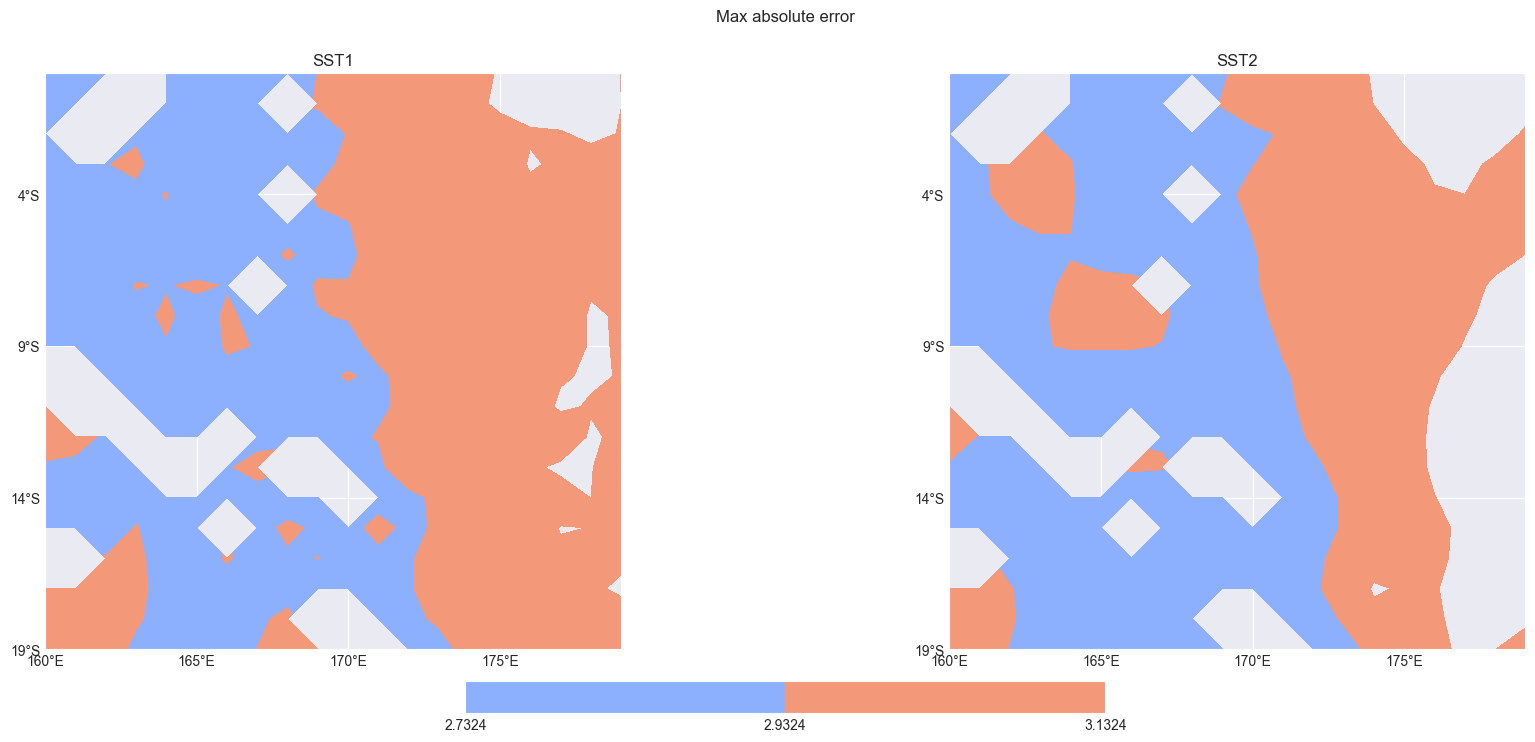

第 52 层的 RMSE:  0.034866736687540985


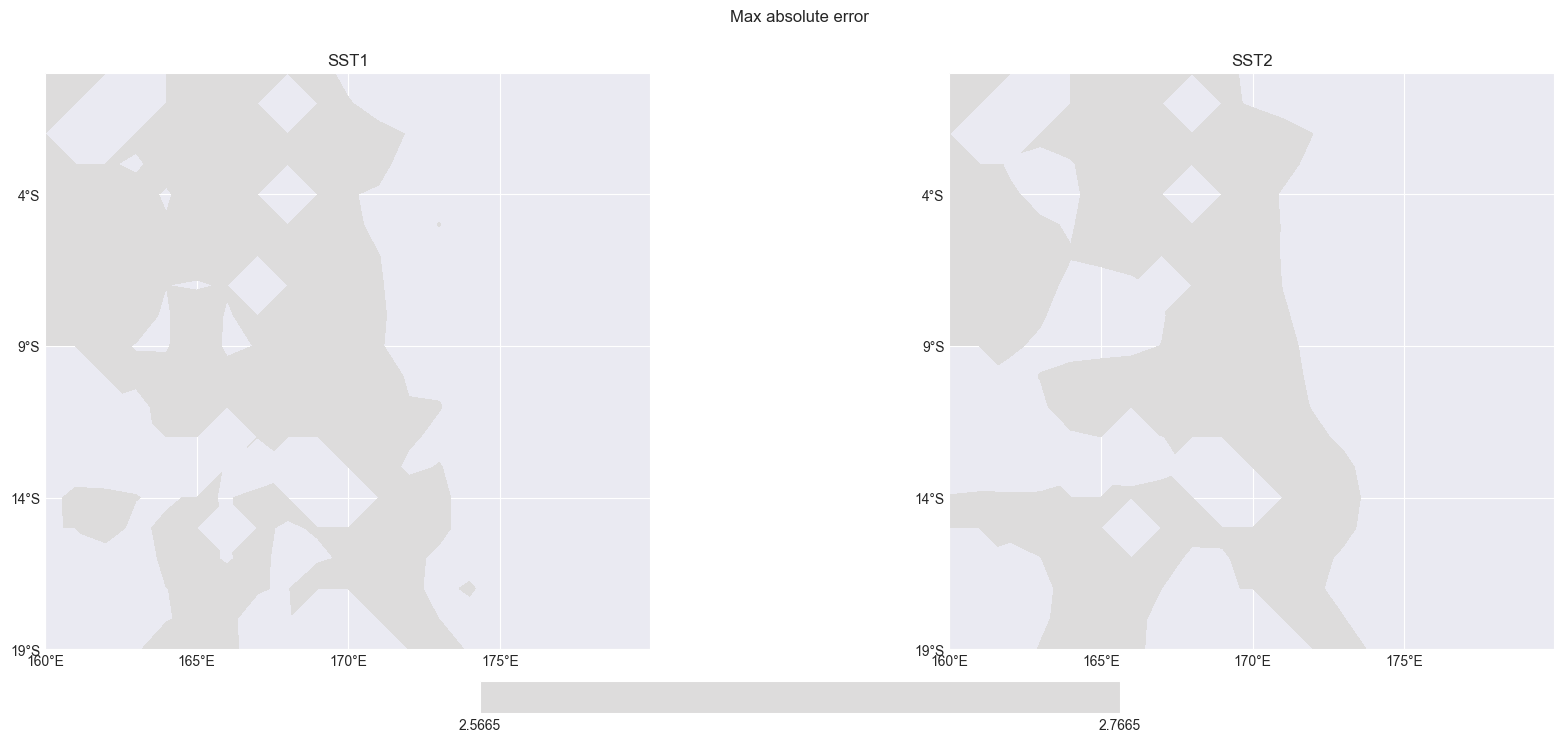

第 53 层的 RMSE:  0.029371184152246266


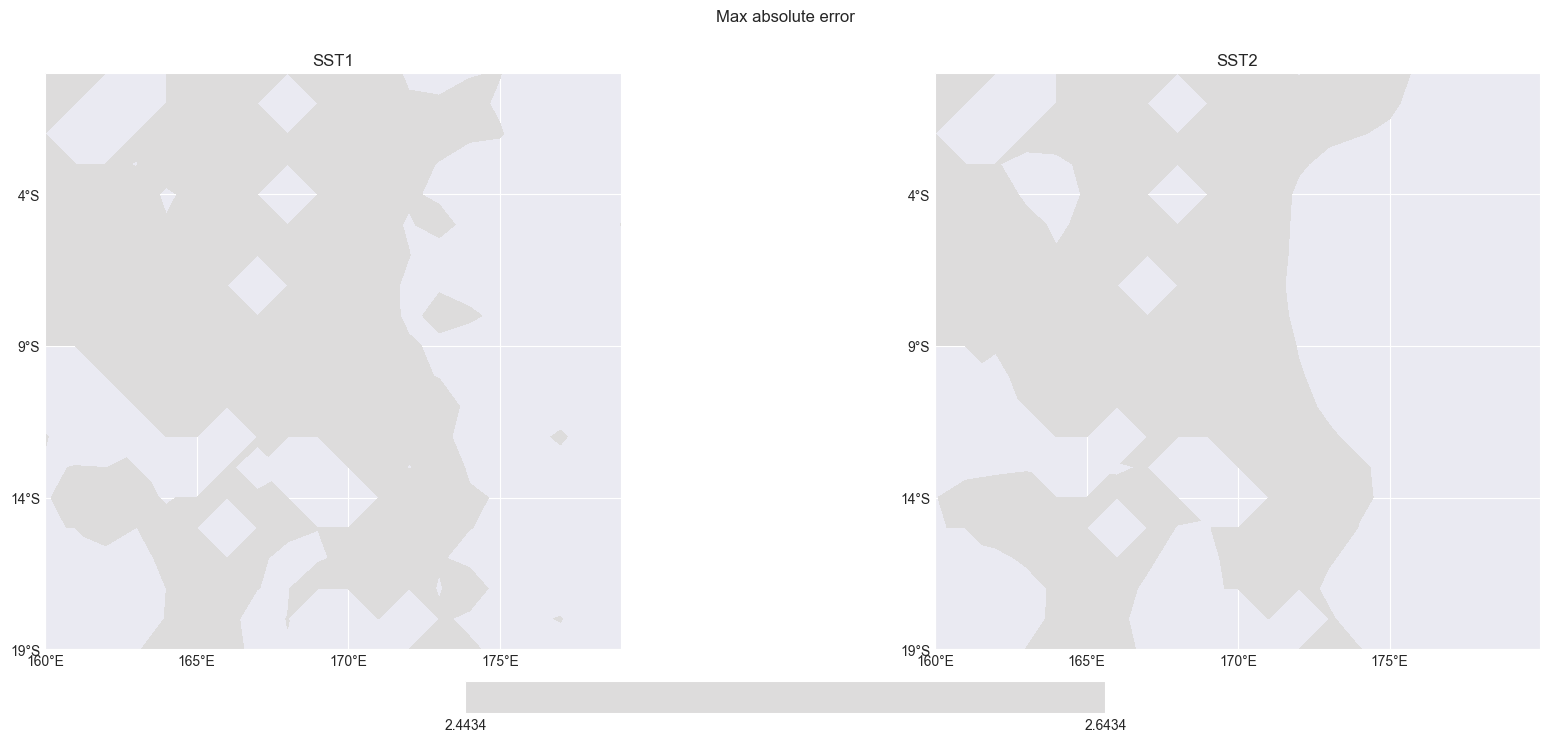

第 54 层的 RMSE:  0.028465305027112947


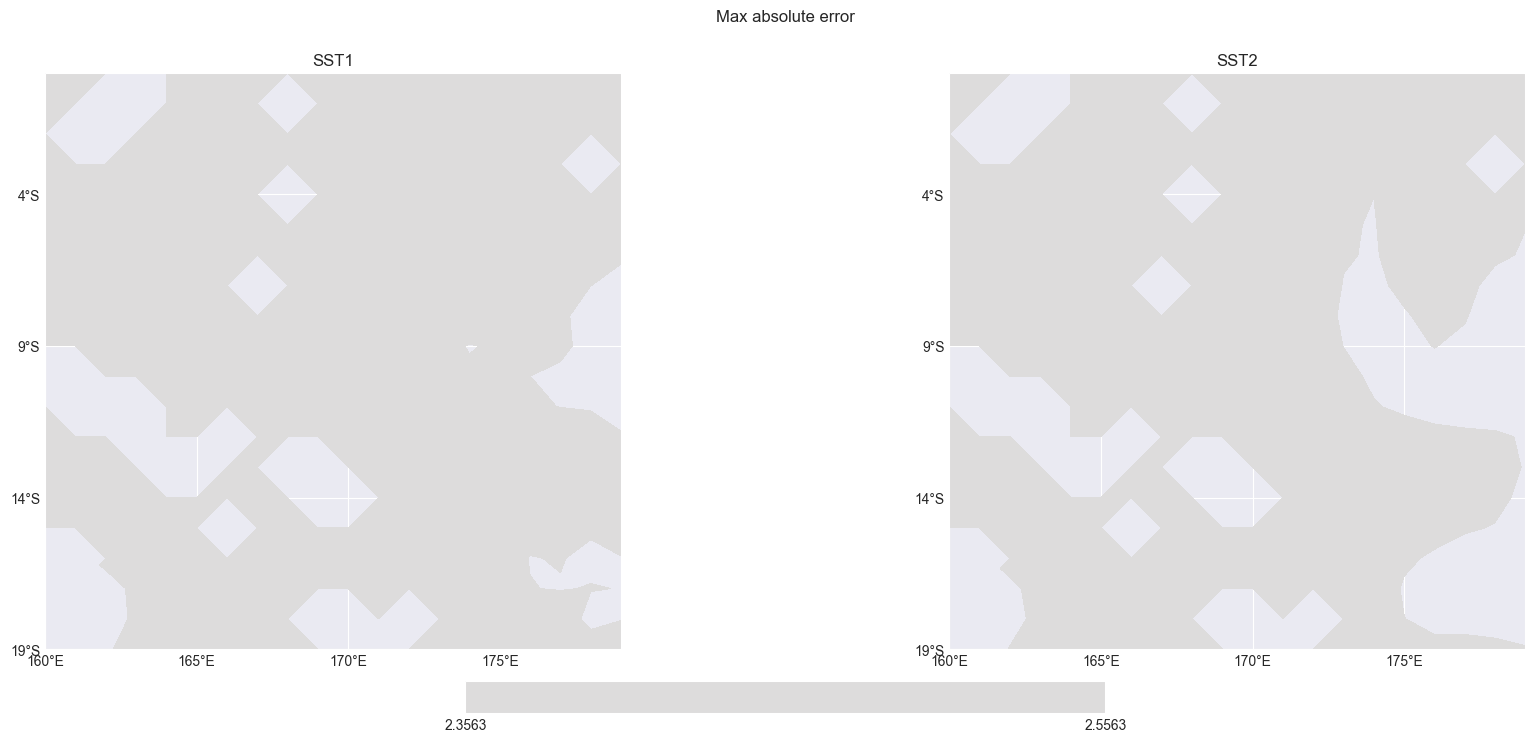

第 55 层的 RMSE:  0.025649198856284035


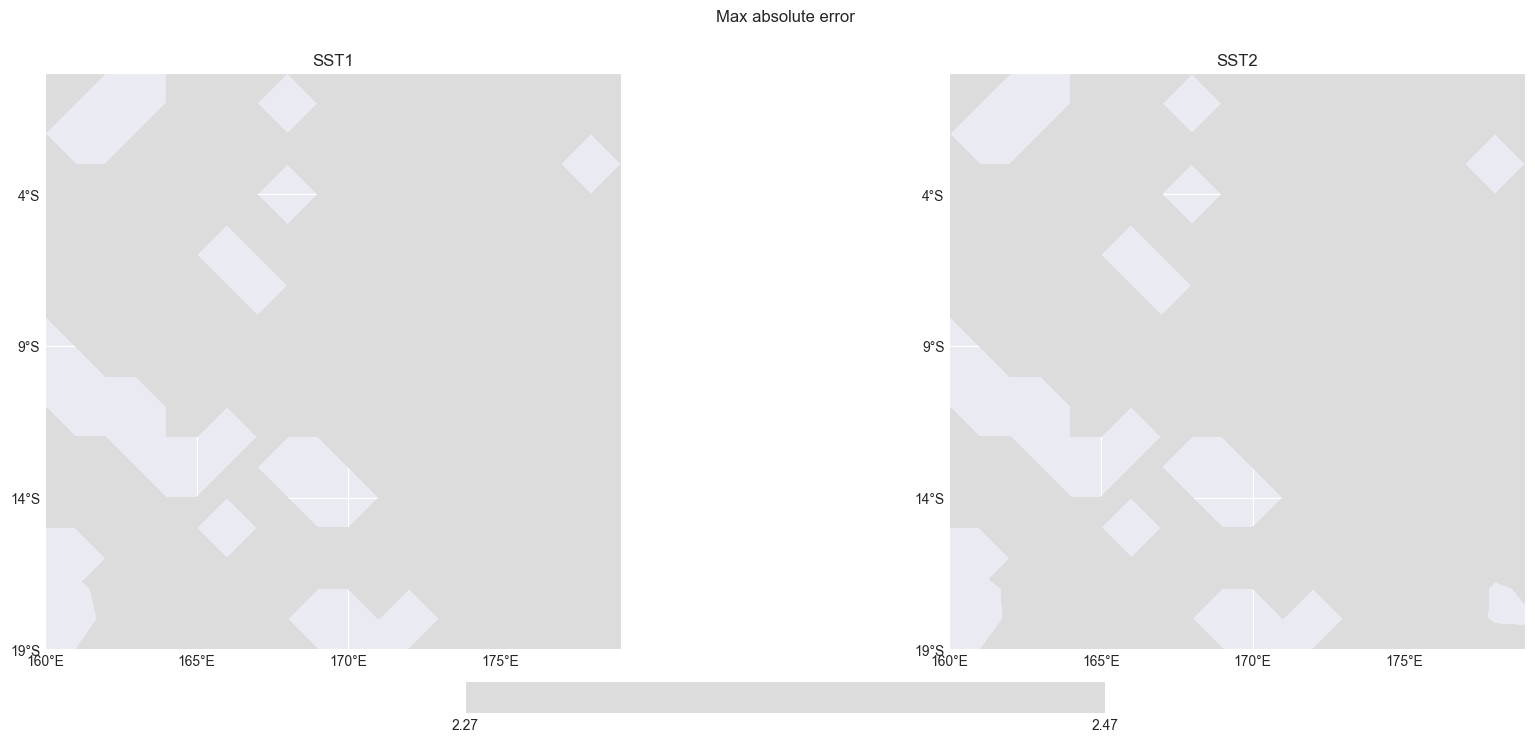

第 56 层的 RMSE:  0.026161543887863972


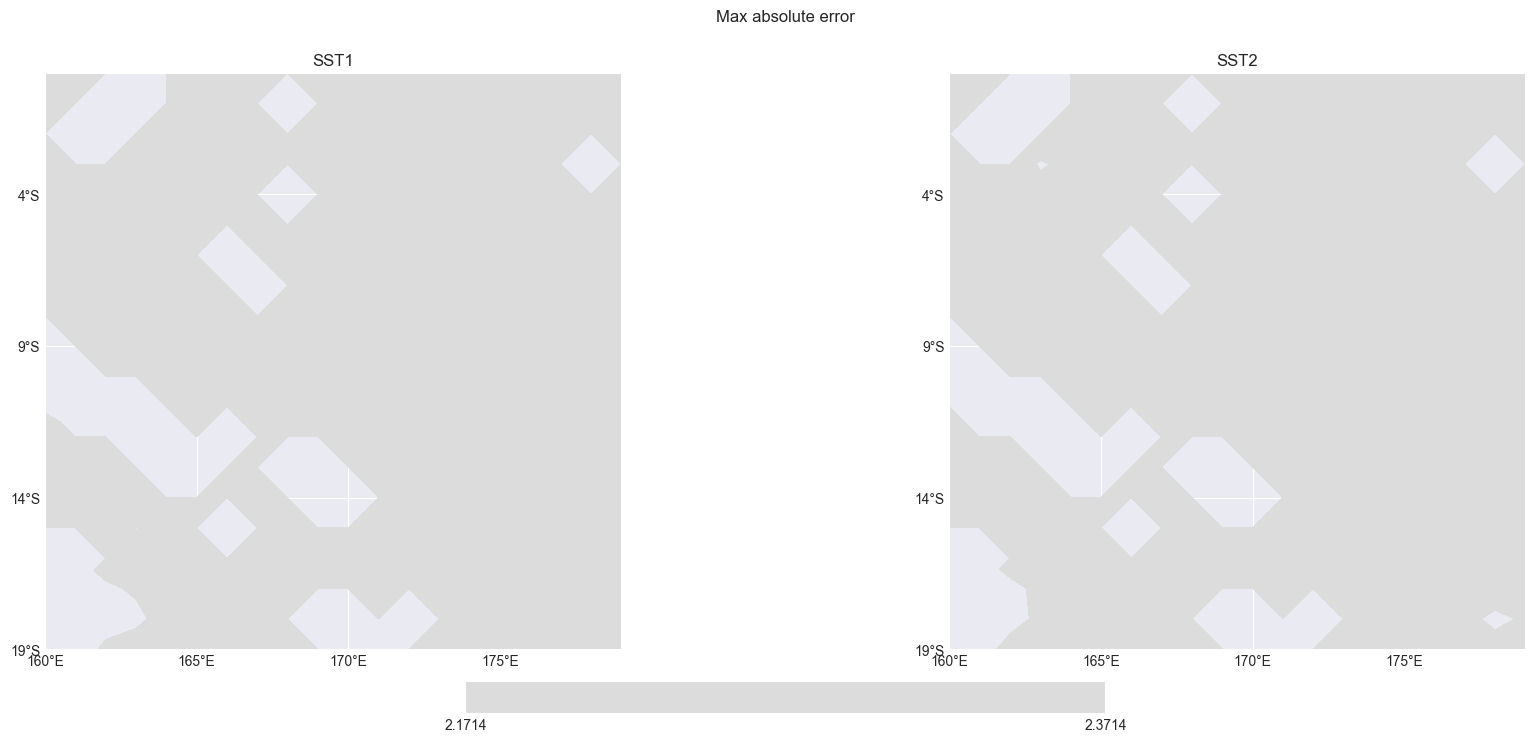

第 57 层的 RMSE:  0.025112056047582564
所有层的的平均rmse： 0.2624615114822157


In [9]:
# 计算每层的 RMSE
from src.utils.plot import plot_sst_distribution_compare

rmse_values = []
max_abs_error = []

for i in range(58):
    pres_surface = pres_profile[:, :, i]
    march_surface = march_profile[:, :, i]
    
    abs_error = np.abs(pres_surface - march_surface)

    plot_sst_distribution_compare(pres_surface, march_surface, title="Max absolute error", precision=1)
    max_abs_error = abs_error
    
    mse = np.nanmean((pres_surface - march_surface) ** 2)
    rmse = np.sqrt(mse)

    rmse_values.append(rmse)
    Log.w(f"第 {i} 层的 RMSE: ", rmse)

# 计算 RMSE 的平均值
average_rmse = np.nanmean(rmse_values)
Log.w(f"所有层的的平均rmse：", average_rmse)

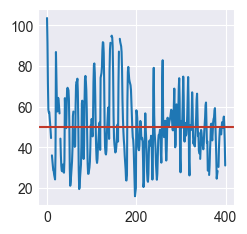

In [14]:
from matplotlib import cm # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.ticker import MultipleLocator # type: ignore

# 绘制混合层深度分布图
Log.i(mld.shape)

mld = mld.reshape(360, 160)[160:180, 60:80].flatten()
mean_mld = np.mean(mld)

plt.plot(mld)
plt.axhline(mean_mld, color='#c0392b')

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 20

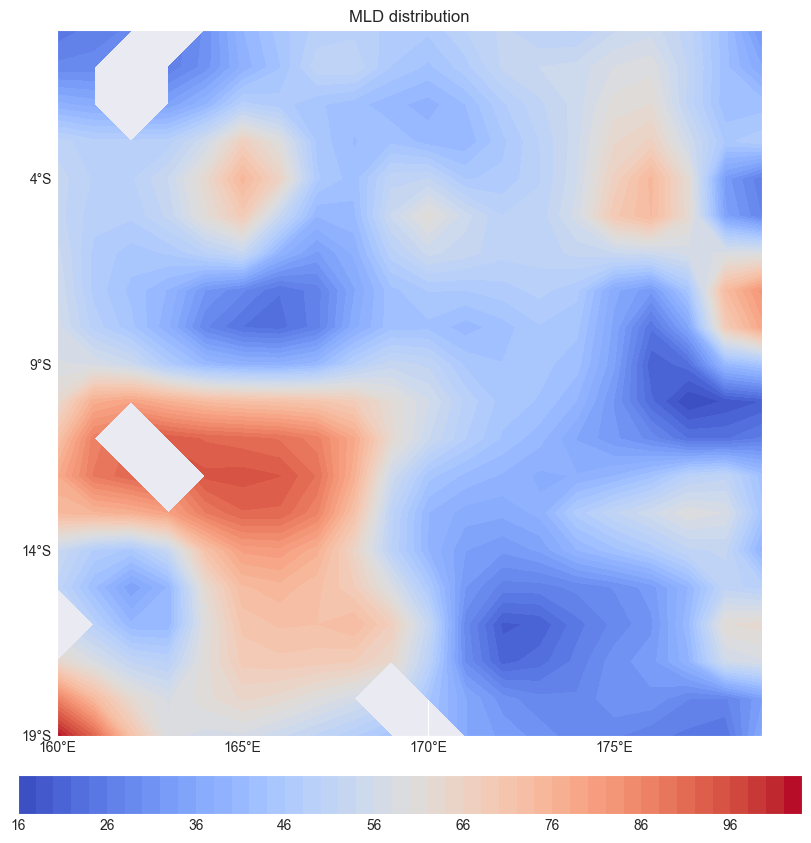

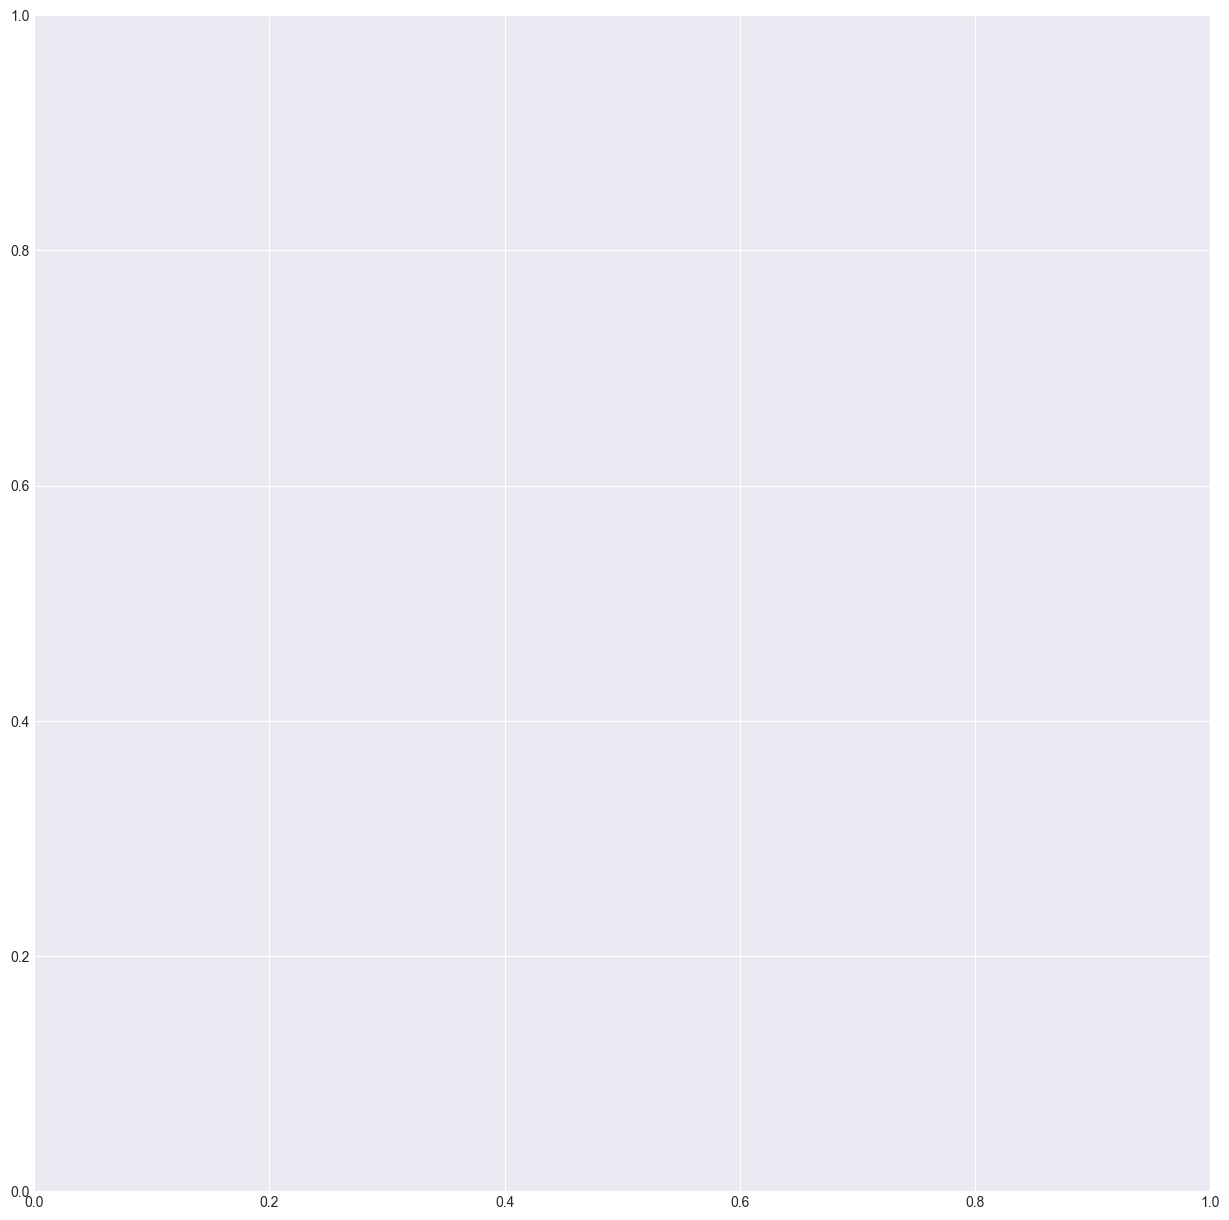

In [15]:
mld_dist = mld.reshape(20, 20)

import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

figure = plt.figure(figsize=(10, 8))
ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_title("MLD distribution")

ax.set_xticks(np.arange(160, 181, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-19, 1, 5), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

lon = np.arange(160, 180, 1)
lat = np.arange(-19, 1, 1)
X, Y = np.meshgrid(lon, lat)

contour = ax.contourf(lon, lat, mld_dist, cmap='coolwarm', levels=50, transform=ccrs.PlateCarree())

cbar = figure.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, fraction=0.05)


figure, ax = plt.subplots(figsize=(12, 12))

corr = np.corrcoef(max_abs_error, mld_dist)[20:, 20:]

sns.heatmap(corr, square=True, annot=False, ax=ax)

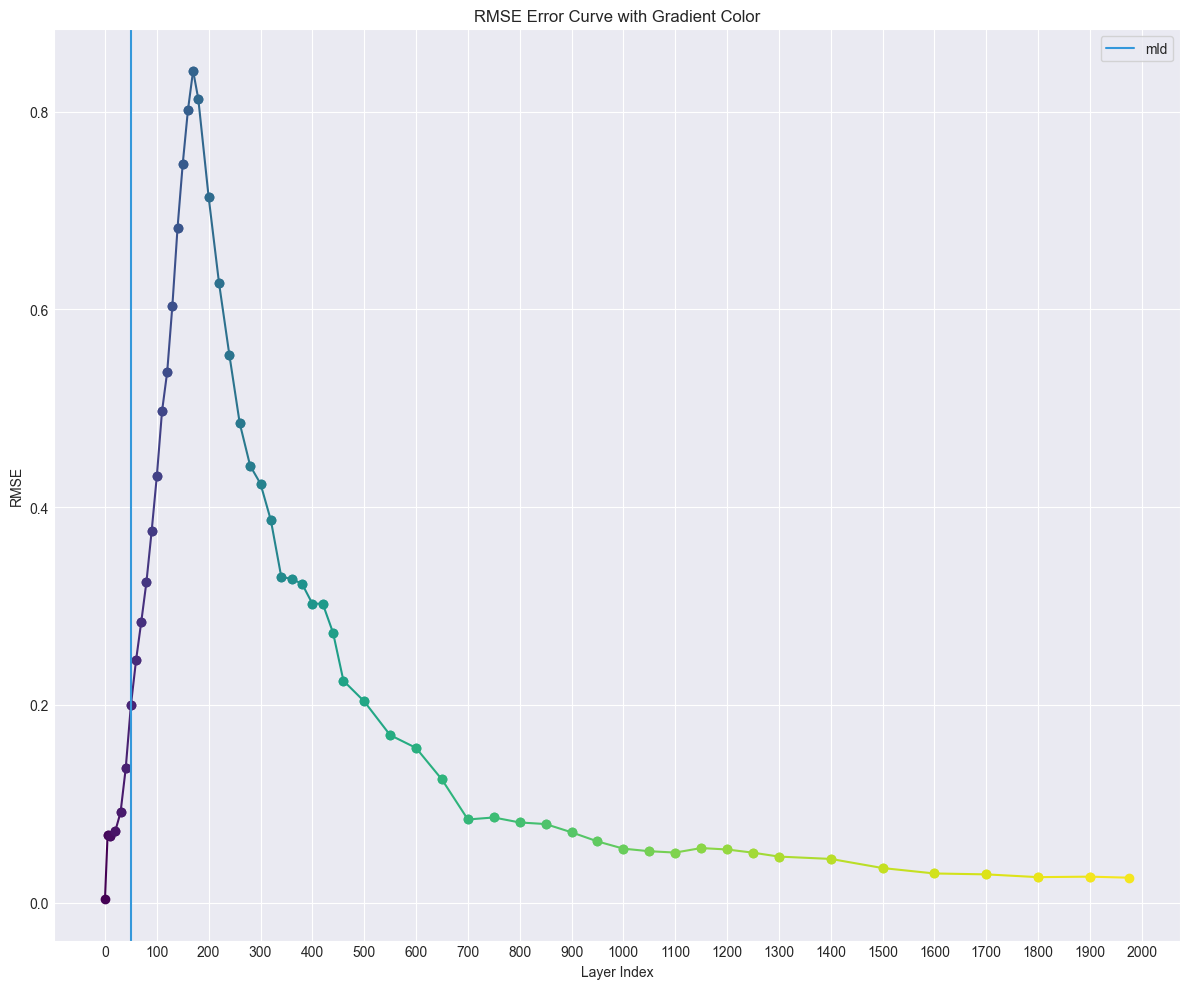

In [16]:
# 绘制 rmse 的分布图

deep_map = [
    0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    110, 120, 130, 140, 150, 160, 170, 180, 200,
    220, 240, 260, 280, 300, 320, 340, 360, 380, 400,
    420, 440, 460, 500, 550, 600, 650, 700, 750, 800,
    850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250,
    1300, 1400, 1500, 1600, 1700, 1800, 1900, 1975
]

x = deep_map
y = rmse_values

colors = cm.viridis(np.linspace(0, 1, len(rmse_values)))

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot the RMSE values with gradient color
for i in range(len(rmse_values) - 1):
    ax1.plot(x[i:i + 2], rmse_values[i:i + 2], marker='o', linestyle='-', color=colors[i])

ax1.set_xlabel('Layer Index')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Error Curve with Gradient Color')
ax1.grid(True)

# Set x-axis major ticks to have an interval of 5
ax1.xaxis.set_major_locator(MultipleLocator(100))

# Show the plot
plt.tight_layout()
plt.axvline(mean_mld, color='#3498db', label='mld')
plt.legend()